## 0. Install and Import Dependencies

In [1]:
!pip install mediapipe

In [2]:
!pip install opencv-python

In [2]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [6]:
# VIDEO FEED
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

## 1. Make Detections

In [30]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

results.pose_landmarks

In [26]:
mp_drawing.draw_landmarks??

<function mediapipe.python.solutions.drawing_utils.draw_landmarks(image: numpy.ndarray, landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList, connections: Optional[List[Tuple[int, int]]] = None, landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2), connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2))>

In [28]:
mp_drawing.DrawingSpec??

## 2. Determining Joints
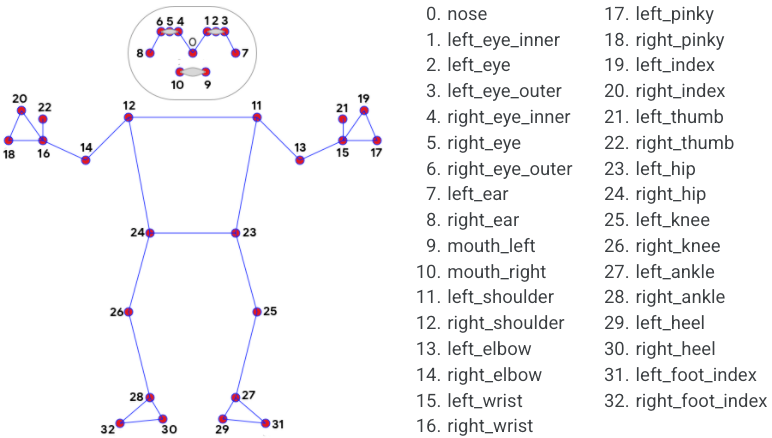

### Landmarks
#### There are 33 landmarks in total, starting from index0.
#### these represent the different joints within the pose.

In [31]:
cap = cv2.VideoCapture(0)
# Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.5565411
y: 0.68545437
z: -1.021082
visibility: 0.9958746
, x: 0.57993484
y: 0.60726607
z: -0.9357562
visibility: 0.99442047
, x: 0.5966561
y: 0.6075455
z: -0.9362699
visibility: 0.9956863
, x: 0.6122726
y: 0.6089299
z: -0.9362854
visibility: 0.9954732
, x: 0.5208558
y: 0.6092314
z: -0.9561974
visibility: 0.9929844
, x: 0.49532565
y: 0.6107894
z: -0.9554741
visibility: 0.99342704
, x: 0.47094893
y: 0.6134523
z: -0.9560281
visibility: 0.99187803
, x: 0.6272627
y: 0.64317185
z: -0.41487804
visibility: 0.9961493
, x: 0.4159685
y: 0.6508101
z: -0.49547467
visibility: 0.99267876
, x: 0.58467376
y: 0.7603762
z: -0.82633317
visibility: 0.9951049
, x: 0.5066024
y: 0.7677456
z: -0.85119236
visibility: 0.99337316
, x: 0.7138537
y: 0.9960523
z: -0.24172238
visibility: 0.99069023
, x: 0.28230715
y: 0.97003245
z: -0.32426873
visibility: 0.9568513
, x: 0.74674356
y: 1.3867967
z: -0.805189
visibility: 0.1263928
, x: 0.21804705
y: 1.3842969
z: -1.007047
visibility: 0.22063583
, x: 0.5899356
y: 1.

[x: 0.5595875
y: 0.71272194
z: -1.5366882
visibility: 0.99157757
, x: 0.5832924
y: 0.63562775
z: -1.4352355
visibility: 0.99030864
, x: 0.6003531
y: 0.635866
z: -1.4356978
visibility: 0.991764
, x: 0.61608166
y: 0.63693935
z: -1.4357092
visibility: 0.9911578
, x: 0.5287999
y: 0.62982994
z: -1.4454064
visibility: 0.98905814
, x: 0.5065372
y: 0.6264857
z: -1.4458344
visibility: 0.9894841
, x: 0.48310208
y: 0.6246897
z: -1.4463909
visibility: 0.98826325
, x: 0.6276321
y: 0.6599959
z: -0.8560707
visibility: 0.9905733
, x: 0.4212895
y: 0.65000594
z: -0.8965572
visibility: 0.99013364
, x: 0.5803846
y: 0.7862161
z: -1.3186134
visibility: 0.9746262
, x: 0.5109526
y: 0.7863773
z: -1.332777
visibility: 0.9770764
, x: 0.70869
y: 1.0017086
z: -0.71514827
visibility: 0.8826029
, x: 0.27517647
y: 0.980954
z: -0.5975601
visibility: 0.85210896
, x: 0.72475755
y: 1.3027918
z: -1.5225
visibility: 0.17934224
, x: 0.22661607
y: 1.2896339
z: -1.216565
visibility: 0.21506967
, x: 0.50273806
y: 1.0011756
z: 

[x: 0.5713541
y: 0.70291173
z: -1.517853
visibility: 0.9912355
, x: 0.595337
y: 0.62725073
z: -1.4204373
visibility: 0.99065965
, x: 0.6123092
y: 0.6275238
z: -1.4208163
visibility: 0.9917723
, x: 0.62720007
y: 0.6283558
z: -1.4209402
visibility: 0.9912388
, x: 0.538226
y: 0.6236456
z: -1.4261391
visibility: 0.9897389
, x: 0.51310694
y: 0.6213885
z: -1.425897
visibility: 0.98992103
, x: 0.4864911
y: 0.61989385
z: -1.4263269
visibility: 0.98900276
, x: 0.6342379
y: 0.6565505
z: -0.8279762
visibility: 0.99095833
, x: 0.42074546
y: 0.6484492
z: -0.88288176
visibility: 0.9906435
, x: 0.5916752
y: 0.7753913
z: -1.3126352
visibility: 0.9712866
, x: 0.52300274
y: 0.7701212
z: -1.3192158
visibility: 0.97275454
, x: 0.71112424
y: 1.0047364
z: -0.686114
visibility: 0.80412865
, x: 0.26659226
y: 0.986673
z: -0.60412174
visibility: 0.7473594
, x: 0.76509184
y: 1.2745765
z: -1.2638714
visibility: 0.21164095
, x: 0.19840735
y: 1.3099766
z: -1.2859256
visibility: 0.20443788
, x: 0.57865053
y: 1.08298

[x: 0.5661083
y: 0.7207816
z: -1.5407851
visibility: 0.99251395
, x: 0.5895502
y: 0.6410154
z: -1.4271895
visibility: 0.99217165
, x: 0.60703844
y: 0.6401796
z: -1.4275608
visibility: 0.9930433
, x: 0.6228944
y: 0.63983643
z: -1.4275267
visibility: 0.99250525
, x: 0.53180456
y: 0.6399314
z: -1.455242
visibility: 0.99157417
, x: 0.5066258
y: 0.6384839
z: -1.4557309
visibility: 0.9916627
, x: 0.48051852
y: 0.6375797
z: -1.4562137
visibility: 0.99087405
, x: 0.6318827
y: 0.66406506
z: -0.7945707
visibility: 0.9923091
, x: 0.41767496
y: 0.6634223
z: -0.9098646
visibility: 0.99226195
, x: 0.5879515
y: 0.79542893
z: -1.2978644
visibility: 0.9711358
, x: 0.51941884
y: 0.7962455
z: -1.3344225
visibility: 0.9716938
, x: 0.7106842
y: 1.0024369
z: -0.64125955
visibility: 0.73197883
, x: 0.2636235
y: 0.99096525
z: -0.6232395
visibility: 0.64605343
, x: 0.7614836
y: 1.2388637
z: -1.3058956
visibility: 0.2028489
, x: 0.19939081
y: 1.2995992
z: -1.2945311
visibility: 0.19188884
, x: 0.5813689
y: 1.10

[x: 0.569359
y: 0.72080636
z: -1.5353038
visibility: 0.9913543
, x: 0.59278226
y: 0.64275724
z: -1.4251363
visibility: 0.99123496
, x: 0.610192
y: 0.64272434
z: -1.4256604
visibility: 0.99225
, x: 0.6262311
y: 0.643389
z: -1.425806
visibility: 0.9915047
, x: 0.53686076
y: 0.6389807
z: -1.4579309
visibility: 0.9906513
, x: 0.5125404
y: 0.63654697
z: -1.4584162
visibility: 0.99087644
, x: 0.48663726
y: 0.63512194
z: -1.4589006
visibility: 0.98987085
, x: 0.6345868
y: 0.6700731
z: -0.7928404
visibility: 0.9916286
, x: 0.41883636
y: 0.6607713
z: -0.9331919
visibility: 0.99078333
, x: 0.5878422
y: 0.7957986
z: -1.2918997
visibility: 0.9676872
, x: 0.5200256
y: 0.7933871
z: -1.3360889
visibility: 0.9659331
, x: 0.70975626
y: 1.0058907
z: -0.5846089
visibility: 0.6885338
, x: 0.25633994
y: 0.99133986
z: -0.57453036
visibility: 0.55929124
, x: 0.8033985
y: 1.259072
z: -1.0843449
visibility: 0.17078401
, x: 0.2052314
y: 1.2948335
z: -1.0329151
visibility: 0.16033584
, x: 0.65668094
y: 1.2546791

[x: 0.5668681
y: 0.72473407
z: -1.7363198
visibility: 0.9913199
, x: 0.59444654
y: 0.6472175
z: -1.6275654
visibility: 0.99138075
, x: 0.61253726
y: 0.64832014
z: -1.6278998
visibility: 0.99248064
, x: 0.6289831
y: 0.65030843
z: -1.6280499
visibility: 0.99171865
, x: 0.53754383
y: 0.6410492
z: -1.6518902
visibility: 0.9906289
, x: 0.5139993
y: 0.6374415
z: -1.652263
visibility: 0.9909065
, x: 0.48897433
y: 0.63482
z: -1.6525835
visibility: 0.9896869
, x: 0.64069575
y: 0.6782673
z: -0.98503715
visibility: 0.99198663
, x: 0.42454094
y: 0.65926826
z: -1.0903294
visibility: 0.99051666
, x: 0.5860178
y: 0.8008764
z: -1.4876411
visibility: 0.9677842
, x: 0.5168786
y: 0.79373324
z: -1.520925
visibility: 0.9644186
, x: 0.71674645
y: 1.0153486
z: -0.8107394
visibility: 0.6688029
, x: 0.26180616
y: 0.98919094
z: -0.71744424
visibility: 0.51554334
, x: 0.7956797
y: 1.2909219
z: -1.5017135
visibility: 0.16650411
, x: 0.20975867
y: 1.2763304
z: -1.3167697
visibility: 0.13733897
, x: 0.6252483
y: 1.

[x: 0.60325706
y: 0.73040503
z: -1.6314118
visibility: 0.9916683
, x: 0.62084275
y: 0.6526215
z: -1.5329802
visibility: 0.99151564
, x: 0.63339484
y: 0.6531431
z: -1.5331941
visibility: 0.9926982
, x: 0.6448742
y: 0.6542818
z: -1.5332267
visibility: 0.9916135
, x: 0.56869775
y: 0.64560425
z: -1.5896012
visibility: 0.9910528
, x: 0.5438132
y: 0.6409462
z: -1.5901816
visibility: 0.9915276
, x: 0.51870346
y: 0.636846
z: -1.5906312
visibility: 0.9902973
, x: 0.6400858
y: 0.6781846
z: -0.903811
visibility: 0.9920873
, x: 0.45492563
y: 0.656511
z: -1.11593
visibility: 0.9914068
, x: 0.60875756
y: 0.8023869
z: -1.3815668
visibility: 0.966961
, x: 0.5423957
y: 0.79758304
z: -1.453716
visibility: 0.9636652
, x: 0.7136892
y: 1.014108
z: -0.6598058
visibility: 0.6425379
, x: 0.27048358
y: 0.990267
z: -0.77725315
visibility: 0.48481795
, x: 0.8070267
y: 1.2610546
z: -1.0407145
visibility: 0.15061815
, x: 0.2100019
y: 1.2496779
z: -1.353602
visibility: 0.17772742
, x: 0.6661663
y: 1.2340207
z: -1.5

[x: 0.6109993
y: 0.7292309
z: -1.6852541
visibility: 0.99337125
, x: 0.6345628
y: 0.65061796
z: -1.5685728
visibility: 0.9931011
, x: 0.6503645
y: 0.6514421
z: -1.5687149
visibility: 0.993973
, x: 0.6639791
y: 0.6529251
z: -1.5686219
visibility: 0.9927709
, x: 0.5769103
y: 0.64383316
z: -1.6089531
visibility: 0.9929248
, x: 0.55137885
y: 0.6392234
z: -1.6093681
visibility: 0.9933956
, x: 0.5243784
y: 0.6345751
z: -1.6096016
visibility: 0.9924521
, x: 0.6634476
y: 0.6765205
z: -0.8917602
visibility: 0.99332565
, x: 0.45654893
y: 0.65251887
z: -1.0726784
visibility: 0.9935577
, x: 0.62184274
y: 0.8009733
z: -1.4230821
visibility: 0.9715342
, x: 0.5508249
y: 0.7980341
z: -1.4779576
visibility: 0.9700643
, x: 0.7173763
y: 1.0132035
z: -0.69712627
visibility: 0.6269315
, x: 0.2787928
y: 0.986398
z: -0.7185281
visibility: 0.5061989
, x: 0.8017305
y: 1.2419931
z: -1.3097116
visibility: 0.13850228
, x: 0.21364483
y: 1.2564883
z: -1.3165666
visibility: 0.23366265
, x: 0.64984506
y: 1.1599538
z:

[x: 0.614771
y: 0.73071015
z: -1.6206081
visibility: 0.99389
, x: 0.6355252
y: 0.6513551
z: -1.5207194
visibility: 0.99331594
, x: 0.65013015
y: 0.6521448
z: -1.5207074
visibility: 0.99420154
, x: 0.66284966
y: 0.653567
z: -1.5205119
visibility: 0.9927075
, x: 0.58159673
y: 0.6448852
z: -1.588229
visibility: 0.9934185
, x: 0.55638844
y: 0.6405678
z: -1.5887163
visibility: 0.9940528
, x: 0.52971506
y: 0.63599235
z: -1.5891074
visibility: 0.9930971
, x: 0.65327716
y: 0.6764659
z: -0.8828045
visibility: 0.99363846
, x: 0.46160287
y: 0.6519977
z: -1.1651928
visibility: 0.99436015
, x: 0.62264
y: 0.80221486
z: -1.3668478
visibility: 0.9729415
, x: 0.5534364
y: 0.79993206
z: -1.4570929
visibility: 0.9723501
, x: 0.712253
y: 1.0116038
z: -0.6095042
visibility: 0.63955134
, x: 0.27151078
y: 0.9872663
z: -0.8668224
visibility: 0.5171455
, x: 0.8023502
y: 1.2246854
z: -0.88960665
visibility: 0.1329473
, x: 0.21359825
y: 1.2331932
z: -1.4199326
visibility: 0.27088693
, x: 0.6535295
y: 1.1398622
z

[x: 0.6165856
y: 0.74243987
z: -1.6749287
visibility: 0.994155
, x: 0.6329981
y: 0.66301566
z: -1.5702304
visibility: 0.99302226
, x: 0.6463934
y: 0.6621886
z: -1.5702481
visibility: 0.9940628
, x: 0.65792096
y: 0.66176254
z: -1.5701181
visibility: 0.9922548
, x: 0.58146787
y: 0.65951914
z: -1.6253382
visibility: 0.9935579
, x: 0.5568186
y: 0.6559604
z: -1.6258177
visibility: 0.9943799
, x: 0.5315627
y: 0.6517236
z: -1.6261438
visibility: 0.99336493
, x: 0.6419314
y: 0.67916834
z: -0.93206394
visibility: 0.99343306
, x: 0.46504813
y: 0.66094124
z: -1.1944582
visibility: 0.9948316
, x: 0.6217459
y: 0.81072104
z: -1.4194486
visibility: 0.9702821
, x: 0.55585176
y: 0.8121014
z: -1.4936045
visibility: 0.97106665
, x: 0.7021544
y: 1.0079347
z: -0.68452513
visibility: 0.6402336
, x: 0.27902156
y: 0.98864526
z: -0.88219166
visibility: 0.51694286
, x: 0.7808051
y: 1.1966611
z: -1.0581912
visibility: 0.13213532
, x: 0.21999934
y: 1.2054459
z: -1.4084786
visibility: 0.31280717
, x: 0.63159865
y:

[x: 0.6043896
y: 0.7399568
z: -1.7361313
visibility: 0.99502516
, x: 0.62440145
y: 0.662708
z: -1.6282238
visibility: 0.9940918
, x: 0.6395912
y: 0.6621157
z: -1.6282189
visibility: 0.99494034
, x: 0.65333045
y: 0.6620503
z: -1.6280327
visibility: 0.9933767
, x: 0.56942856
y: 0.6582933
z: -1.6702207
visibility: 0.99448705
, x: 0.54513
y: 0.65477145
z: -1.6706765
visibility: 0.9951565
, x: 0.5196122
y: 0.6506223
z: -1.6709604
visibility: 0.99429905
, x: 0.6443401
y: 0.68142253
z: -0.96634704
visibility: 0.9942519
, x: 0.45568782
y: 0.6621161
z: -1.1407162
visibility: 0.99553317
, x: 0.6167131
y: 0.8099693
z: -1.4755257
visibility: 0.9729429
, x: 0.5482806
y: 0.8097529
z: -1.5313861
visibility: 0.9733603
, x: 0.7105762
y: 1.0113196
z: -0.72510237
visibility: 0.6074273
, x: 0.27725184
y: 0.9897096
z: -0.8340643
visibility: 0.5036814
, x: 0.7896215
y: 1.2237561
z: -1.1963456
visibility: 0.1310637
, x: 0.2154243
y: 1.2384702
z: -1.4149895
visibility: 0.30870596
, x: 0.6321791
y: 1.1017114
z

[x: 0.59304345
y: 0.74235857
z: -1.7589979
visibility: 0.9949721
, x: 0.6177374
y: 0.66462004
z: -1.6658922
visibility: 0.99426395
, x: 0.633968
y: 0.6638147
z: -1.6661686
visibility: 0.99504566
, x: 0.64880955
y: 0.6634792
z: -1.666241
visibility: 0.9935871
, x: 0.5602492
y: 0.6588361
z: -1.703809
visibility: 0.9945232
, x: 0.53497845
y: 0.6536008
z: -1.7043526
visibility: 0.99509764
, x: 0.50868577
y: 0.6483404
z: -1.7046429
visibility: 0.99427176
, x: 0.6450623
y: 0.6824387
z: -1.0192945
visibility: 0.9943211
, x: 0.4453388
y: 0.6614803
z: -1.1870142
visibility: 0.99533737
, x: 0.6081368
y: 0.81344616
z: -1.5010699
visibility: 0.9734284
, x: 0.539045
y: 0.80832255
z: -1.5524691
visibility: 0.9734246
, x: 0.7150793
y: 1.0166143
z: -0.72202194
visibility: 0.59408104
, x: 0.26713926
y: 0.9935981
z: -0.76905715
visibility: 0.4891958
, x: 0.8072473
y: 1.2757455
z: -1.1121033
visibility: 0.121124916
, x: 0.20934255
y: 1.2891898
z: -1.1827466
visibility: 0.2755179
, x: 0.67745936
y: 1.3285

[x: 0.58751345
y: 0.74044234
z: -1.5361527
visibility: 0.9949377
, x: 0.6128802
y: 0.6624103
z: -1.4316455
visibility: 0.99423164
, x: 0.6290217
y: 0.66179115
z: -1.4317573
visibility: 0.9949742
, x: 0.6439789
y: 0.66175234
z: -1.4314696
visibility: 0.9936441
, x: 0.55612147
y: 0.6574872
z: -1.4750007
visibility: 0.9944415
, x: 0.5307289
y: 0.65278596
z: -1.4755149
visibility: 0.99490887
, x: 0.5043163
y: 0.64803255
z: -1.4761022
visibility: 0.9941292
, x: 0.6436276
y: 0.6815931
z: -0.79992247
visibility: 0.99398017
, x: 0.44050598
y: 0.6620767
z: -0.9869398
visibility: 0.99517417
, x: 0.6022779
y: 0.81061965
z: -1.2891228
visibility: 0.97166836
, x: 0.5338024
y: 0.80569535
z: -1.3459028
visibility: 0.97188383
, x: 0.7064486
y: 1.0135413
z: -0.5244192
visibility: 0.59600174
, x: 0.27118942
y: 0.9908103
z: -0.72223914
visibility: 0.50717795
, x: 0.7639066
y: 1.2328945
z: -0.8727665
visibility: 0.13956381
, x: 0.20793657
y: 1.273451
z: -1.3030493
visibility: 0.28170535
, x: 0.6006827
y: 

[x: 0.59096014
y: 0.737313
z: -1.7340502
visibility: 0.9953248
, x: 0.6165469
y: 0.6590017
z: -1.6256485
visibility: 0.99467736
, x: 0.6321102
y: 0.6588325
z: -1.62577
visibility: 0.9953627
, x: 0.64638317
y: 0.6592346
z: -1.6257149
visibility: 0.99419713
, x: 0.55990183
y: 0.65390813
z: -1.6610425
visibility: 0.9948475
, x: 0.5345118
y: 0.6495401
z: -1.6614519
visibility: 0.99525625
, x: 0.50789565
y: 0.6452286
z: -1.6617091
visibility: 0.9945649
, x: 0.64461964
y: 0.67978454
z: -0.9834593
visibility: 0.99439096
, x: 0.44407457
y: 0.6596566
z: -1.1359185
visibility: 0.99561125
, x: 0.6045447
y: 0.8073873
z: -1.48194
visibility: 0.9727979
, x: 0.53689957
y: 0.80292416
z: -1.5297644
visibility: 0.97307646
, x: 0.7093527
y: 1.0139754
z: -0.8057392
visibility: 0.5999358
, x: 0.27052867
y: 0.98855144
z: -0.7978729
visibility: 0.5140435
, x: 0.77513826
y: 1.2331046
z: -1.4253685
visibility: 0.15295117
, x: 0.21020627
y: 1.2691096
z: -1.429897
visibility: 0.2958402
, x: 0.608005
y: 1.0792383

[x: 0.59425515
y: 0.74313706
z: -1.7805151
visibility: 0.9952837
, x: 0.61860687
y: 0.66427207
z: -1.6790664
visibility: 0.9945057
, x: 0.6334875
y: 0.6643074
z: -1.6791809
visibility: 0.9952503
, x: 0.64706624
y: 0.6647966
z: -1.679167
visibility: 0.99398863
, x: 0.5623847
y: 0.65761834
z: -1.7196496
visibility: 0.9947474
, x: 0.53702235
y: 0.65253574
z: -1.7201653
visibility: 0.995244
, x: 0.5107884
y: 0.6474587
z: -1.7205276
visibility: 0.9945258
, x: 0.6441864
y: 0.68396693
z: -1.0366385
visibility: 0.99416804
, x: 0.44873992
y: 0.6595202
z: -1.2142893
visibility: 0.99569947
, x: 0.6060859
y: 0.81317985
z: -1.5258415
visibility: 0.97132784
, x: 0.53905416
y: 0.8079487
z: -1.5803111
visibility: 0.97213537
, x: 0.7052108
y: 1.0132221
z: -0.8102833
visibility: 0.5956424
, x: 0.2698112
y: 0.9860712
z: -0.8627017
visibility: 0.52638125
, x: 0.7745544
y: 1.2396783
z: -1.258176
visibility: 0.15750808
, x: 0.21101823
y: 1.2450967
z: -1.4237801
visibility: 0.315427
, x: 0.6066269
y: 1.11893

[x: 0.59318364
y: 0.7462777
z: -1.8525994
visibility: 0.99454165
, x: 0.6186202
y: 0.6667921
z: -1.7531509
visibility: 0.9938194
, x: 0.6331908
y: 0.6668854
z: -1.7532396
visibility: 0.9948001
, x: 0.6465936
y: 0.6673549
z: -1.753309
visibility: 0.99351996
, x: 0.5626203
y: 0.6593419
z: -1.7952158
visibility: 0.99386644
, x: 0.53738534
y: 0.6537546
z: -1.7956698
visibility: 0.99442416
, x: 0.5117332
y: 0.64818466
z: -1.7959356
visibility: 0.993442
, x: 0.64360154
y: 0.68558955
z: -1.1077305
visibility: 0.9936326
, x: 0.45143503
y: 0.6592359
z: -1.2991084
visibility: 0.9948325
, x: 0.60466564
y: 0.8167128
z: -1.5948987
visibility: 0.9676206
, x: 0.5366153
y: 0.8106653
z: -1.6513987
visibility: 0.9674249
, x: 0.7030033
y: 1.0132972
z: -0.86811256
visibility: 0.59181356
, x: 0.2710176
y: 0.9843071
z: -0.905399
visibility: 0.49473858
, x: 0.78066313
y: 1.2517072
z: -1.3317821
visibility: 0.16209848
, x: 0.21828909
y: 1.2251395
z: -1.3861458
visibility: 0.29745552
, x: 0.62806803
y: 1.15303

[x: 0.5962049
y: 0.7321781
z: -1.5986269
visibility: 0.9946801
, x: 0.62099636
y: 0.6551153
z: -1.4932462
visibility: 0.99383974
, x: 0.6349648
y: 0.65585846
z: -1.4933379
visibility: 0.99474055
, x: 0.64764035
y: 0.6572068
z: -1.4931706
visibility: 0.9933891
, x: 0.5668231
y: 0.6479244
z: -1.5423489
visibility: 0.9940287
, x: 0.5416536
y: 0.6426083
z: -1.5428505
visibility: 0.994609
, x: 0.5154893
y: 0.6376696
z: -1.5433115
visibility: 0.99372935
, x: 0.6423348
y: 0.67917925
z: -0.8624188
visibility: 0.993257
, x: 0.45277157
y: 0.6533235
z: -1.0805452
visibility: 0.9949268
, x: 0.60551214
y: 0.80268824
z: -1.3525627
visibility: 0.96688235
, x: 0.5404985
y: 0.7976027
z: -1.4184368
visibility: 0.96794236
, x: 0.7004574
y: 1.0097213
z: -0.63788486
visibility: 0.5754338
, x: 0.27175677
y: 0.9838775
z: -0.7938596
visibility: 0.49690998
, x: 0.7563864
y: 1.2303011
z: -1.0737796
visibility: 0.15515812
, x: 0.21886691
y: 1.2471251
z: -1.4164255
visibility: 0.31329364
, x: 0.59907126
y: 1.0910

[x: 0.5975817
y: 0.72489035
z: -1.5877335
visibility: 0.99410105
, x: 0.6215063
y: 0.64896214
z: -1.4830687
visibility: 0.9932568
, x: 0.6357862
y: 0.64998883
z: -1.4833066
visibility: 0.9940923
, x: 0.64897245
y: 0.65170974
z: -1.48328
visibility: 0.9926452
, x: 0.5670097
y: 0.6427406
z: -1.5221083
visibility: 0.9935567
, x: 0.5419503
y: 0.63842905
z: -1.5225911
visibility: 0.9941861
, x: 0.51568353
y: 0.63468605
z: -1.523032
visibility: 0.99344355
, x: 0.64618206
y: 0.67555493
z: -0.85940504
visibility: 0.99240655
, x: 0.45073968
y: 0.6529465
z: -1.0316623
visibility: 0.99424267
, x: 0.6085113
y: 0.7965445
z: -1.3459294
visibility: 0.9660053
, x: 0.5440034
y: 0.79192847
z: -1.3983637
visibility: 0.96778595
, x: 0.7081057
y: 1.010381
z: -0.66329175
visibility: 0.58224785
, x: 0.27425003
y: 0.98524463
z: -0.7191554
visibility: 0.51825154
, x: 0.77479726
y: 1.2586834
z: -1.1719781
visibility: 0.14649719
, x: 0.21998
y: 1.2605368
z: -1.3534896
visibility: 0.32661936
, x: 0.62378544
y: 1.

[x: 0.5989044
y: 0.7295955
z: -1.5803554
visibility: 0.9940126
, x: 0.6208674
y: 0.65204746
z: -1.4796532
visibility: 0.99305105
, x: 0.6350618
y: 0.652256
z: -1.4798967
visibility: 0.9939239
, x: 0.6481071
y: 0.6531942
z: -1.4798656
visibility: 0.99247223
, x: 0.56707513
y: 0.6470161
z: -1.5258512
visibility: 0.99334574
, x: 0.54220796
y: 0.64260674
z: -1.5264144
visibility: 0.9939721
, x: 0.51574665
y: 0.63877887
z: -1.5269538
visibility: 0.9931976
, x: 0.64357364
y: 0.67562133
z: -0.86655915
visibility: 0.99210334
, x: 0.4494613
y: 0.6574396
z: -1.0558815
visibility: 0.9939061
, x: 0.60939735
y: 0.8005686
z: -1.3424594
visibility: 0.9662422
, x: 0.5470975
y: 0.7967968
z: -1.3985537
visibility: 0.96777785
, x: 0.70502025
y: 1.007304
z: -0.69806105
visibility: 0.5932409
, x: 0.27695802
y: 0.98416907
z: -0.75387776
visibility: 0.51762223
, x: 0.76163113
y: 1.2506754
z: -1.2815064
visibility: 0.15114525
, x: 0.22232504
y: 1.2640816
z: -1.3836775
visibility: 0.3226418
, x: 0.5997212
y: 1

[x: 0.57400167
y: 0.7319121
z: -1.565211
visibility: 0.9932124
, x: 0.60130346
y: 0.65536106
z: -1.4575927
visibility: 0.9925306
, x: 0.6196933
y: 0.6569777
z: -1.458032
visibility: 0.99359673
, x: 0.6365421
y: 0.65866303
z: -1.4581214
visibility: 0.9923353
, x: 0.5450057
y: 0.6466502
z: -1.4806328
visibility: 0.99248606
, x: 0.5222794
y: 0.64277065
z: -1.4810493
visibility: 0.9930515
, x: 0.4983503
y: 0.6399561
z: -1.4814522
visibility: 0.9919848
, x: 0.64342594
y: 0.6806546
z: -0.83927596
visibility: 0.99215466
, x: 0.43763995
y: 0.6606669
z: -0.9457698
visibility: 0.99247855
, x: 0.5934621
y: 0.80829906
z: -1.3303857
visibility: 0.9657819
, x: 0.5265717
y: 0.8005467
z: -1.3613672
visibility: 0.9648829
, x: 0.71032536
y: 1.0106997
z: -0.64754826
visibility: 0.61295646
, x: 0.2729949
y: 0.9814657
z: -0.58814824
visibility: 0.49928406
, x: 0.79072297
y: 1.2744802
z: -1.2047793
visibility: 0.14751957
, x: 0.22314624
y: 1.2675208
z: -1.0719111
visibility: 0.24875091
, x: 0.644687
y: 1.23

[x: 0.5659916
y: 0.7124817
z: -1.435739
visibility: 0.9920416
, x: 0.59298456
y: 0.6393215
z: -1.3262808
visibility: 0.99165565
, x: 0.61143714
y: 0.6412518
z: -1.3267655
visibility: 0.9927332
, x: 0.62863284
y: 0.6436937
z: -1.3268061
visibility: 0.99180466
, x: 0.5365827
y: 0.6316768
z: -1.3461821
visibility: 0.9914436
, x: 0.51384914
y: 0.62844616
z: -1.3465528
visibility: 0.9919467
, x: 0.48959297
y: 0.626336
z: -1.3471048
visibility: 0.990918
, x: 0.6416089
y: 0.6733162
z: -0.72981364
visibility: 0.99157727
, x: 0.42908162
y: 0.653961
z: -0.8151162
visibility: 0.9912454
, x: 0.5876005
y: 0.78995395
z: -1.2117052
visibility: 0.96542054
, x: 0.5184475
y: 0.7809572
z: -1.2390962
visibility: 0.9638599
, x: 0.7145902
y: 1.0102751
z: -0.59870595
visibility: 0.6343096
, x: 0.274898
y: 0.9816738
z: -0.53213245
visibility: 0.52151155
, x: 0.78719395
y: 1.2797458
z: -1.3234813
visibility: 0.15605436
, x: 0.21919055
y: 1.2959867
z: -1.2266483
visibility: 0.19900075
, x: 0.62096775
y: 1.16319

[x: 0.55947196
y: 0.7237927
z: -1.2811143
visibility: 0.9916187
, x: 0.58486205
y: 0.64662004
z: -1.191099
visibility: 0.99173737
, x: 0.60162294
y: 0.6471787
z: -1.191779
visibility: 0.9926078
, x: 0.6182962
y: 0.6483282
z: -1.1918951
visibility: 0.99196
, x: 0.5288269
y: 0.64031017
z: -1.212469
visibility: 0.9912619
, x: 0.50502604
y: 0.6367403
z: -1.2128327
visibility: 0.9914463
, x: 0.480208
y: 0.6342085
z: -1.2133305
visibility: 0.9905142
, x: 0.6331848
y: 0.6741846
z: -0.6310097
visibility: 0.9919307
, x: 0.42427993
y: 0.656053
z: -0.7284666
visibility: 0.99000174
, x: 0.5805791
y: 0.797449
z: -1.0676374
visibility: 0.9673627
, x: 0.5124067
y: 0.78897893
z: -1.0973004
visibility: 0.9638279
, x: 0.70855135
y: 0.9937017
z: -0.40450525
visibility: 0.66224647
, x: 0.2894213
y: 0.9824129
z: -0.34954765
visibility: 0.5129374
, x: 0.7757605
y: 1.2609651
z: -0.67647505
visibility: 0.14151564
, x: 0.23824438
y: 1.274248
z: -0.62225896
visibility: 0.14701992
, x: 0.68371445
y: 1.4055642
z:

[x: 0.5442157
y: 0.7391784
z: -1.1357467
visibility: 0.98975784
, x: 0.5699755
y: 0.670686
z: -1.0413592
visibility: 0.99077374
, x: 0.58562744
y: 0.67203337
z: -1.0419453
visibility: 0.9915582
, x: 0.60191983
y: 0.6740913
z: -1.0420161
visibility: 0.99144167
, x: 0.5164846
y: 0.6637485
z: -1.0389601
visibility: 0.9897344
, x: 0.49449816
y: 0.6609249
z: -1.0391483
visibility: 0.9893771
, x: 0.4737721
y: 0.6592776
z: -1.0397552
visibility: 0.9884467
, x: 0.6229636
y: 0.7006814
z: -0.53662485
visibility: 0.9918405
, x: 0.42409047
y: 0.68177015
z: -0.5252002
visibility: 0.98729354
, x: 0.5698811
y: 0.81316006
z: -0.948634
visibility: 0.9670553
, x: 0.5037925
y: 0.8051602
z: -0.9478184
visibility: 0.9626476
, x: 0.7047906
y: 1.0042814
z: -0.4525332
visibility: 0.7064697
, x: 0.30406567
y: 0.9875238
z: -0.26243955
visibility: 0.5399159
, x: 0.7444158
y: 1.2839559
z: -1.1184844
visibility: 0.15915075
, x: 0.24450426
y: 1.273961
z: -0.74674165
visibility: 0.10894602
, x: 0.5733608
y: 1.084103

[x: 0.5418994
y: 0.7651137
z: -0.93140715
visibility: 0.98682207
, x: 0.56788313
y: 0.70725316
z: -0.8439404
visibility: 0.98898226
, x: 0.58278346
y: 0.709474
z: -0.84449416
visibility: 0.9895205
, x: 0.59754
y: 0.7123361
z: -0.84457195
visibility: 0.9903226
, x: 0.517762
y: 0.6977264
z: -0.8539712
visibility: 0.9871987
, x: 0.49930468
y: 0.6943254
z: -0.8540616
visibility: 0.98605365
, x: 0.4803958
y: 0.6914789
z: -0.85459626
visibility: 0.9855801
, x: 0.61273426
y: 0.73538905
z: -0.3606413
visibility: 0.9899938
, x: 0.4356576
y: 0.71270025
z: -0.40788835
visibility: 0.9831472
, x: 0.5665407
y: 0.8353968
z: -0.7519356
visibility: 0.9655524
, x: 0.5057047
y: 0.8253884
z: -0.76761234
visibility: 0.9612043
, x: 0.68763816
y: 1.0124195
z: -0.25202665
visibility: 0.7463052
, x: 0.31726906
y: 0.99429226
z: -0.20739476
visibility: 0.59627014
, x: 0.7201041
y: 1.2913795
z: -0.81586754
visibility: 0.21029668
, x: 0.24052724
y: 1.2643507
z: -0.8245643
visibility: 0.13239653
, x: 0.57330143
y: 

[x: 0.5369393
y: 0.78800774
z: -0.8390871
visibility: 0.98534507
, x: 0.5619439
y: 0.72761935
z: -0.7547382
visibility: 0.98805636
, x: 0.57653755
y: 0.728824
z: -0.7552942
visibility: 0.9881074
, x: 0.5902927
y: 0.7308586
z: -0.7553209
visibility: 0.989503
, x: 0.51542294
y: 0.722906
z: -0.7629146
visibility: 0.9861145
, x: 0.4979651
y: 0.7217511
z: -0.7629651
visibility: 0.9845879
, x: 0.48077303
y: 0.72162634
z: -0.7635679
visibility: 0.98486865
, x: 0.60744876
y: 0.75219935
z: -0.29020855
visibility: 0.98832417
, x: 0.44604707
y: 0.7419928
z: -0.32451886
visibility: 0.9809629
, x: 0.56121075
y: 0.8507465
z: -0.6660969
visibility: 0.9660397
, x: 0.5040605
y: 0.8475595
z: -0.67817414
visibility: 0.9628504
, x: 0.690754
y: 1.0199271
z: -0.17307927
visibility: 0.7615829
, x: 0.34709755
y: 1.0071757
z: -0.1815892
visibility: 0.64352155
, x: 0.7411997
y: 1.2896798
z: -0.7378042
visibility: 0.22533269
, x: 0.26374468
y: 1.2672876
z: -0.8474945
visibility: 0.16465224
, x: 0.5738397
y: 1.07

[x: 0.55516493
y: 0.8067094
z: -0.97099483
visibility: 0.9815036
, x: 0.5768086
y: 0.7417222
z: -0.8934145
visibility: 0.9851668
, x: 0.58978647
y: 0.7422586
z: -0.8938959
visibility: 0.9849718
, x: 0.6028316
y: 0.7438173
z: -0.8939964
visibility: 0.9870907
, x: 0.5355466
y: 0.7384152
z: -0.8911446
visibility: 0.98297334
, x: 0.5195421
y: 0.73726386
z: -0.8913196
visibility: 0.9808878
, x: 0.5027431
y: 0.7375967
z: -0.89200294
visibility: 0.98183346
, x: 0.6191605
y: 0.76373833
z: -0.46177912
visibility: 0.98500663
, x: 0.46867234
y: 0.75941396
z: -0.43980986
visibility: 0.97769386
, x: 0.57820535
y: 0.8639816
z: -0.80490655
visibility: 0.958856
, x: 0.5265447
y: 0.86292714
z: -0.80356514
visibility: 0.9573016
, x: 0.718952
y: 1.0235242
z: -0.31390113
visibility: 0.73159766
, x: 0.3668874
y: 1.0130378
z: -0.25719288
visibility: 0.64641756
, x: 0.75522125
y: 1.2965645
z: -0.89025736
visibility: 0.22461776
, x: 0.28164196
y: 1.2397403
z: -0.7608337
visibility: 0.156477
, x: 0.58298504
y:

[x: 0.61351264
y: 0.7842117
z: -1.0651236
visibility: 0.9829128
, x: 0.6373193
y: 0.72476983
z: -0.9733281
visibility: 0.9852975
, x: 0.6504924
y: 0.72692573
z: -0.9740262
visibility: 0.9846875
, x: 0.6633043
y: 0.72932464
z: -0.9740713
visibility: 0.98623544
, x: 0.59401417
y: 0.7149138
z: -1.0041219
visibility: 0.9839691
, x: 0.57725924
y: 0.71082497
z: -1.0043334
visibility: 0.9826245
, x: 0.5585749
y: 0.7075443
z: -1.004978
visibility: 0.9837327
, x: 0.6678058
y: 0.74831194
z: -0.41023144
visibility: 0.9847685
, x: 0.50919664
y: 0.7266706
z: -0.6425713
visibility: 0.979488
, x: 0.624138
y: 0.84798753
z: -0.8545019
visibility: 0.9651191
, x: 0.57387215
y: 0.83707327
z: -0.90844715
visibility: 0.96425337
, x: 0.7230834
y: 1.0259173
z: -0.094360344
visibility: 0.7798139
, x: 0.36264953
y: 1.0025132
z: -0.44197422
visibility: 0.7154524
, x: 0.77056307
y: 1.341702
z: -0.11122958
visibility: 0.16385804
, x: 0.26636356
y: 1.279147
z: -0.8521389
visibility: 0.17390245
, x: 0.7121513
y: 1.4

[x: 0.6334165
y: 0.67873263
z: -1.2611243
visibility: 0.98475134
, x: 0.65715486
y: 0.6215283
z: -1.1651158
visibility: 0.98564243
, x: 0.670443
y: 0.6260563
z: -1.1655023
visibility: 0.98541
, x: 0.6827555
y: 0.6310512
z: -1.1659968
visibility: 0.98595303
, x: 0.6122434
y: 0.60811126
z: -1.2274688
visibility: 0.9853402
, x: 0.5941732
y: 0.60324633
z: -1.2270497
visibility: 0.9850756
, x: 0.574294
y: 0.5989444
z: -1.227803
visibility: 0.98571616
, x: 0.6837284
y: 0.66802275
z: -0.6142889
visibility: 0.985036
, x: 0.5240619
y: 0.61693925
z: -0.8912225
visibility: 0.98410684
, x: 0.6433329
y: 0.7503096
z: -1.0517927
visibility: 0.97339827
, x: 0.5910064
y: 0.73947155
z: -1.1328795
visibility: 0.9743262
, x: 0.74502766
y: 1.0206392
z: -0.25535515
visibility: 0.8235081
, x: 0.32811207
y: 0.9660699
z: -0.64284635
visibility: 0.79509395
, x: 0.8378456
y: 1.3906406
z: 0.050228894
visibility: 0.118132815
, x: 0.003480867
y: 1.2792187
z: -0.6904551
visibility: 0.19413143
, x: 0.83695805
y: 1.69

[x: 0.6204134
y: 0.543648
z: -1.4397401
visibility: 0.98966455
, x: 0.6429449
y: 0.4821835
z: -1.3531123
visibility: 0.98940516
, x: 0.65608466
y: 0.48656592
z: -1.3532956
visibility: 0.98951447
, x: 0.6688564
y: 0.49168035
z: -1.3536414
visibility: 0.98950696
, x: 0.59786856
y: 0.46978202
z: -1.3866414
visibility: 0.989403
, x: 0.5767659
y: 0.4656836
z: -1.3860061
visibility: 0.98942435
, x: 0.5533782
y: 0.46237913
z: -1.3865956
visibility: 0.98956823
, x: 0.67565644
y: 0.53429586
z: -0.7979685
visibility: 0.98892725
, x: 0.49744496
y: 0.4850808
z: -0.9540261
visibility: 0.98931545
, x: 0.6342839
y: 0.61967033
z: -1.2329607
visibility: 0.98284525
, x: 0.57574743
y: 0.6114737
z: -1.2788943
visibility: 0.9839714
, x: 0.7721565
y: 0.93229604
z: -0.5006255
visibility: 0.89203334
, x: 0.29232955
y: 0.8455931
z: -0.6927992
visibility: 0.87379473
, x: 0.8799052
y: 1.328267
z: -0.37566096
visibility: 0.10897448
, x: -0.041552056
y: 0.9817418
z: -1.0463978
visibility: 0.37080362
, x: 0.9301430

[x: 0.586424
y: 0.39718348
z: -1.4973823
visibility: 0.9936099
, x: 0.6129156
y: 0.33066455
z: -1.4110576
visibility: 0.99323183
, x: 0.6280991
y: 0.3333682
z: -1.411229
visibility: 0.9933047
, x: 0.64196557
y: 0.3366898
z: -1.4114697
visibility: 0.9932714
, x: 0.55991393
y: 0.32285058
z: -1.4262521
visibility: 0.99319124
, x: 0.5364839
y: 0.32025704
z: -1.425278
visibility: 0.9931947
, x: 0.5151929
y: 0.31819102
z: -1.4259621
visibility: 0.9931906
, x: 0.6553172
y: 0.3787424
z: -0.85073835
visibility: 0.9929499
, x: 0.474151
y: 0.34618762
z: -0.916097
visibility: 0.9932501
, x: 0.61186826
y: 0.474711
z: -1.2922647
visibility: 0.9896459
, x: 0.54182625
y: 0.47388223
z: -1.3096609
visibility: 0.9903246
, x: 0.7909068
y: 0.8119372
z: -0.5573447
visibility: 0.93519276
, x: 0.2832974
y: 0.7190625
z: -0.62717634
visibility: 0.9233874
, x: 0.9314536
y: 1.0799202
z: -0.44437823
visibility: 0.15417358
, x: -0.04722901
y: 0.8957334
z: -0.9028963
visibility: 0.49401447
, x: 1.0083013
y: 1.598458

[x: 0.5600823
y: 0.4289933
z: -1.3237194
visibility: 0.9960509
, x: 0.5898665
y: 0.36122656
z: -1.2362344
visibility: 0.9956617
, x: 0.6046506
y: 0.36401638
z: -1.2365834
visibility: 0.9957453
, x: 0.6194632
y: 0.3674087
z: -1.2368972
visibility: 0.9956844
, x: 0.5324616
y: 0.3572688
z: -1.2316139
visibility: 0.9955598
, x: 0.51226455
y: 0.35564744
z: -1.2305295
visibility: 0.99556935
, x: 0.4934276
y: 0.35800776
z: -1.2310593
visibility: 0.99547774
, x: 0.6435772
y: 0.41330436
z: -0.7180204
visibility: 0.99552584
, x: 0.46188384
y: 0.40320432
z: -0.6772686
visibility: 0.99561596
, x: 0.5942465
y: 0.5089658
z: -1.138949
visibility: 0.99374306
, x: 0.51725173
y: 0.5070817
z: -1.1294329
visibility: 0.99410784
, x: 0.8040477
y: 0.8512529
z: -0.4945322
visibility: 0.96079636
, x: 0.28915083
y: 0.76760906
z: -0.40513578
visibility: 0.9524905
, x: 0.9129216
y: 1.0889438
z: -0.512854
visibility: 0.17538506
, x: 0.002833244
y: 0.9220879
z: -0.5562089
visibility: 0.5380643
, x: 1.0104257
y: 1.6

[x: 0.5467673
y: 0.4751852
z: -1.0685918
visibility: 0.9976188
, x: 0.57816005
y: 0.39556608
z: -0.9987763
visibility: 0.9973489
, x: 0.5953818
y: 0.39558524
z: -0.99936885
visibility: 0.9974014
, x: 0.6097061
y: 0.3969995
z: -0.999967
visibility: 0.9973587
, x: 0.5177504
y: 0.3974424
z: -0.96647424
visibility: 0.9972732
, x: 0.49859637
y: 0.39860514
z: -0.9648453
visibility: 0.99727863
, x: 0.48046893
y: 0.40086353
z: -0.9660505
visibility: 0.997209
, x: 0.63529944
y: 0.43801388
z: -0.5863681
visibility: 0.9972699
, x: 0.4549334
y: 0.435392
z: -0.53767824
visibility: 0.99730307
, x: 0.5863679
y: 0.54242724
z: -0.9613404
visibility: 0.99626225
, x: 0.5074207
y: 0.54884696
z: -0.9351119
visibility: 0.99646664
, x: 0.80330324
y: 0.8737424
z: -0.3130424
visibility: 0.9761732
, x: 0.30194098
y: 0.8009172
z: -0.37464887
visibility: 0.9707123
, x: 0.9372916
y: 1.2914337
z: -0.22009793
visibility: 0.1934946
, x: 0.074700564
y: 1.0716623
z: -0.88714087
visibility: 0.52840984
, x: 1.0082955
y: 

[x: 0.5409745
y: 0.46992406
z: -1.2335922
visibility: 0.9985574
, x: 0.5756992
y: 0.3936199
z: -1.1483047
visibility: 0.9983389
, x: 0.5940119
y: 0.39503208
z: -1.1484983
visibility: 0.9983849
, x: 0.60789543
y: 0.397436
z: -1.1486566
visibility: 0.9983352
, x: 0.513343
y: 0.393517
z: -1.1546791
visibility: 0.9982904
, x: 0.49426064
y: 0.394466
z: -1.1537125
visibility: 0.9983122
, x: 0.47540107
y: 0.397168
z: -1.154182
visibility: 0.9982522
, x: 0.63267326
y: 0.442538
z: -0.626934
visibility: 0.9982704
, x: 0.44994235
y: 0.43610257
z: -0.6422588
visibility: 0.99832684
, x: 0.5815972
y: 0.5422992
z: -1.050733
visibility: 0.99774617
, x: 0.49503487
y: 0.54601115
z: -1.0538182
visibility: 0.9978689
, x: 0.8023318
y: 0.8785341
z: -0.31277734
visibility: 0.9852495
, x: 0.25892347
y: 0.8638037
z: -0.46154323
visibility: 0.9820111
, x: 0.9539393
y: 1.3098887
z: -0.29291648
visibility: 0.18456212
, x: 0.116345465
y: 1.3421519
z: -0.39104012
visibility: 0.48196492
, x: 0.9836809
y: 1.7080024
z

[x: 0.5226185
y: 0.4815316
z: -1.2427715
visibility: 0.99910975
, x: 0.55347824
y: 0.40979844
z: -1.1569518
visibility: 0.9989204
, x: 0.5724716
y: 0.41184494
z: -1.1573863
visibility: 0.99895954
, x: 0.5883608
y: 0.41529098
z: -1.1576875
visibility: 0.9989159
, x: 0.49726397
y: 0.40808997
z: -1.1606705
visibility: 0.99888766
, x: 0.47912988
y: 0.4086842
z: -1.1594253
visibility: 0.9989145
, x: 0.46123973
y: 0.41073427
z: -1.1598483
visibility: 0.9988687
, x: 0.6076554
y: 0.45664293
z: -0.6447137
visibility: 0.99886215
, x: 0.43832445
y: 0.449325
z: -0.6232486
visibility: 0.9989181
, x: 0.56292653
y: 0.55496156
z: -1.0552543
visibility: 0.9986198
, x: 0.48058543
y: 0.55529964
z: -1.0487531
visibility: 0.9986878
, x: 0.78228056
y: 0.8759256
z: -0.33196297
visibility: 0.9905302
, x: 0.25339445
y: 0.86729914
z: -0.40363973
visibility: 0.98848855
, x: 0.94900906
y: 1.287736
z: -0.23329668
visibility: 0.16750658
, x: 0.11303172
y: 1.33732
z: -0.2950721
visibility: 0.41349375
, x: 0.97100896

[x: 0.5147401
y: 0.48888928
z: -1.304336
visibility: 0.9993783
, x: 0.54444885
y: 0.41928908
z: -1.2201171
visibility: 0.9991431
, x: 0.5637799
y: 0.42167807
z: -1.22069
visibility: 0.99918467
, x: 0.5795417
y: 0.42523783
z: -1.2210418
visibility: 0.9991337
, x: 0.48725185
y: 0.41542584
z: -1.2198317
visibility: 0.9991032
, x: 0.46863213
y: 0.4153594
z: -1.218768
visibility: 0.9991427
, x: 0.4506929
y: 0.4167412
z: -1.2192898
visibility: 0.9990989
, x: 0.6004795
y: 0.46245494
z: -0.69406
visibility: 0.9990635
, x: 0.42768258
y: 0.45501414
z: -0.6636831
visibility: 0.999133
, x: 0.55543816
y: 0.5617415
z: -1.109266
visibility: 0.9990769
, x: 0.47321883
y: 0.5608429
z: -1.1015198
visibility: 0.99910736
, x: 0.76911783
y: 0.865498
z: -0.37458047
visibility: 0.99336934
, x: 0.2520239
y: 0.86812574
z: -0.39481705
visibility: 0.9916095
, x: 0.93440926
y: 1.2687526
z: -0.3830502
visibility: 0.15666515
, x: 0.11526439
y: 1.3265649
z: -0.28491527
visibility: 0.3692894
, x: 0.96750563
y: 1.65418

[x: 0.5184742
y: 0.493148
z: -1.2498828
visibility: 0.9995224
, x: 0.5476407
y: 0.42361405
z: -1.1675799
visibility: 0.9992628
, x: 0.5660327
y: 0.42496738
z: -1.1681913
visibility: 0.9993088
, x: 0.5811498
y: 0.42761967
z: -1.1685854
visibility: 0.99924886
, x: 0.48911867
y: 0.42192358
z: -1.1677864
visibility: 0.9992176
, x: 0.47047168
y: 0.42246884
z: -1.1668082
visibility: 0.9992688
, x: 0.45275894
y: 0.42411664
z: -1.1673217
visibility: 0.99922997
, x: 0.6049332
y: 0.4643469
z: -0.6571037
visibility: 0.9991788
, x: 0.4278852
y: 0.45993862
z: -0.627558
visibility: 0.9992704
, x: 0.55938494
y: 0.5630947
z: -1.0596187
visibility: 0.9993381
, x: 0.48059925
y: 0.5647196
z: -1.0533518
visibility: 0.9993534
, x: 0.76999915
y: 0.8646382
z: -0.34480184
visibility: 0.9946349
, x: 0.26711848
y: 0.8600983
z: -0.34931237
visibility: 0.9932409
, x: 0.9247707
y: 1.2413625
z: -0.37688932
visibility: 0.14829697
, x: 0.14013126
y: 1.1212046
z: -0.23666458
visibility: 0.34702173
, x: 0.95886004
y: 1

[x: 0.52338624
y: 0.49355593
z: -1.3008682
visibility: 0.9996052
, x: 0.5564734
y: 0.4250455
z: -1.2195753
visibility: 0.9993001
, x: 0.5729236
y: 0.42737064
z: -1.2200854
visibility: 0.9993454
, x: 0.5890331
y: 0.43121848
z: -1.2203466
visibility: 0.9992577
, x: 0.49825493
y: 0.4207912
z: -1.2204648
visibility: 0.9992639
, x: 0.47920972
y: 0.42022505
z: -1.2194791
visibility: 0.99933
, x: 0.4624969
y: 0.4208865
z: -1.21999
visibility: 0.99928766
, x: 0.61619294
y: 0.47077376
z: -0.70901406
visibility: 0.99915826
, x: 0.43489546
y: 0.4575104
z: -0.68706745
visibility: 0.99933684
, x: 0.5622037
y: 0.56402737
z: -1.1119362
visibility: 0.99948615
, x: 0.48365608
y: 0.56339324
z: -1.1064879
visibility: 0.9995005
, x: 0.7718474
y: 0.8672561
z: -0.37820774
visibility: 0.9950319
, x: 0.27139497
y: 0.8561787
z: -0.41257343
visibility: 0.9943225
, x: 0.92978656
y: 1.2426914
z: -0.3520537
visibility: 0.14036855
, x: 0.13431258
y: 1.2364784
z: -0.2709826
visibility: 0.3415635
, x: 0.973015
y: 1.6

[x: 0.5477574
y: 0.48874652
z: -1.2803423
visibility: 0.9996047
, x: 0.57361394
y: 0.42170575
z: -1.1923982
visibility: 0.9992068
, x: 0.58828247
y: 0.42499876
z: -1.192864
visibility: 0.9992678
, x: 0.6046894
y: 0.42970547
z: -1.1931951
visibility: 0.99914724
, x: 0.52069056
y: 0.41408747
z: -1.2012959
visibility: 0.99917614
, x: 0.49995953
y: 0.41251245
z: -1.2004448
visibility: 0.9992727
, x: 0.48200408
y: 0.4114783
z: -1.2010207
visibility: 0.999228
, x: 0.624797
y: 0.4706623
z: -0.67483103
visibility: 0.9990109
, x: 0.4431749
y: 0.44969186
z: -0.69152653
visibility: 0.9992868
, x: 0.57774836
y: 0.5613716
z: -1.090555
visibility: 0.9995161
, x: 0.5015707
y: 0.5557537
z: -1.0965626
visibility: 0.9995434
, x: 0.7759456
y: 0.87162834
z: -0.35417417
visibility: 0.9951605
, x: 0.27081972
y: 0.85555744
z: -0.4204193
visibility: 0.9946653
, x: 0.93544674
y: 1.2587321
z: -0.30513078
visibility: 0.13968028
, x: 0.11577146
y: 1.3004565
z: -0.27974626
visibility: 0.33904573
, x: 0.9663285
y: 

[x: 0.5485723
y: 0.4888794
z: -1.283976
visibility: 0.9995771
, x: 0.57534987
y: 0.4219583
z: -1.1956545
visibility: 0.99908924
, x: 0.5902679
y: 0.425383
z: -1.196197
visibility: 0.9991659
, x: 0.6065479
y: 0.43023643
z: -1.1965072
visibility: 0.9990164
, x: 0.5216848
y: 0.41382638
z: -1.2032905
visibility: 0.999065
, x: 0.5010844
y: 0.41208008
z: -1.2024714
visibility: 0.99918896
, x: 0.48310357
y: 0.41088274
z: -1.2030704
visibility: 0.9991461
, x: 0.6264581
y: 0.47118726
z: -0.67783123
visibility: 0.9988537
, x: 0.44490784
y: 0.44903824
z: -0.68635684
visibility: 0.99921507
, x: 0.5791986
y: 0.5617458
z: -1.0927267
visibility: 0.99950254
, x: 0.5027184
y: 0.55584836
z: -1.0970209
visibility: 0.99954903
, x: 0.77706075
y: 0.87350017
z: -0.35896075
visibility: 0.99489254
, x: 0.2716552
y: 0.854485
z: -0.4254194
visibility: 0.9946294
, x: 0.9390443
y: 1.258952
z: -0.3732744
visibility: 0.13548625
, x: 0.11523201
y: 1.3062842
z: -0.31941572
visibility: 0.3280834
, x: 0.9677454
y: 1.649

[x: 0.54848194
y: 0.48941973
z: -1.2350099
visibility: 0.9996203
, x: 0.57634354
y: 0.42265338
z: -1.1484255
visibility: 0.9991483
, x: 0.5912994
y: 0.4262786
z: -1.1488378
visibility: 0.9992291
, x: 0.60754406
y: 0.4313702
z: -1.1492143
visibility: 0.99908763
, x: 0.52319753
y: 0.4140216
z: -1.1546719
visibility: 0.99912494
, x: 0.5027565
y: 0.41215488
z: -1.1536944
visibility: 0.99924904
, x: 0.48475862
y: 0.41082063
z: -1.1542405
visibility: 0.9992048
, x: 0.62754273
y: 0.47203043
z: -0.63708615
visibility: 0.9989358
, x: 0.4464826
y: 0.4487778
z: -0.63852394
visibility: 0.99926764
, x: 0.5785225
y: 0.5620636
z: -1.0463955
visibility: 0.9995572
, x: 0.5018437
y: 0.55579406
z: -1.0481085
visibility: 0.99959594
, x: 0.7776948
y: 0.87556016
z: -0.32503527
visibility: 0.9955011
, x: 0.27152878
y: 0.8540237
z: -0.40636832
visibility: 0.9953523
, x: 0.9376103
y: 1.2748978
z: -0.2636364
visibility: 0.13927756
, x: 0.116261765
y: 1.3085994
z: -0.29323274
visibility: 0.32996866
, x: 0.963569

[x: 0.55126333
y: 0.4949962
z: -1.2218297
visibility: 0.9996342
, x: 0.57795155
y: 0.427563
z: -1.138172
visibility: 0.99915624
, x: 0.59285295
y: 0.43082824
z: -1.1385317
visibility: 0.99924654
, x: 0.6086777
y: 0.43542555
z: -1.1389115
visibility: 0.99910873
, x: 0.52555263
y: 0.41891363
z: -1.1461707
visibility: 0.99912506
, x: 0.5051148
y: 0.41673887
z: -1.1451325
visibility: 0.9992521
, x: 0.4869643
y: 0.41527325
z: -1.1456435
visibility: 0.99919385
, x: 0.6278338
y: 0.47400713
z: -0.6350351
visibility: 0.99898237
, x: 0.44754773
y: 0.45077622
z: -0.6412655
visibility: 0.99926436
, x: 0.5796631
y: 0.5656541
z: -1.0350078
visibility: 0.9995801
, x: 0.50383174
y: 0.56073606
z: -1.0388389
visibility: 0.99960655
, x: 0.7791332
y: 0.878944
z: -0.33764464
visibility: 0.9961569
, x: 0.27201623
y: 0.8538666
z: -0.42495355
visibility: 0.9958115
, x: 0.93207806
y: 1.2874393
z: -0.27483755
visibility: 0.14240626
, x: 0.11599765
y: 1.3070692
z: -0.3055486
visibility: 0.3182339
, x: 0.9525973


[x: 0.55430794
y: 0.497399
z: -1.1993607
visibility: 0.99968004
, x: 0.5801179
y: 0.4297927
z: -1.1163182
visibility: 0.9992621
, x: 0.59486896
y: 0.43267903
z: -1.1166182
visibility: 0.9993517
, x: 0.61042076
y: 0.43694487
z: -1.1169724
visibility: 0.99923503
, x: 0.52862704
y: 0.42224237
z: -1.1245327
visibility: 0.9992181
, x: 0.5082499
y: 0.42033967
z: -1.1234109
visibility: 0.99933064
, x: 0.49001378
y: 0.41914234
z: -1.1238642
visibility: 0.99926627
, x: 0.6283876
y: 0.47502655
z: -0.61628264
visibility: 0.99914616
, x: 0.44982487
y: 0.45295382
z: -0.6254026
visibility: 0.99933594
, x: 0.58150977
y: 0.56731194
z: -1.0147016
visibility: 0.999639
, x: 0.5067133
y: 0.56324613
z: -1.0188396
visibility: 0.9996445
, x: 0.77982104
y: 0.8815477
z: -0.32235685
visibility: 0.99685556
, x: 0.27487785
y: 0.8508626
z: -0.39554125
visibility: 0.99634135
, x: 0.92437583
y: 1.296884
z: -0.23708418
visibility: 0.14651047
, x: 0.13988633
y: 1.1359886
z: -0.27314502
visibility: 0.31893614
, x: 0.94

[x: 0.5515794
y: 0.49824017
z: -1.2426791
visibility: 0.99973786
, x: 0.5787463
y: 0.4298221
z: -1.1598368
visibility: 0.9993902
, x: 0.59358054
y: 0.43224892
z: -1.1601322
visibility: 0.9994734
, x: 0.60915565
y: 0.43614328
z: -1.1603146
visibility: 0.99937546
, x: 0.52449095
y: 0.42372477
z: -1.1633551
visibility: 0.9993417
, x: 0.5046225
y: 0.42245403
z: -1.1622714
visibility: 0.9994366
, x: 0.48711276
y: 0.42203337
z: -1.1627245
visibility: 0.9993661
, x: 0.6283937
y: 0.47544652
z: -0.64792377
visibility: 0.9993168
, x: 0.4498129
y: 0.4570504
z: -0.6484934
visibility: 0.9994322
, x: 0.5813085
y: 0.5679529
z: -1.0555798
visibility: 0.9997
, x: 0.5051996
y: 0.5650847
z: -1.0539963
visibility: 0.9996924
, x: 0.7846169
y: 0.8833326
z: -0.3467316
visibility: 0.9974141
, x: 0.27523357
y: 0.8535048
z: -0.41367346
visibility: 0.9967146
, x: 0.9267875
y: 1.3061043
z: -0.32800445
visibility: 0.14755286
, x: 0.13678643
y: 1.2560989
z: -0.42235976
visibility: 0.29709327
, x: 0.9523919
y: 1.705

[x: 0.55041945
y: 0.5017184
z: -1.2421912
visibility: 0.9997668
, x: 0.5781379
y: 0.43219423
z: -1.1584227
visibility: 0.99945945
, x: 0.59304756
y: 0.43404463
z: -1.1587842
visibility: 0.99953985
, x: 0.60865813
y: 0.43733552
z: -1.1590134
visibility: 0.99944884
, x: 0.52198696
y: 0.42723015
z: -1.1631105
visibility: 0.9994067
, x: 0.50189984
y: 0.42627144
z: -1.1620243
visibility: 0.99949527
, x: 0.48447794
y: 0.42636615
z: -1.1624815
visibility: 0.9994179
, x: 0.6285705
y: 0.4761589
z: -0.6483949
visibility: 0.9994132
, x: 0.44926104
y: 0.46057245
z: -0.64166427
visibility: 0.99948794
, x: 0.58136714
y: 0.5701932
z: -1.0526713
visibility: 0.9997336
, x: 0.5045383
y: 0.5688286
z: -1.0522544
visibility: 0.9997185
, x: 0.78615683
y: 0.88286537
z: -0.34801066
visibility: 0.9976705
, x: 0.27512494
y: 0.85508037
z: -0.4035944
visibility: 0.99684185
, x: 0.92685354
y: 1.3045881
z: -0.31710672
visibility: 0.14477694
, x: 0.13209602
y: 1.2611964
z: -0.3684618
visibility: 0.2853727
, x: 0.948

[x: 0.5497785
y: 0.5008554
z: -1.2637231
visibility: 0.9998228
, x: 0.5778398
y: 0.43115094
z: -1.1749785
visibility: 0.99959
, x: 0.59283864
y: 0.43272364
z: -1.1753172
visibility: 0.99965376
, x: 0.6085614
y: 0.43577635
z: -1.1755463
visibility: 0.9995832
, x: 0.52065593
y: 0.42747658
z: -1.182297
visibility: 0.99954635
, x: 0.500486
y: 0.42692757
z: -1.181072
visibility: 0.9996147
, x: 0.48288646
y: 0.4273844
z: -1.1814219
visibility: 0.99955
, x: 0.6287161
y: 0.47638744
z: -0.6439788
visibility: 0.9995645
, x: 0.44739985
y: 0.46219108
z: -0.65037125
visibility: 0.9996124
, x: 0.58177835
y: 0.5704414
z: -1.0689099
visibility: 0.999795
, x: 0.5036944
y: 0.5696767
z: -1.0712202
visibility: 0.9997802
, x: 0.7865409
y: 0.88179785
z: -0.32469636
visibility: 0.99803334
, x: 0.27213514
y: 0.86031586
z: -0.40525442
visibility: 0.99718845
, x: 0.9274303
y: 1.2985157
z: -0.25817627
visibility: 0.13935369
, x: 0.111645564
y: 1.3034908
z: -0.35645318
visibility: 0.28459162
, x: 0.94767296
y: 1.

[x: 0.53819627
y: 0.48762769
z: -1.2262604
visibility: 0.999878
, x: 0.5713324
y: 0.41679054
z: -1.1324301
visibility: 0.99971354
, x: 0.58797985
y: 0.41966346
z: -1.1326973
visibility: 0.99976087
, x: 0.6027693
y: 0.42378554
z: -1.1328332
visibility: 0.99970853
, x: 0.51003504
y: 0.41576383
z: -1.1388563
visibility: 0.99968594
, x: 0.49002624
y: 0.41692498
z: -1.1375871
visibility: 0.9997364
, x: 0.4719062
y: 0.4191772
z: -1.1379397
visibility: 0.9996905
, x: 0.62741876
y: 0.47270173
z: -0.60961056
visibility: 0.9996975
, x: 0.44124952
y: 0.45994815
z: -0.6072219
visibility: 0.9997385
, x: 0.5768093
y: 0.5608921
z: -1.0351126
visibility: 0.9998544
, x: 0.49140316
y: 0.5609894
z: -1.0372722
visibility: 0.99984586
, x: 0.7872239
y: 0.886513
z: -0.27882975
visibility: 0.99828815
, x: 0.25651008
y: 0.86693627
z: -0.39354178
visibility: 0.99781376
, x: 0.9321683
y: 1.3018429
z: -0.20131686
visibility: 0.12724192
, x: 0.09213606
y: 1.3193651
z: -0.33078235
visibility: 0.30164778
, x: 0.9438

[x: 0.5291402
y: 0.47302467
z: -1.300339
visibility: 0.9998999
, x: 0.5629184
y: 0.40298602
z: -1.2042116
visibility: 0.9997646
, x: 0.5811518
y: 0.40684593
z: -1.204646
visibility: 0.99980646
, x: 0.5950073
y: 0.4115766
z: -1.2049358
visibility: 0.99975944
, x: 0.499185
y: 0.4005007
z: -1.21405
visibility: 0.99974394
, x: 0.47854394
y: 0.4017083
z: -1.2131046
visibility: 0.9997894
, x: 0.45828184
y: 0.40435794
z: -1.2136011
visibility: 0.99975216
, x: 0.6189035
y: 0.46179083
z: -0.657855
visibility: 0.99975115
, x: 0.42750686
y: 0.44810438
z: -0.67579734
visibility: 0.9997962
, x: 0.5667896
y: 0.5508495
z: -1.098388
visibility: 0.9998786
, x: 0.47886333
y: 0.5508424
z: -1.104825
visibility: 0.9998759
, x: 0.780886
y: 0.8848663
z: -0.31714484
visibility: 0.9983282
, x: 0.23870179
y: 0.86515886
z: -0.40989876
visibility: 0.9980324
, x: 0.9323219
y: 1.3085961
z: -0.32203558
visibility: 0.1262212
, x: 0.06810981
y: 1.1428522
z: -0.3622821
visibility: 0.32016018
, x: 0.9357888
y: 1.7159562

[x: 0.524991
y: 0.46829897
z: -1.4326754
visibility: 0.9997547
, x: 0.5587862
y: 0.3920306
z: -1.3450902
visibility: 0.9994213
, x: 0.57644796
y: 0.3957799
z: -1.3454902
visibility: 0.9994961
, x: 0.59045684
y: 0.40038478
z: -1.3458167
visibility: 0.99940145
, x: 0.49462396
y: 0.38819408
z: -1.3526433
visibility: 0.9993877
, x: 0.47234756
y: 0.3896622
z: -1.3517655
visibility: 0.99947333
, x: 0.45168954
y: 0.39218235
z: -1.3523377
visibility: 0.99941087
, x: 0.6078385
y: 0.44797757
z: -0.8108593
visibility: 0.99933815
, x: 0.4173523
y: 0.4356877
z: -0.81764853
visibility: 0.99948674
, x: 0.55918896
y: 0.54991835
z: -1.2325263
visibility: 0.9997359
, x: 0.46741906
y: 0.5517046
z: -1.235497
visibility: 0.99974716
, x: 0.7755887
y: 0.88136494
z: -0.48322886
visibility: 0.9975675
, x: 0.22869615
y: 0.8699085
z: -0.55450284
visibility: 0.9965354
, x: 0.9391597
y: 1.3145702
z: -0.49303788
visibility: 0.13547882
, x: 0.066917084
y: 1.3793248
z: -0.45984873
visibility: 0.29259387
, x: 0.930564

[x: 0.5226518
y: 0.4619966
z: -1.6623198
visibility: 0.99936706
, x: 0.55891716
y: 0.3850992
z: -1.5725982
visibility: 0.99840736
, x: 0.5766752
y: 0.39052728
z: -1.5731012
visibility: 0.99861634
, x: 0.59220123
y: 0.39654207
z: -1.5733287
visibility: 0.99828345
, x: 0.49017397
y: 0.37652475
z: -1.5867785
visibility: 0.99845093
, x: 0.46527466
y: 0.377324
z: -1.5864602
visibility: 0.9986855
, x: 0.44331297
y: 0.37955955
z: -1.5872291
visibility: 0.998546
, x: 0.61023486
y: 0.44567367
z: -1.0090415
visibility: 0.9982227
, x: 0.40419254
y: 0.42444307
z: -1.0521377
visibility: 0.9987775
, x: 0.55394155
y: 0.5492238
z: -1.447458
visibility: 0.999252
, x: 0.45747542
y: 0.55085164
z: -1.4610708
visibility: 0.999439
, x: 0.7763028
y: 0.8815213
z: -0.63905853
visibility: 0.9945421
, x: 0.20849383
y: 0.877115
z: -0.7158733
visibility: 0.99117166
, x: 0.96211785
y: 1.3132329
z: -0.73515457
visibility: 0.14187793
, x: 0.06373281
y: 1.4196727
z: -0.60960454
visibility: 0.2380727
, x: 0.93957806
y:

[x: 0.5075264
y: 0.47433156
z: -1.6312832
visibility: 0.99934876
, x: 0.5467584
y: 0.39049274
z: -1.5431925
visibility: 0.9984007
, x: 0.5659567
y: 0.39450672
z: -1.5437444
visibility: 0.9986133
, x: 0.5816115
y: 0.3994798
z: -1.5438259
visibility: 0.9982368
, x: 0.4736722
y: 0.38646552
z: -1.5518813
visibility: 0.9984467
, x: 0.45063418
y: 0.3880378
z: -1.5513337
visibility: 0.99868494
, x: 0.4296319
y: 0.3905448
z: -1.5520295
visibility: 0.9985389
, x: 0.607832
y: 0.4471107
z: -0.9790966
visibility: 0.99821013
, x: 0.400878
y: 0.43204662
z: -1.0079048
visibility: 0.99882305
, x: 0.54743296
y: 0.5593284
z: -1.4171835
visibility: 0.999225
, x: 0.45126948
y: 0.5648945
z: -1.4246107
visibility: 0.99945575
, x: 0.7800836
y: 0.8872303
z: -0.60172653
visibility: 0.9929764
, x: 0.20913145
y: 0.88298535
z: -0.6570941
visibility: 0.98878515
, x: 0.9522336
y: 1.3160701
z: -0.7056068
visibility: 0.1428457
, x: 0.05904326
y: 1.4033595
z: -0.59421706
visibility: 0.21384893
, x: 0.93771696
y: 1.723

[x: 0.5040696
y: 0.47802332
z: -1.6255459
visibility: 0.99939865
, x: 0.54273707
y: 0.3950649
z: -1.5376697
visibility: 0.99858034
, x: 0.5617244
y: 0.39818335
z: -1.5382473
visibility: 0.9987603
, x: 0.57687515
y: 0.40271744
z: -1.538346
visibility: 0.99841404
, x: 0.47045416
y: 0.39440498
z: -1.5449799
visibility: 0.998601
, x: 0.44784808
y: 0.39652824
z: -1.5443757
visibility: 0.99881184
, x: 0.42699105
y: 0.39965954
z: -1.5450575
visibility: 0.9986953
, x: 0.6046737
y: 0.45145664
z: -0.97443855
visibility: 0.99839747
, x: 0.39950833
y: 0.44152
z: -0.9808301
visibility: 0.99896026
, x: 0.54434973
y: 0.5617341
z: -1.4123511
visibility: 0.99929065
, x: 0.44916707
y: 0.56647277
z: -1.4172447
visibility: 0.999509
, x: 0.77826595
y: 0.8880781
z: -0.59750915
visibility: 0.991611
, x: 0.2109605
y: 0.88340694
z: -0.6191375
visibility: 0.987782
, x: 0.9421958
y: 1.309903
z: -0.6988363
visibility: 0.13625725
, x: 0.06298485
y: 1.383302
z: -0.54772377
visibility: 0.2131182
, x: 0.940987
y: 1.7

[x: 0.5043952
y: 0.4839085
z: -1.6020933
visibility: 0.99938476
, x: 0.5412931
y: 0.4040809
z: -1.5145185
visibility: 0.9986101
, x: 0.55969584
y: 0.40665725
z: -1.5151433
visibility: 0.9987789
, x: 0.5741879
y: 0.41060904
z: -1.515309
visibility: 0.9984653
, x: 0.470828
y: 0.4033911
z: -1.523908
visibility: 0.998603
, x: 0.4481686
y: 0.4042779
z: -1.5232321
visibility: 0.9988029
, x: 0.4272049
y: 0.40626818
z: -1.5238822
visibility: 0.9986963
, x: 0.5986892
y: 0.45795098
z: -0.9543908
visibility: 0.9984321
, x: 0.3985835
y: 0.44688264
z: -0.97202235
visibility: 0.99894524
, x: 0.5436126
y: 0.56492215
z: -1.3887708
visibility: 0.9992737
, x: 0.4495217
y: 0.5684731
z: -1.3954387
visibility: 0.9994828
, x: 0.7715875
y: 0.8853064
z: -0.582267
visibility: 0.9913793
, x: 0.21168785
y: 0.88416094
z: -0.62376386
visibility: 0.9863459
, x: 0.93830585
y: 1.2976378
z: -0.67131454
visibility: 0.1336033
, x: 0.07182413
y: 1.3856466
z: -0.53230584
visibility: 0.2001682
, x: 0.9333455
y: 1.7005955
z

[x: 0.5043928
y: 0.4811678
z: -1.5393215
visibility: 0.99943095
, x: 0.5408919
y: 0.40087178
z: -1.4531215
visibility: 0.9987535
, x: 0.5592587
y: 0.4026113
z: -1.4536517
visibility: 0.9988767
, x: 0.57394844
y: 0.40608782
z: -1.4537712
visibility: 0.99860877
, x: 0.47049752
y: 0.40253502
z: -1.4603164
visibility: 0.9987604
, x: 0.4478465
y: 0.40402716
z: -1.4597447
visibility: 0.99891853
, x: 0.4269289
y: 0.40637472
z: -1.4604485
visibility: 0.9988463
, x: 0.59960544
y: 0.45470813
z: -0.90426093
visibility: 0.99856746
, x: 0.3990618
y: 0.44795018
z: -0.9197521
visibility: 0.9990589
, x: 0.54426163
y: 0.56104696
z: -1.3320779
visibility: 0.9993347
, x: 0.45202208
y: 0.56586254
z: -1.3372821
visibility: 0.99953115
, x: 0.78087837
y: 0.88929933
z: -0.5378095
visibility: 0.99040675
, x: 0.22270298
y: 0.8800588
z: -0.5843958
visibility: 0.9860495
, x: 0.936446
y: 1.3144206
z: -0.547429
visibility: 0.12433922
, x: 0.07830082
y: 1.2010114
z: -0.5016913
visibility: 0.18397741
, x: 0.93146867


[x: 0.504408
y: 0.48407352
z: -1.491861
visibility: 0.9994559
, x: 0.5411119
y: 0.40214008
z: -1.4095962
visibility: 0.99883384
, x: 0.55932647
y: 0.4037547
z: -1.4100876
visibility: 0.99892616
, x: 0.57418287
y: 0.4070094
z: -1.4102539
visibility: 0.99868107
, x: 0.47059375
y: 0.40418956
z: -1.4121251
visibility: 0.9988515
, x: 0.44785422
y: 0.4058925
z: -1.4114015
visibility: 0.9989845
, x: 0.42695084
y: 0.40838045
z: -1.412057
visibility: 0.9989337
, x: 0.60054296
y: 0.45536008
z: -0.87101257
visibility: 0.9986526
, x: 0.3997414
y: 0.4502733
z: -0.86316156
visibility: 0.99913275
, x: 0.54448277
y: 0.5627181
z: -1.2878082
visibility: 0.99938124
, x: 0.45288268
y: 0.56789696
z: -1.2863338
visibility: 0.99956536
, x: 0.7832711
y: 0.8906752
z: -0.5084731
visibility: 0.9901506
, x: 0.22865602
y: 0.8756477
z: -0.535013
visibility: 0.9867687
, x: 0.9344203
y: 1.3209147
z: -0.5284564
visibility: 0.119644925
, x: 0.07276602
y: 1.2958616
z: -0.48103428
visibility: 0.17766441
, x: 0.9265226
y:

[x: 0.50457907
y: 0.48048326
z: -1.5215502
visibility: 0.99938565
, x: 0.5406767
y: 0.4007207
z: -1.4367833
visibility: 0.9986842
, x: 0.5588883
y: 0.4027352
z: -1.4373171
visibility: 0.9987895
, x: 0.5737034
y: 0.40643734
z: -1.4374683
visibility: 0.99853104
, x: 0.4706052
y: 0.40294215
z: -1.4420593
visibility: 0.99871314
, x: 0.44799575
y: 0.40528873
z: -1.4414436
visibility: 0.9988606
, x: 0.4272359
y: 0.40822595
z: -1.4421593
visibility: 0.9988106
, x: 0.59936833
y: 0.45589235
z: -0.89473355
visibility: 0.9984816
, x: 0.39979345
y: 0.45172325
z: -0.9032177
visibility: 0.99900585
, x: 0.54452384
y: 0.56156135
z: -1.3163339
visibility: 0.99930257
, x: 0.4528428
y: 0.5666357
z: -1.3196455
visibility: 0.99950105
, x: 0.78107435
y: 0.88959605
z: -0.5298122
visibility: 0.9899418
, x: 0.22688322
y: 0.8767624
z: -0.57545114
visibility: 0.98621583
, x: 0.9349717
y: 1.3142687
z: -0.5285501
visibility: 0.11793079
, x: 0.072459444
y: 1.3462718
z: -0.4773016
visibility: 0.16711569
, x: 0.92692

[x: 0.5042501
y: 0.48291722
z: -1.5213993
visibility: 0.9993767
, x: 0.540141
y: 0.4018694
z: -1.4369094
visibility: 0.9986747
, x: 0.5583719
y: 0.4038506
z: -1.4373465
visibility: 0.99876875
, x: 0.57310283
y: 0.40756187
z: -1.437449
visibility: 0.99852127
, x: 0.47026905
y: 0.40444744
z: -1.4440582
visibility: 0.99871796
, x: 0.4477915
y: 0.40693972
z: -1.4433823
visibility: 0.9988575
, x: 0.4271397
y: 0.4100823
z: -1.4440862
visibility: 0.9988182
, x: 0.598696
y: 0.4571376
z: -0.89464295
visibility: 0.9984569
, x: 0.3997917
y: 0.45377013
z: -0.91239244
visibility: 0.9990051
, x: 0.5441907
y: 0.5633813
z: -1.3167119
visibility: 0.99930125
, x: 0.4525233
y: 0.56845176
z: -1.3219216
visibility: 0.99950063
, x: 0.7804135
y: 0.88938504
z: -0.5270219
visibility: 0.99020946
, x: 0.22683506
y: 0.8760226
z: -0.5904821
visibility: 0.9867943
, x: 0.93137187
y: 1.3169369
z: -0.52127165
visibility: 0.11933423
, x: 0.079616755
y: 1.2954329
z: -0.48720956
visibility: 0.1616838
, x: 0.9231998
y: 1.

[x: 0.5032437
y: 0.49764112
z: -1.5189779
visibility: 0.99933577
, x: 0.5398935
y: 0.41409704
z: -1.4345524
visibility: 0.9986091
, x: 0.5581074
y: 0.41599005
z: -1.435077
visibility: 0.9986982
, x: 0.5728463
y: 0.41946977
z: -1.4352587
visibility: 0.99844986
, x: 0.4698399
y: 0.41460454
z: -1.4426212
visibility: 0.99864894
, x: 0.44725427
y: 0.4155359
z: -1.4419194
visibility: 0.9987874
, x: 0.42655736
y: 0.41745475
z: -1.4425932
visibility: 0.998749
, x: 0.5984601
y: 0.46620038
z: -0.8832537
visibility: 0.99838734
, x: 0.39957893
y: 0.4576666
z: -0.90186024
visibility: 0.9989464
, x: 0.54294235
y: 0.57469594
z: -1.3094078
visibility: 0.99926585
, x: 0.45120215
y: 0.57850856
z: -1.3154992
visibility: 0.99946946
, x: 0.77747965
y: 0.888706
z: -0.50212324
visibility: 0.99009717
, x: 0.22735865
y: 0.87566686
z: -0.57565534
visibility: 0.986325
, x: 0.9294332
y: 1.3143626
z: -0.49034175
visibility: 0.11844252
, x: 0.09061626
y: 1.1682312
z: -0.49279365
visibility: 0.15434374
, x: 0.933710

[x: 0.5026132
y: 0.4937157
z: -1.5074203
visibility: 0.999373
, x: 0.53923523
y: 0.41313758
z: -1.4240358
visibility: 0.9986753
, x: 0.55737466
y: 0.41538033
z: -1.4245913
visibility: 0.99877214
, x: 0.571946
y: 0.4191473
z: -1.4248078
visibility: 0.998532
, x: 0.46970955
y: 0.4132902
z: -1.4284152
visibility: 0.9987006
, x: 0.4471448
y: 0.41410005
z: -1.4276998
visibility: 0.9988392
, x: 0.4264443
y: 0.41575706
z: -1.4283944
visibility: 0.9987919
, x: 0.597293
y: 0.46656483
z: -0.8774395
visibility: 0.99847436
, x: 0.39964288
y: 0.45637292
z: -0.88236153
visibility: 0.9989927
, x: 0.5422551
y: 0.57302564
z: -1.3000188
visibility: 0.99930805
, x: 0.45039296
y: 0.5764757
z: -1.3005154
visibility: 0.9994947
, x: 0.7760479
y: 0.8875706
z: -0.5026039
visibility: 0.99081254
, x: 0.22681785
y: 0.87550884
z: -0.56272393
visibility: 0.9874357
, x: 0.92591333
y: 1.3236029
z: -0.5322617
visibility: 0.11725342
, x: 0.08818121
y: 1.2158166
z: -0.47393999
visibility: 0.15682599
, x: 0.92626
y: 1.72

[x: 0.5022598
y: 0.49024317
z: -1.4708011
visibility: 0.9994285
, x: 0.5390995
y: 0.4113393
z: -1.3848242
visibility: 0.9987771
, x: 0.5571195
y: 0.4135937
z: -1.3853698
visibility: 0.9988837
, x: 0.57169354
y: 0.41734746
z: -1.3855598
visibility: 0.9986583
, x: 0.46954495
y: 0.4117818
z: -1.3905578
visibility: 0.9987843
, x: 0.44692618
y: 0.41273266
z: -1.3897811
visibility: 0.9989188
, x: 0.42614046
y: 0.41448256
z: -1.3904243
visibility: 0.9988618
, x: 0.5971833
y: 0.46503836
z: -0.8342717
visibility: 0.99860317
, x: 0.39918652
y: 0.45555088
z: -0.8409339
visibility: 0.9990564
, x: 0.54181826
y: 0.5689975
z: -1.2632062
visibility: 0.99936765
, x: 0.44977894
y: 0.57298446
z: -1.2656984
visibility: 0.9995342
, x: 0.7747619
y: 0.8862952
z: -0.4770628
visibility: 0.99170554
, x: 0.22118619
y: 0.8759329
z: -0.52907616
visibility: 0.9881474
, x: 0.9210119
y: 1.3258195
z: -0.5236145
visibility: 0.11778906
, x: 0.08787207
y: 1.3740913
z: -0.46694857
visibility: 0.15057898
, x: 0.92843807
y:

[x: 0.5012182
y: 0.48515755
z: -1.4346284
visibility: 0.9995073
, x: 0.5385922
y: 0.40769726
z: -1.3507608
visibility: 0.998939
, x: 0.55663973
y: 0.4096869
z: -1.3512453
visibility: 0.9990449
, x: 0.5712076
y: 0.4132484
z: -1.3514341
visibility: 0.9988442
, x: 0.46875224
y: 0.40915442
z: -1.3533659
visibility: 0.9989406
, x: 0.44625407
y: 0.4106091
z: -1.3525846
visibility: 0.99906415
, x: 0.4254465
y: 0.41281703
z: -1.3532193
visibility: 0.9990079
, x: 0.5974271
y: 0.4609633
z: -0.8137107
visibility: 0.9988064
, x: 0.3989899
y: 0.45473593
z: -0.80663645
visibility: 0.99919254
, x: 0.54113066
y: 0.5618818
z: -1.2326941
visibility: 0.9994647
, x: 0.449061
y: 0.567764
z: -1.2314124
visibility: 0.99960655
, x: 0.7744191
y: 0.88585955
z: -0.46461383
visibility: 0.9924559
, x: 0.2246482
y: 0.871268
z: -0.50901973
visibility: 0.98966515
, x: 0.9140774
y: 1.3309875
z: -0.47020173
visibility: 0.11990701
, x: 0.08694443
y: 1.1562217
z: -0.49190277
visibility: 0.15296695
, x: 0.9256029
y: 1.729

[x: 0.500733
y: 0.48246023
z: -1.3867328
visibility: 0.9995864
, x: 0.53823537
y: 0.40576324
z: -1.3027002
visibility: 0.99910575
, x: 0.556275
y: 0.4076681
z: -1.3031275
visibility: 0.9992024
, x: 0.5707311
y: 0.4112152
z: -1.3033392
visibility: 0.9990358
, x: 0.46849948
y: 0.40743223
z: -1.3068178
visibility: 0.999093
, x: 0.44604945
y: 0.4089957
z: -1.3059994
visibility: 0.9992012
, x: 0.425241
y: 0.41124806
z: -1.3065733
visibility: 0.99914503
, x: 0.59739286
y: 0.4590292
z: -0.7781388
visibility: 0.99900055
, x: 0.39895087
y: 0.45329437
z: -0.77610916
visibility: 0.9993095
, x: 0.54058695
y: 0.55815715
z: -1.1910769
visibility: 0.99955374
, x: 0.44876856
y: 0.5642393
z: -1.1912956
visibility: 0.9996638
, x: 0.7738398
y: 0.88556695
z: -0.4497009
visibility: 0.9933811
, x: 0.22653548
y: 0.86912805
z: -0.515373
visibility: 0.9910648
, x: 0.90634954
y: 1.3436215
z: -0.46969023
visibility: 0.11562267
, x: 0.07805841
y: 1.3303413
z: -0.53004956
visibility: 0.15322764
, x: 0.92286813
y: 

[x: 0.5006343
y: 0.4834677
z: -1.3650625
visibility: 0.99964345
, x: 0.53804564
y: 0.40628377
z: -1.2792795
visibility: 0.9992301
, x: 0.55596143
y: 0.40798762
z: -1.2796662
visibility: 0.9993222
, x: 0.5703238
y: 0.41129386
z: -1.2799226
visibility: 0.99918056
, x: 0.46859607
y: 0.40827185
z: -1.284775
visibility: 0.99920887
, x: 0.44618168
y: 0.4096503
z: -1.2838365
visibility: 0.99930733
, x: 0.42539358
y: 0.41173795
z: -1.2843331
visibility: 0.9992515
, x: 0.5971764
y: 0.45893848
z: -0.75202805
visibility: 0.9991547
, x: 0.39902276
y: 0.45353737
z: -0.75215334
visibility: 0.99940455
, x: 0.5401887
y: 0.5588023
z: -1.1685159
visibility: 0.9996212
, x: 0.44902152
y: 0.5647513
z: -1.1698444
visibility: 0.99970675
, x: 0.77325
y: 0.8847309
z: -0.42533797
visibility: 0.9943362
, x: 0.22667804
y: 0.868401
z: -0.5002064
visibility: 0.9924531
, x: 0.90559816
y: 1.3437493
z: -0.4423132
visibility: 0.11652112
, x: 0.077261925
y: 1.193464
z: -0.50956094
visibility: 0.15949862
, x: 0.9210849
y

[x: 0.5005016
y: 0.4865044
z: -1.3845737
visibility: 0.9996818
, x: 0.53792495
y: 0.40821472
z: -1.3015723
visibility: 0.99931866
, x: 0.5558164
y: 0.4095045
z: -1.3019814
visibility: 0.9993997
, x: 0.5701624
y: 0.41238278
z: -1.3022301
visibility: 0.9992812
, x: 0.46846953
y: 0.4105325
z: -1.3047916
visibility: 0.9992838
, x: 0.44610423
y: 0.41145942
z: -1.3038454
visibility: 0.9993658
, x: 0.4253239
y: 0.4132436
z: -1.3043668
visibility: 0.9993106
, x: 0.59702694
y: 0.45927253
z: -0.77082485
visibility: 0.9992608
, x: 0.39895278
y: 0.45415658
z: -0.7625165
visibility: 0.999455
, x: 0.5400449
y: 0.5602318
z: -1.1851084
visibility: 0.9996701
, x: 0.44904828
y: 0.56614625
z: -1.1835958
visibility: 0.9997331
, x: 0.7724372
y: 0.8833114
z: -0.4374501
visibility: 0.9951133
, x: 0.22767982
y: 0.86686057
z: -0.48691353
visibility: 0.9931526
, x: 0.90260476
y: 1.3401724
z: -0.44073215
visibility: 0.118607365
, x: 0.07929083
y: 1.1806283
z: -0.49272513
visibility: 0.16474904
, x: 0.9173589
y: 

[x: 0.50028294
y: 0.48611495
z: -1.358949
visibility: 0.99972993
, x: 0.5376648
y: 0.40801093
z: -1.2788646
visibility: 0.9994254
, x: 0.5555209
y: 0.4093145
z: -1.2792503
visibility: 0.9994923
, x: 0.5697804
y: 0.41220725
z: -1.2794971
visibility: 0.99939626
, x: 0.46842462
y: 0.4105756
z: -1.278038
visibility: 0.9993816
, x: 0.44613558
y: 0.41165936
z: -1.2769601
visibility: 0.99944574
, x: 0.4254516
y: 0.41353056
z: -1.2774528
visibility: 0.9993941
, x: 0.59683216
y: 0.459132
z: -0.75819105
visibility: 0.9993804
, x: 0.3992112
y: 0.45437628
z: -0.7310042
visibility: 0.99952114
, x: 0.539745
y: 0.55981785
z: -1.1641891
visibility: 0.9997234
, x: 0.4490642
y: 0.56589454
z: -1.157027
visibility: 0.99976534
, x: 0.77205384
y: 0.88173264
z: -0.43593112
visibility: 0.9958624
, x: 0.22861023
y: 0.8657931
z: -0.46529263
visibility: 0.9939942
, x: 0.90090895
y: 1.3376164
z: -0.4722231
visibility: 0.120926365
, x: 0.07771959
y: 1.298041
z: -0.480982
visibility: 0.17104821
, x: 0.9137937
y: 1.

[x: 0.5003032
y: 0.48507506
z: -1.3695301
visibility: 0.99978083
, x: 0.53732276
y: 0.4074951
z: -1.2885326
visibility: 0.999538
, x: 0.55518717
y: 0.40888917
z: -1.2889006
visibility: 0.9995883
, x: 0.56941
y: 0.41180286
z: -1.2891377
visibility: 0.9995122
, x: 0.46840787
y: 0.40984014
z: -1.2866544
visibility: 0.99949014
, x: 0.44617414
y: 0.4111427
z: -1.2855613
visibility: 0.9995375
, x: 0.42550987
y: 0.41316134
z: -1.2860249
visibility: 0.999488
, x: 0.5964439
y: 0.45877683
z: -0.7523104
visibility: 0.99949825
, x: 0.39912134
y: 0.4542968
z: -0.7288167
visibility: 0.99959356
, x: 0.53964275
y: 0.5593394
z: -1.169274
visibility: 0.99977624
, x: 0.44938207
y: 0.5650831
z: -1.1607735
visibility: 0.99979943
, x: 0.770548
y: 0.87797624
z: -0.4239233
visibility: 0.9966174
, x: 0.2282949
y: 0.86520845
z: -0.4489916
visibility: 0.99468464
, x: 0.9025997
y: 1.3353087
z: -0.44975942
visibility: 0.12529081
, x: 0.07778257
y: 1.159385
z: -0.47214347
visibility: 0.17632096
, x: 0.918417
y: 1.7

[x: 0.4998138
y: 0.48503262
z: -1.4124389
visibility: 0.9998077
, x: 0.5367062
y: 0.4076037
z: -1.3297347
visibility: 0.99960035
, x: 0.5546542
y: 0.40902504
z: -1.3302139
visibility: 0.99963963
, x: 0.5688015
y: 0.4119013
z: -1.3304784
visibility: 0.99957484
, x: 0.46786493
y: 0.40962222
z: -1.3261603
visibility: 0.9995478
, x: 0.44579998
y: 0.41101852
z: -1.3250554
visibility: 0.9995845
, x: 0.42522153
y: 0.4131652
z: -1.3255242
visibility: 0.99953675
, x: 0.59566724
y: 0.4587075
z: -0.77683276
visibility: 0.9995611
, x: 0.39877665
y: 0.45454127
z: -0.73593813
visibility: 0.99962765
, x: 0.5392377
y: 0.5597442
z: -1.205258
visibility: 0.9998066
, x: 0.44950914
y: 0.5651104
z: -1.1943432
visibility: 0.9998169
, x: 0.76901245
y: 0.87393725
z: -0.4391992
visibility: 0.9970658
, x: 0.2280587
y: 0.86474246
z: -0.42891684
visibility: 0.9949832
, x: 0.9088028
y: 1.3261071
z: -0.49454165
visibility: 0.12866765
, x: 0.076178364
y: 1.1553078
z: -0.42578095
visibility: 0.19378643
, x: 0.9246071

[x: 0.499686
y: 0.4846435
z: -1.3788972
visibility: 0.9998401
, x: 0.5361682
y: 0.40758494
z: -1.297013
visibility: 0.99967206
, x: 0.55416495
y: 0.4090391
z: -1.2974365
visibility: 0.999702
, x: 0.56828344
y: 0.4119013
z: -1.2976947
visibility: 0.99965054
, x: 0.46758372
y: 0.4093662
z: -1.2944397
visibility: 0.99962366
, x: 0.44560176
y: 0.410777
z: -1.2932856
visibility: 0.9996509
, x: 0.42505342
y: 0.4129288
z: -1.2937101
visibility: 0.9996105
, x: 0.5953081
y: 0.45858267
z: -0.7569029
visibility: 0.9996402
, x: 0.39855188
y: 0.45429817
z: -0.7178036
visibility: 0.9996864
, x: 0.539116
y: 0.55924875
z: -1.1784719
visibility: 0.9998415
, x: 0.44971386
y: 0.5642261
z: -1.168647
visibility: 0.9998458
, x: 0.768849
y: 0.8717864
z: -0.4420392
visibility: 0.997465
, x: 0.22896275
y: 0.86306655
z: -0.41977817
visibility: 0.99544835
, x: 0.90832645
y: 1.3240002
z: -0.5135035
visibility: 0.13298196
, x: 0.07577052
y: 1.1555325
z: -0.46786365
visibility: 0.20563307
, x: 0.9194425
y: 1.716379

[x: 0.5001655
y: 0.47762018
z: -1.3615605
visibility: 0.9998613
, x: 0.5361636
y: 0.40266314
z: -1.2808621
visibility: 0.99971735
, x: 0.55400664
y: 0.40447706
z: -1.2812738
visibility: 0.99973935
, x: 0.56809604
y: 0.40796992
z: -1.2815108
visibility: 0.99969864
, x: 0.46792322
y: 0.40514305
z: -1.2786987
visibility: 0.99967384
, x: 0.44594017
y: 0.407549
z: -1.2775271
visibility: 0.9996931
, x: 0.4254562
y: 0.41039258
z: -1.2779417
visibility: 0.9996607
, x: 0.59518105
y: 0.45581296
z: -0.75191027
visibility: 0.9996881
, x: 0.39869457
y: 0.45232388
z: -0.7160508
visibility: 0.9997249
, x: 0.5394761
y: 0.5538146
z: -1.1656216
visibility: 0.9998638
, x: 0.4502235
y: 0.55932206
z: -1.1559626
visibility: 0.9998653
, x: 0.76858723
y: 0.8708413
z: -0.45155707
visibility: 0.9976952
, x: 0.22929204
y: 0.86257935
z: -0.43175942
visibility: 0.9957794
, x: 0.9088588
y: 1.3213018
z: -0.5261791
visibility: 0.13335152
, x: 0.0714268
y: 1.2012486
z: -0.48988828
visibility: 0.21150094
, x: 0.9228661

[x: 0.5002147
y: 0.47451085
z: -1.3630441
visibility: 0.9998787
, x: 0.53606886
y: 0.4004408
z: -1.2803457
visibility: 0.9997531
, x: 0.5538183
y: 0.4024752
z: -1.2808043
visibility: 0.99977154
, x: 0.5679049
y: 0.40625447
z: -1.2810743
visibility: 0.9997368
, x: 0.4681092
y: 0.40240318
z: -1.2765601
visibility: 0.9997137
, x: 0.44610554
y: 0.40500054
z: -1.2753797
visibility: 0.99972993
, x: 0.4255999
y: 0.4080817
z: -1.275818
visibility: 0.99970293
, x: 0.59510845
y: 0.45474246
z: -0.7472551
visibility: 0.9997274
, x: 0.39875802
y: 0.45056936
z: -0.70596766
visibility: 0.9997595
, x: 0.5395999
y: 0.55163324
z: -1.1643447
visibility: 0.99988097
, x: 0.4502113
y: 0.55661744
z: -1.1528832
visibility: 0.99988097
, x: 0.76835245
y: 0.87158036
z: -0.43296415
visibility: 0.9978263
, x: 0.22997859
y: 0.86184347
z: -0.42124313
visibility: 0.9962356
, x: 0.90902776
y: 1.3238466
z: -0.48252526
visibility: 0.13160454
, x: 0.07208371
y: 1.2043754
z: -0.4357915
visibility: 0.22542839
, x: 0.922497

[x: 0.50012934
y: 0.4782328
z: -1.3643829
visibility: 0.9998751
, x: 0.53595835
y: 0.40209058
z: -1.2835927
visibility: 0.9997469
, x: 0.55367386
y: 0.40387592
z: -1.2840836
visibility: 0.9997659
, x: 0.5677861
y: 0.40739992
z: -1.2843809
visibility: 0.99973166
, x: 0.46812645
y: 0.4044995
z: -1.2788231
visibility: 0.99970305
, x: 0.44613323
y: 0.40677673
z: -1.2776085
visibility: 0.9997185
, x: 0.42569804
y: 0.4096506
z: -1.2780976
visibility: 0.9996903
, x: 0.5948725
y: 0.4554305
z: -0.75362873
visibility: 0.9997246
, x: 0.39878488
y: 0.45187
z: -0.7038063
visibility: 0.99974483
, x: 0.53941226
y: 0.5546891
z: -1.1663103
visibility: 0.99987984
, x: 0.45007467
y: 0.5598689
z: -1.1532356
visibility: 0.999875
, x: 0.76776886
y: 0.8713288
z: -0.4372526
visibility: 0.9978231
, x: 0.23005466
y: 0.86269104
z: -0.4130219
visibility: 0.9961687
, x: 0.91128266
y: 1.3257395
z: -0.47427687
visibility: 0.13195378
, x: 0.07027371
y: 1.3229431
z: -0.4109036
visibility: 0.22530249
, x: 0.9247344
y: 

[x: 0.5000838
y: 0.48102415
z: -1.3659213
visibility: 0.9998761
, x: 0.5358905
y: 0.4042505
z: -1.2852662
visibility: 0.9997502
, x: 0.5535905
y: 0.40575382
z: -1.2857034
visibility: 0.99976826
, x: 0.56770784
y: 0.40888733
z: -1.2859815
visibility: 0.999736
, x: 0.46804324
y: 0.4066068
z: -1.2821122
visibility: 0.99970526
, x: 0.44606462
y: 0.40845856
z: -1.2808917
visibility: 0.99971884
, x: 0.425671
y: 0.4110038
z: -1.2813158
visibility: 0.99968994
, x: 0.59478855
y: 0.45617482
z: -0.75339615
visibility: 0.9997294
, x: 0.39874244
y: 0.45260912
z: -0.71107316
visibility: 0.9997435
, x: 0.5393425
y: 0.55632883
z: -1.1669744
visibility: 0.9998817
, x: 0.45002088
y: 0.5611605
z: -1.1556814
visibility: 0.9998737
, x: 0.7671992
y: 0.87011313
z: -0.4365582
visibility: 0.9979274
, x: 0.23166099
y: 0.8618347
z: -0.42467397
visibility: 0.9961849
, x: 0.91198814
y: 1.3162192
z: -0.4740437
visibility: 0.13285089
, x: 0.074327484
y: 1.153194
z: -0.4336915
visibility: 0.2249085
, x: 0.9252373
y: 

[x: 0.54386103
y: 0.47848347
z: -1.3662255
visibility: 0.9998267
, x: 0.57349
y: 0.40640277
z: -1.2732545
visibility: 0.99963784
, x: 0.59068435
y: 0.4119498
z: -1.2737615
visibility: 0.9996708
, x: 0.60614705
y: 0.41896084
z: -1.2740738
visibility: 0.9996126
, x: 0.5193039
y: 0.40050423
z: -1.2880288
visibility: 0.999598
, x: 0.49590403
y: 0.39957872
z: -1.2871642
visibility: 0.9996347
, x: 0.4729019
y: 0.39864329
z: -1.2877537
visibility: 0.999605
, x: 0.62362415
y: 0.46553725
z: -0.7159417
visibility: 0.9995864
, x: 0.42310634
y: 0.43315166
z: -0.7614697
visibility: 0.99968123
, x: 0.5679658
y: 0.5607714
z: -1.1593864
visibility: 0.9998265
, x: 0.49040765
y: 0.55587
z: -1.172886
visibility: 0.99984366
, x: 0.7714833
y: 0.87492967
z: -0.37718824
visibility: 0.99726826
, x: 0.2314611
y: 0.86115
z: -0.48080882
visibility: 0.99601483
, x: 0.914008
y: 1.3187172
z: -0.40922022
visibility: 0.13449763
, x: 0.074126855
y: 1.1966139
z: -0.4193399
visibility: 0.24755965
, x: 0.9235655
y: 1.717

[x: 0.55484307
y: 0.4857726
z: -1.3263754
visibility: 0.9997502
, x: 0.5867835
y: 0.417893
z: -1.2405769
visibility: 0.9994682
, x: 0.6028348
y: 0.4268082
z: -1.2408783
visibility: 0.9995208
, x: 0.6180105
y: 0.4360079
z: -1.2412443
visibility: 0.99941707
, x: 0.53374845
y: 0.40019995
z: -1.2543466
visibility: 0.99944746
, x: 0.5121183
y: 0.3966979
z: -1.253308
visibility: 0.99951994
, x: 0.48926765
y: 0.3933974
z: -1.2538155
visibility: 0.99948174
, x: 0.6345408
y: 0.48158565
z: -0.7106015
visibility: 0.99937296
, x: 0.4358924
y: 0.42788517
z: -0.7557777
visibility: 0.9995898
, x: 0.5747251
y: 0.5696442
z: -1.1277163
visibility: 0.99974304
, x: 0.4998682
y: 0.5588849
z: -1.1402566
visibility: 0.99979615
, x: 0.7691978
y: 0.88196903
z: -0.36967155
visibility: 0.99665284
, x: 0.23164518
y: 0.85726106
z: -0.516658
visibility: 0.9961411
, x: 0.9038536
y: 1.3315108
z: -0.27120027
visibility: 0.13936767
, x: 0.07035167
y: 1.3355619
z: -0.40648288
visibility: 0.27670506
, x: 0.90002596
y: 1.

[x: 0.4645315
y: 0.50902295
z: -1.3417532
visibility: 0.9997555
, x: 0.49658665
y: 0.42053434
z: -1.278771
visibility: 0.9994548
, x: 0.51803565
y: 0.41694623
z: -1.2791066
visibility: 0.99952346
, x: 0.53738135
y: 0.41510075
z: -1.279425
visibility: 0.9994166
, x: 0.43162733
y: 0.42802733
z: -1.2578776
visibility: 0.9994132
, x: 0.41478103
y: 0.4316101
z: -1.2566307
visibility: 0.9994882
, x: 0.40087932
y: 0.4363602
z: -1.257046
visibility: 0.99942064
, x: 0.5683626
y: 0.45399413
z: -0.8045763
visibility: 0.9993907
, x: 0.38495514
y: 0.47534588
z: -0.66358984
visibility: 0.99954265
, x: 0.51973027
y: 0.5783574
z: -1.156316
visibility: 0.99974287
, x: 0.4308404
y: 0.585157
z: -1.1198776
visibility: 0.99976814
, x: 0.77162004
y: 0.8763548
z: -0.47610325
visibility: 0.99708235
, x: 0.23334137
y: 0.87215453
z: -0.39214367
visibility: 0.9962628
, x: 0.9127458
y: 1.3303449
z: -0.3939721
visibility: 0.13810864
, x: 0.07044676
y: 1.3595182
z: -0.34866333
visibility: 0.26882958
, x: 0.923941
y

[x: 0.47206515
y: 0.50148493
z: -1.3467181
visibility: 0.9997594
, x: 0.5053956
y: 0.4168932
z: -1.2736809
visibility: 0.9994708
, x: 0.5253414
y: 0.41508782
z: -1.2740755
visibility: 0.99953806
, x: 0.543815
y: 0.41448778
z: -1.274317
visibility: 0.99944323
, x: 0.44262633
y: 0.42493173
z: -1.2653086
visibility: 0.99940383
, x: 0.4227845
y: 0.4287982
z: -1.2641284
visibility: 0.9994704
, x: 0.40679717
y: 0.4338453
z: -1.2645661
visibility: 0.99939495
, x: 0.5688101
y: 0.4556388
z: -0.76751417
visibility: 0.99942815
, x: 0.3831865
y: 0.47415143
z: -0.69472015
visibility: 0.99949664
, x: 0.5173311
y: 0.5757639
z: -1.1549325
visibility: 0.9997541
, x: 0.4295358
y: 0.58353424
z: -1.1362638
visibility: 0.99975216
, x: 0.7553906
y: 0.8699566
z: -0.44932777
visibility: 0.9972553
, x: 0.22198379
y: 0.8756131
z: -0.39982325
visibility: 0.9955533
, x: 0.91090935
y: 1.3085378
z: -0.47641796
visibility: 0.13794832
, x: 0.07280891
y: 1.2723864
z: -0.38583848
visibility: 0.23654056
, x: 0.91891086


[x: 0.5072202
y: 0.484054
z: -1.3463265
visibility: 0.9997749
, x: 0.5409235
y: 0.41089693
z: -1.267921
visibility: 0.999508
, x: 0.55563694
y: 0.41477445
z: -1.2683913
visibility: 0.99956
, x: 0.5714787
y: 0.41874313
z: -1.268666
visibility: 0.9994752
, x: 0.47982374
y: 0.40472302
z: -1.2664313
visibility: 0.99944854
, x: 0.45564643
y: 0.40546814
z: -1.265346
visibility: 0.9995038
, x: 0.4349219
y: 0.40704715
z: -1.2658684
visibility: 0.9994425
, x: 0.5924824
y: 0.46298483
z: -0.73831236
visibility: 0.9994471
, x: 0.39450538
y: 0.4469517
z: -0.7090954
visibility: 0.9995229
, x: 0.53683376
y: 0.56372625
z: -1.1477044
visibility: 0.9997657
, x: 0.4470864
y: 0.56550854
z: -1.1411445
visibility: 0.9997691
, x: 0.7488658
y: 0.8676502
z: -0.41545963
visibility: 0.9970799
, x: 0.21965495
y: 0.8701689
z: -0.41173583
visibility: 0.99541426
, x: 0.9046871
y: 1.3031933
z: -0.43694502
visibility: 0.1358498
, x: 0.07009083
y: 1.3485644
z: -0.36331427
visibility: 0.23075168
, x: 0.903911
y: 1.71294

[x: 0.50660205
y: 0.47025254
z: -1.3798003
visibility: 0.9997547
, x: 0.54062116
y: 0.3987983
z: -1.2981756
visibility: 0.99944764
, x: 0.55565745
y: 0.40242705
z: -1.2986056
visibility: 0.9995138
, x: 0.5711833
y: 0.40697417
z: -1.2988887
visibility: 0.9994234
, x: 0.4780336
y: 0.3955229
z: -1.2996595
visibility: 0.9993813
, x: 0.4543004
y: 0.39777142
z: -1.2985923
visibility: 0.9994449
, x: 0.4336033
y: 0.40107742
z: -1.2991333
visibility: 0.99937683
, x: 0.5931358
y: 0.45564857
z: -0.79284376
visibility: 0.9993782
, x: 0.3954099
y: 0.44578764
z: -0.7677616
visibility: 0.99945754
, x: 0.5393009
y: 0.5503352
z: -1.1895227
visibility: 0.99973917
, x: 0.44847783
y: 0.5542899
z: -1.1839604
visibility: 0.99973994
, x: 0.75802916
y: 0.8709837
z: -0.46576062
visibility: 0.99693525
, x: 0.22342801
y: 0.87074894
z: -0.5073699
visibility: 0.99528867
, x: 0.9087159
y: 1.3217055
z: -0.44636303
visibility: 0.13031076
, x: 0.0732972
y: 1.3773867
z: -0.38065663
visibility: 0.22184214
, x: 0.9080707

[x: 0.51029056
y: 0.47384268
z: -1.4141878
visibility: 0.9997827
, x: 0.53908706
y: 0.40016472
z: -1.3296336
visibility: 0.999506
, x: 0.55443114
y: 0.40335324
z: -1.33011
visibility: 0.99956393
, x: 0.5692492
y: 0.40761232
z: -1.3304068
visibility: 0.9994871
, x: 0.47773725
y: 0.398619
z: -1.3316674
visibility: 0.99943936
, x: 0.45475253
y: 0.40127543
z: -1.330537
visibility: 0.99948984
, x: 0.43393278
y: 0.40472108
z: -1.33102
visibility: 0.9994242
, x: 0.5916832
y: 0.4565641
z: -0.7825173
visibility: 0.9994382
, x: 0.39584604
y: 0.44899848
z: -0.7595637
visibility: 0.9994923
, x: 0.54264194
y: 0.55387795
z: -1.2093036
visibility: 0.99977016
, x: 0.45365754
y: 0.5572374
z: -1.2040566
visibility: 0.99976283
, x: 0.7582971
y: 0.8699357
z: -0.456014
visibility: 0.99726224
, x: 0.2199548
y: 0.8746261
z: -0.4670206
visibility: 0.9952725
, x: 0.91535985
y: 1.3093784
z: -0.50273895
visibility: 0.13564429
, x: 0.075930074
y: 1.3847203
z: -0.383436
visibility: 0.22484767
, x: 0.9143484
y: 1.7

[x: 0.51256645
y: 0.4755493
z: -1.398208
visibility: 0.99980056
, x: 0.54217005
y: 0.403
z: -1.3123789
visibility: 0.9995453
, x: 0.557394
y: 0.4068175
z: -1.3127961
visibility: 0.9995936
, x: 0.5730161
y: 0.4118739
z: -1.313103
visibility: 0.99952745
, x: 0.48169446
y: 0.39967334
z: -1.3152995
visibility: 0.99948376
, x: 0.45863327
y: 0.40144837
z: -1.3141854
visibility: 0.9995251
, x: 0.4382058
y: 0.404241
z: -1.3146918
visibility: 0.9994661
, x: 0.5952016
y: 0.46207657
z: -0.758444
visibility: 0.9994709
, x: 0.39807242
y: 0.4484026
z: -0.74766386
visibility: 0.999523
, x: 0.5449374
y: 0.55526584
z: -1.1923605
visibility: 0.99979186
, x: 0.45700273
y: 0.55700755
z: -1.190013
visibility: 0.99978304
, x: 0.75745386
y: 0.86978734
z: -0.42994875
visibility: 0.9975013
, x: 0.21766348
y: 0.8745636
z: -0.45625743
visibility: 0.99558127
, x: 0.91602343
y: 1.310194
z: -0.46979618
visibility: 0.14586206
, x: 0.07505037
y: 1.3759586
z: -0.37856573
visibility: 0.23613328
, x: 0.9207612
y: 1.7208

[x: 0.5060309
y: 0.47601187
z: -1.341532
visibility: 0.9998355
, x: 0.54074454
y: 0.40267813
z: -1.2632093
visibility: 0.9996279
, x: 0.55656755
y: 0.40653852
z: -1.263706
visibility: 0.9996668
, x: 0.5723915
y: 0.4116339
z: -1.2640662
visibility: 0.9996132
, x: 0.4760325
y: 0.40000123
z: -1.2572849
visibility: 0.99957585
, x: 0.45294032
y: 0.40214792
z: -1.2560041
visibility: 0.9996088
, x: 0.43275127
y: 0.4051523
z: -1.2563993
visibility: 0.9995624
, x: 0.59604776
y: 0.46202227
z: -0.7433322
visibility: 0.99957275
, x: 0.3978419
y: 0.44961575
z: -0.6862067
visibility: 0.9996162
, x: 0.542813
y: 0.5553616
z: -1.1471736
visibility: 0.9998314
, x: 0.45186576
y: 0.5576958
z: -1.1314569
visibility: 0.9998233
, x: 0.75962234
y: 0.8719408
z: -0.4340093
visibility: 0.99768054
, x: 0.21885276
y: 0.87340224
z: -0.41297516
visibility: 0.9961393
, x: 0.9150971
y: 1.313379
z: -0.47206512
visibility: 0.1389879
, x: 0.071331
y: 1.3617127
z: -0.38007814
visibility: 0.24786824
, x: 0.9130119
y: 1.721

[x: 0.50441295
y: 0.47777998
z: -1.3165388
visibility: 0.99985194
, x: 0.5401373
y: 0.40354022
z: -1.2343881
visibility: 0.99967104
, x: 0.55607307
y: 0.4072501
z: -1.234865
visibility: 0.9997051
, x: 0.5717418
y: 0.41229793
z: -1.235224
visibility: 0.9996586
, x: 0.4747507
y: 0.4015247
z: -1.2320169
visibility: 0.99962324
, x: 0.4518476
y: 0.4034233
z: -1.230771
visibility: 0.99965185
, x: 0.43180448
y: 0.40598962
z: -1.2312249
visibility: 0.9996121
, x: 0.5954095
y: 0.46258885
z: -0.70798314
visibility: 0.9996275
, x: 0.39790827
y: 0.44949812
z: -0.66292155
visibility: 0.99965984
, x: 0.5415901
y: 0.555888
z: -1.1202201
visibility: 0.99984944
, x: 0.45022225
y: 0.558162
z: -1.1088285
visibility: 0.99983925
, x: 0.75838745
y: 0.872755
z: -0.3955481
visibility: 0.99769694
, x: 0.2200299
y: 0.87118876
z: -0.38908067
visibility: 0.99627966
, x: 0.914591
y: 1.3121387
z: -0.42348814
visibility: 0.13379209
, x: 0.07100196
y: 1.3602246
z: -0.33474416
visibility: 0.25288835
, x: 0.9058253
y: 

[x: 0.50411785
y: 0.47870222
z: -1.3314916
visibility: 0.9998616
, x: 0.53925645
y: 0.4041713
z: -1.2470852
visibility: 0.99969286
, x: 0.5550524
y: 0.4077845
z: -1.2476025
visibility: 0.99972636
, x: 0.5701316
y: 0.41283414
z: -1.2479357
visibility: 0.99968094
, x: 0.47423315
y: 0.40247533
z: -1.2450806
visibility: 0.9996458
, x: 0.45148364
y: 0.40421864
z: -1.2439116
visibility: 0.9996759
, x: 0.43148774
y: 0.4067711
z: -1.244413
visibility: 0.99963796
, x: 0.59340656
y: 0.46290419
z: -0.7113504
visibility: 0.9996543
, x: 0.39759043
y: 0.45005676
z: -0.6726362
visibility: 0.999679
, x: 0.5407733
y: 0.5562895
z: -1.1309707
visibility: 0.9998565
, x: 0.45027217
y: 0.55863804
z: -1.1209884
visibility: 0.9998453
, x: 0.75612044
y: 0.872547
z: -0.39088064
visibility: 0.9976642
, x: 0.21867183
y: 0.87245214
z: -0.3886096
visibility: 0.9962555
, x: 0.91525114
y: 1.3075997
z: -0.44423366
visibility: 0.1346607
, x: 0.072336584
y: 1.3643166
z: -0.33026636
visibility: 0.25181678
, x: 0.9062279


[x: 0.504118
y: 0.47768497
z: -1.2752956
visibility: 0.99985415
, x: 0.5390392
y: 0.40297112
z: -1.1956282
visibility: 0.9996712
, x: 0.5548983
y: 0.40666494
z: -1.1960896
visibility: 0.9997056
, x: 0.56997347
y: 0.4119424
z: -1.1964635
visibility: 0.99965763
, x: 0.47449154
y: 0.4011197
z: -1.1944451
visibility: 0.9996267
, x: 0.45183754
y: 0.40270677
z: -1.1932254
visibility: 0.9996597
, x: 0.4319377
y: 0.40502635
z: -1.1937326
visibility: 0.9996225
, x: 0.59252024
y: 0.4622555
z: -0.6872644
visibility: 0.99961936
, x: 0.39773726
y: 0.447419
z: -0.6518652
visibility: 0.9996594
, x: 0.540446
y: 0.55511296
z: -1.0853032
visibility: 0.9998439
, x: 0.4502062
y: 0.5571802
z: -1.0760438
visibility: 0.9998355
, x: 0.75306565
y: 0.8717104
z: -0.3821711
visibility: 0.99753946
, x: 0.21851869
y: 0.8717692
z: -0.3949041
visibility: 0.9962407
, x: 0.9129292
y: 1.3059405
z: -0.39334983
visibility: 0.1327501
, x: 0.07276349
y: 1.368912
z: -0.30763525
visibility: 0.25067022
, x: 0.9052779
y: 1.7149

[x: 0.5025008
y: 0.4813733
z: -1.2921733
visibility: 0.9998306
, x: 0.5384249
y: 0.40537727
z: -1.2127048
visibility: 0.99961305
, x: 0.554479
y: 0.40919918
z: -1.2132
visibility: 0.9996564
, x: 0.5696633
y: 0.41462526
z: -1.2135484
visibility: 0.9995965
, x: 0.4736054
y: 0.40322664
z: -1.2116734
visibility: 0.999564
, x: 0.45108384
y: 0.40441602
z: -1.2105387
visibility: 0.99960804
, x: 0.4313484
y: 0.406251
z: -1.2110715
visibility: 0.99956423
, x: 0.59264135
y: 0.4641163
z: -0.70444465
visibility: 0.9995538
, x: 0.39770398
y: 0.44706613
z: -0.6687055
visibility: 0.99960816
, x: 0.53882664
y: 0.55723494
z: -1.1006396
visibility: 0.9998181
, x: 0.44817823
y: 0.5592086
z: -1.0917718
visibility: 0.99981207
, x: 0.7528056
y: 0.8726551
z: -0.3938086
visibility: 0.9973507
, x: 0.21801803
y: 0.8707305
z: -0.4030703
visibility: 0.9960663
, x: 0.9095355
y: 1.3106574
z: -0.39487758
visibility: 0.13387114
, x: 0.07016705
y: 1.3653754
z: -0.32446998
visibility: 0.24919742
, x: 0.89252377
y: 1.71

[x: 0.50213546
y: 0.48370653
z: -1.394668
visibility: 0.99982
, x: 0.53816545
y: 0.4076063
z: -1.312527
visibility: 0.9995915
, x: 0.5542841
y: 0.41154882
z: -1.3130894
visibility: 0.9996407
, x: 0.5696135
y: 0.41706392
z: -1.3134035
visibility: 0.9995722
, x: 0.47329012
y: 0.40533528
z: -1.310579
visibility: 0.99953383
, x: 0.45068032
y: 0.40645728
z: -1.3094838
visibility: 0.99958545
, x: 0.43100637
y: 0.4081445
z: -1.3100202
visibility: 0.9995391
, x: 0.59374774
y: 0.46622086
z: -0.78309625
visibility: 0.9995354
, x: 0.39762512
y: 0.4481601
z: -0.7436773
visibility: 0.9995963
, x: 0.5385784
y: 0.5594171
z: -1.1954254
visibility: 0.9998096
, x: 0.44764796
y: 0.56067777
z: -1.185443
visibility: 0.99980605
, x: 0.7547455
y: 0.875755
z: -0.44913745
visibility: 0.99718773
, x: 0.21762845
y: 0.8706749
z: -0.44529137
visibility: 0.99593693
, x: 0.91129076
y: 1.3128606
z: -0.5152237
visibility: 0.1343172
, x: 0.06984647
y: 1.366717
z: -0.35883173
visibility: 0.25538453
, x: 0.9022339
y: 1.7

[x: 0.5010137
y: 0.47899672
z: -1.3116543
visibility: 0.9998464
, x: 0.53678936
y: 0.40443784
z: -1.2277298
visibility: 0.9996531
, x: 0.55349046
y: 0.4079654
z: -1.2281555
visibility: 0.99969435
, x: 0.56894994
y: 0.4129245
z: -1.2284713
visibility: 0.9996338
, x: 0.47064456
y: 0.40363476
z: -1.2247267
visibility: 0.99960583
, x: 0.44869977
y: 0.40562183
z: -1.2235434
visibility: 0.99965054
, x: 0.42936802
y: 0.40805742
z: -1.2240269
visibility: 0.99961257
, x: 0.5940483
y: 0.4628755
z: -0.70908225
visibility: 0.99960387
, x: 0.39752606
y: 0.44916886
z: -0.6652592
visibility: 0.9996681
, x: 0.53861386
y: 0.5564829
z: -1.1189339
visibility: 0.9998366
, x: 0.4475792
y: 0.55817723
z: -1.1079336
visibility: 0.999837
, x: 0.7576702
y: 0.87697965
z: -0.39762482
visibility: 0.99732685
, x: 0.21809384
y: 0.8703508
z: -0.3982336
visibility: 0.9964365
, x: 0.9082314
y: 1.3211814
z: -0.41008943
visibility: 0.13217539
, x: 0.06646992
y: 1.3625948
z: -0.37314975
visibility: 0.27561447
, x: 0.90825

[x: 0.5012612
y: 0.48269054
z: -1.3100839
visibility: 0.9998723
, x: 0.5367497
y: 0.40672022
z: -1.2280915
visibility: 0.99971354
, x: 0.5534152
y: 0.41007134
z: -1.2285389
visibility: 0.9997467
, x: 0.5689752
y: 0.41475838
z: -1.2288187
visibility: 0.99969727
, x: 0.47074223
y: 0.40589318
z: -1.2287977
visibility: 0.9996769
, x: 0.4487059
y: 0.40768197
z: -1.2275946
visibility: 0.99971265
, x: 0.42940155
y: 0.4100197
z: -1.2280416
visibility: 0.99968135
, x: 0.59442985
y: 0.46370986
z: -0.7018503
visibility: 0.9996721
, x: 0.3974609
y: 0.45131415
z: -0.6735116
visibility: 0.9997288
, x: 0.5391177
y: 0.55915034
z: -1.1129707
visibility: 0.9998617
, x: 0.4478491
y: 0.5615047
z: -1.1065726
visibility: 0.99986225
, x: 0.7577989
y: 0.87723726
z: -0.3808413
visibility: 0.9975885
, x: 0.21814942
y: 0.8711117
z: -0.40691733
visibility: 0.9967883
, x: 0.9080944
y: 1.3204972
z: -0.417792
visibility: 0.12958919
, x: 0.0668543
y: 1.3665993
z: -0.40589485
visibility: 0.27980167
, x: 0.90543747
y: 

[x: 0.50150716
y: 0.4833851
z: -1.3278391
visibility: 0.9998806
, x: 0.5370079
y: 0.40730795
z: -1.2449955
visibility: 0.9997319
, x: 0.55362904
y: 0.41070202
z: -1.2454739
visibility: 0.9997624
, x: 0.5694146
y: 0.4153909
z: -1.2457464
visibility: 0.99971545
, x: 0.47079664
y: 0.40644273
z: -1.2459483
visibility: 0.9996994
, x: 0.44856596
y: 0.40826315
z: -1.2447903
visibility: 0.9997325
, x: 0.4291769
y: 0.41063696
z: -1.2452652
visibility: 0.99970245
, x: 0.59521127
y: 0.4642745
z: -0.7186564
visibility: 0.99969155
, x: 0.39732066
y: 0.45208913
z: -0.6941544
visibility: 0.99975026
, x: 0.5395119
y: 0.5599585
z: -1.1304452
visibility: 0.99986833
, x: 0.44783983
y: 0.5625925
z: -1.1245654
visibility: 0.99987054
, x: 0.758008
y: 0.87762076
z: -0.39250442
visibility: 0.9976275
, x: 0.21882784
y: 0.87089115
z: -0.42476043
visibility: 0.9968516
, x: 0.9047928
y: 1.320944
z: -0.41319484
visibility: 0.12705916
, x: 0.06805154
y: 1.3676181
z: -0.38973218
visibility: 0.279145
, x: 0.9066391
y

[x: 0.50287926
y: 0.4818583
z: -1.3185521
visibility: 0.99988014
, x: 0.53829443
y: 0.40632385
z: -1.2345196
visibility: 0.9997301
, x: 0.5546392
y: 0.40993643
z: -1.235004
visibility: 0.99976295
, x: 0.5708564
y: 0.41478595
z: -1.2352422
visibility: 0.999714
, x: 0.47208643
y: 0.40507862
z: -1.2381536
visibility: 0.9996982
, x: 0.4491528
y: 0.40715173
z: -1.2369435
visibility: 0.9997341
, x: 0.42954722
y: 0.4097356
z: -1.2373817
visibility: 0.9997042
, x: 0.5966916
y: 0.46395844
z: -0.7171145
visibility: 0.99969167
, x: 0.397314
y: 0.45189852
z: -0.70129716
visibility: 0.99975723
, x: 0.5406228
y: 0.5592505
z: -1.1260602
visibility: 0.9998652
, x: 0.44817424
y: 0.56225187
z: -1.1228858
visibility: 0.9998715
, x: 0.7579215
y: 0.8782204
z: -0.40174764
visibility: 0.9975983
, x: 0.21837556
y: 0.8711222
z: -0.44167027
visibility: 0.996816
, x: 0.9045774
y: 1.3239077
z: -0.4463184
visibility: 0.12567803
, x: 0.06834461
y: 1.3729516
z: -0.37835145
visibility: 0.28449118
, x: 0.90919864
y: 1

[x: 0.5046247
y: 0.47914135
z: -1.2603992
visibility: 0.9998873
, x: 0.5395403
y: 0.4048093
z: -1.177338
visibility: 0.99974746
, x: 0.5555383
y: 0.408762
z: -1.1777266
visibility: 0.9997775
, x: 0.57200843
y: 0.41390857
z: -1.1780142
visibility: 0.9997327
, x: 0.47385868
y: 0.40308538
z: -1.17939
visibility: 0.9997189
, x: 0.45022258
y: 0.40544054
z: -1.1782067
visibility: 0.9997522
, x: 0.43040985
y: 0.4082628
z: -1.1786556
visibility: 0.9997259
, x: 0.597353
y: 0.46367761
z: -0.6724788
visibility: 0.9997086
, x: 0.397457
y: 0.45113075
z: -0.6511877
visibility: 0.999774
, x: 0.541663
y: 0.5574939
z: -1.0731709
visibility: 0.9998718
, x: 0.4490494
y: 0.560458
z: -1.0685165
visibility: 0.99987864
, x: 0.7576399
y: 0.87959486
z: -0.37154552
visibility: 0.99760157
, x: 0.21866691
y: 0.8715484
z: -0.41335717
visibility: 0.99692905
, x: 0.9020997
y: 1.327752
z: -0.35336703
visibility: 0.12093014
, x: 0.06838448
y: 1.3729488
z: -0.3596539
visibility: 0.27962366
, x: 0.8958107
y: 1.7277657
z

[x: 0.50613046
y: 0.47803205
z: -1.304785
visibility: 0.99989486
, x: 0.5403514
y: 0.40447032
z: -1.2175181
visibility: 0.99976546
, x: 0.556157
y: 0.40848303
z: -1.2179779
visibility: 0.9997922
, x: 0.572773
y: 0.413681
z: -1.2182571
visibility: 0.9997536
, x: 0.47507796
y: 0.4026108
z: -1.220134
visibility: 0.99973744
, x: 0.45115036
y: 0.40499657
z: -1.2188693
visibility: 0.9997661
, x: 0.43124598
y: 0.40783015
z: -1.2192576
visibility: 0.99974287
, x: 0.59792674
y: 0.46356726
z: -0.6959274
visibility: 0.9997297
, x: 0.3976863
y: 0.45055574
z: -0.6768636
visibility: 0.9997868
, x: 0.5429383
y: 0.55642575
z: -1.1092663
visibility: 0.99988186
, x: 0.45038667
y: 0.5591543
z: -1.1049854
visibility: 0.99988693
, x: 0.75711805
y: 0.8791741
z: -0.39770257
visibility: 0.99773085
, x: 0.2191056
y: 0.87144375
z: -0.41908112
visibility: 0.9969651
, x: 0.90358603
y: 1.3256813
z: -0.4360147
visibility: 0.1225348
, x: 0.06804739
y: 1.370764
z: -0.38383573
visibility: 0.2758511
, x: 0.90063465
y: 

[x: 0.5063082
y: 0.47638568
z: -1.3159335
visibility: 0.99988997
, x: 0.54061663
y: 0.40334523
z: -1.2329473
visibility: 0.99975103
, x: 0.5564254
y: 0.40745363
z: -1.233393
visibility: 0.9997783
, x: 0.5731266
y: 0.4127293
z: -1.2336949
visibility: 0.99973905
, x: 0.47517976
y: 0.40147972
z: -1.2337191
visibility: 0.9997234
, x: 0.45119524
y: 0.40398678
z: -1.2325404
visibility: 0.99975324
, x: 0.43126264
y: 0.40695745
z: -1.2329887
visibility: 0.9997314
, x: 0.5984285
y: 0.46290106
z: -0.7197076
visibility: 0.99971014
, x: 0.3977814
y: 0.45001855
z: -0.69458246
visibility: 0.99977607
, x: 0.5431943
y: 0.55525047
z: -1.1245124
visibility: 0.9998732
, x: 0.45047075
y: 0.55823135
z: -1.1183711
visibility: 0.99988157
, x: 0.75774515
y: 0.87924534
z: -0.41092715
visibility: 0.99756503
, x: 0.22010711
y: 0.8714721
z: -0.43654567
visibility: 0.99683404
, x: 0.90496033
y: 1.3285421
z: -0.40075526
visibility: 0.11772009
, x: 0.067717716
y: 1.3703645
z: -0.37645745
visibility: 0.26713297
, x: 

[x: 0.50652474
y: 0.47509614
z: -1.3125185
visibility: 0.9998952
, x: 0.5408884
y: 0.40252575
z: -1.2273637
visibility: 0.9997628
, x: 0.5567354
y: 0.4067194
z: -1.227865
visibility: 0.99978817
, x: 0.5735034
y: 0.41208822
z: -1.2281576
visibility: 0.9997509
, x: 0.47526878
y: 0.4006077
z: -1.2300174
visibility: 0.99973553
, x: 0.45126516
y: 0.40320447
z: -1.2288297
visibility: 0.9997632
, x: 0.43131408
y: 0.40627444
z: -1.2292919
visibility: 0.99974215
, x: 0.59888023
y: 0.4625492
z: -0.7095504
visibility: 0.9997225
, x: 0.39779833
y: 0.4496824
z: -0.6883639
visibility: 0.99978524
, x: 0.5434813
y: 0.55445385
z: -1.1197574
visibility: 0.99987906
, x: 0.45058197
y: 0.5574601
z: -1.1154978
visibility: 0.9998862
, x: 0.7582956
y: 0.87879694
z: -0.39875218
visibility: 0.99761605
, x: 0.22023435
y: 0.8717276
z: -0.43208495
visibility: 0.99688494
, x: 0.9068673
y: 1.3261676
z: -0.41346687
visibility: 0.1177331
, x: 0.07094218
y: 1.3740382
z: -0.37417895
visibility: 0.2665396
, x: 0.91192377

[x: 0.50651777
y: 0.47339058
z: -1.3285487
visibility: 0.99990684
, x: 0.5409689
y: 0.40156877
z: -1.2439154
visibility: 0.99979126
, x: 0.55682194
y: 0.4058374
z: -1.2444001
visibility: 0.9998123
, x: 0.5736011
y: 0.41130796
z: -1.244724
visibility: 0.99978095
, x: 0.47524875
y: 0.3995657
z: -1.244083
visibility: 0.9997659
, x: 0.45126548
y: 0.40221038
z: -1.2428825
visibility: 0.9997886
, x: 0.43130928
y: 0.40536022
z: -1.2433026
visibility: 0.9997703
, x: 0.59900635
y: 0.4620182
z: -0.7159502
visibility: 0.9997553
, x: 0.39776188
y: 0.44895464
z: -0.6848831
visibility: 0.9998078
, x: 0.54355156
y: 0.5531012
z: -1.132082
visibility: 0.99989516
, x: 0.4505705
y: 0.55571896
z: -1.1245369
visibility: 0.99989927
, x: 0.7581694
y: 0.87792146
z: -0.40041193
visibility: 0.9977883
, x: 0.21999033
y: 0.87120223
z: -0.41308123
visibility: 0.9970751
, x: 0.909324
y: 1.3202262
z: -0.43738517
visibility: 0.11907379
, x: 0.06965107
y: 1.3681496
z: -0.3805926
visibility: 0.27324283
, x: 0.91288936


[x: 0.50661963
y: 0.4740715
z: -1.3224306
visibility: 0.9999172
, x: 0.5410527
y: 0.40199047
z: -1.2379849
visibility: 0.99981576
, x: 0.55691034
y: 0.4062009
z: -1.2384583
visibility: 0.99983394
, x: 0.57369983
y: 0.41160876
z: -1.2387725
visibility: 0.99980646
, x: 0.47528043
y: 0.40003103
z: -1.2380934
visibility: 0.9997926
, x: 0.45127255
y: 0.40261254
z: -1.2368966
visibility: 0.9998122
, x: 0.43129736
y: 0.40570167
z: -1.2373154
visibility: 0.9997955
, x: 0.5991389
y: 0.46220997
z: -0.71005
visibility: 0.99978375
, x: 0.39767227
y: 0.44927254
z: -0.677614
visibility: 0.9998272
, x: 0.54377604
y: 0.55337197
z: -1.1269221
visibility: 0.99990785
, x: 0.45072222
y: 0.55624753
z: -1.1192493
visibility: 0.99990964
, x: 0.7585346
y: 0.8780515
z: -0.39765963
visibility: 0.9979415
, x: 0.219608
y: 0.8715756
z: -0.40532333
visibility: 0.99726933
, x: 0.91123354
y: 1.3209493
z: -0.44536433
visibility: 0.12115174
, x: 0.06956204
y: 1.3719049
z: -0.38047192
visibility: 0.27881196
, x: 0.91295

[x: 0.5062105
y: 0.47420898
z: -1.3245168
visibility: 0.99991035
, x: 0.54098284
y: 0.401663
z: -1.2415189
visibility: 0.9998009
, x: 0.5568651
y: 0.4059295
z: -1.2419989
visibility: 0.99981767
, x: 0.57361495
y: 0.41141596
z: -1.242285
visibility: 0.99978954
, x: 0.47501835
y: 0.39975753
z: -1.2426587
visibility: 0.9997775
, x: 0.4510708
y: 0.40239656
z: -1.241446
visibility: 0.99979573
, x: 0.43109888
y: 0.4055478
z: -1.2418991
visibility: 0.99977934
, x: 0.59918225
y: 0.4621956
z: -0.71958005
visibility: 0.9997615
, x: 0.3976561
y: 0.44929907
z: -0.69421875
visibility: 0.99981266
, x: 0.54355884
y: 0.5533671
z: -1.1303532
visibility: 0.99990034
, x: 0.45031065
y: 0.5566075
z: -1.1241624
visibility: 0.99990326
, x: 0.757747
y: 0.87759024
z: -0.40006694
visibility: 0.9978338
, x: 0.22029953
y: 0.87010944
z: -0.4254765
visibility: 0.9970765
, x: 0.9102394
y: 1.3182313
z: -0.4121419
visibility: 0.11970778
, x: 0.06787795
y: 1.3667743
z: -0.37714303
visibility: 0.2768887
, x: 0.9139961
y

[x: 0.5057311
y: 0.475181
z: -1.3052738
visibility: 0.9999034
, x: 0.54087406
y: 0.40186194
z: -1.2225378
visibility: 0.99978316
, x: 0.5568093
y: 0.40616164
z: -1.2229861
visibility: 0.99980295
, x: 0.57352793
y: 0.4116723
z: -1.22327
visibility: 0.9997692
, x: 0.47472134
y: 0.39983988
z: -1.2217157
visibility: 0.9997607
, x: 0.4508366
y: 0.40236852
z: -1.2205241
visibility: 0.99978274
, x: 0.4308707
y: 0.4054608
z: -1.2209917
visibility: 0.99976486
, x: 0.5992774
y: 0.46258894
z: -0.70769405
visibility: 0.9997406
, x: 0.3976239
y: 0.44934484
z: -0.6717711
visibility: 0.9998024
, x: 0.54327756
y: 0.5541188
z: -1.1129196
visibility: 0.9998912
, x: 0.44985884
y: 0.5575792
z: -1.104301
visibility: 0.9998966
, x: 0.75775206
y: 0.8786
z: -0.39032954
visibility: 0.99766964
, x: 0.21976414
y: 0.8704961
z: -0.41066885
visibility: 0.99707586
, x: 0.9088208
y: 1.3221488
z: -0.39313424
visibility: 0.11777971
, x: 0.068349004
y: 1.3680246
z: -0.3637998
visibility: 0.28057536
, x: 0.90543777
y: 1.

[x: 0.5053553
y: 0.47462812
z: -1.3202306
visibility: 0.9998951
, x: 0.54075646
y: 0.40060484
z: -1.2335136
visibility: 0.9997619
, x: 0.55670995
y: 0.4052603
z: -1.2340325
visibility: 0.9997902
, x: 0.57332796
y: 0.41107112
z: -1.2343465
visibility: 0.999748
, x: 0.47534996
y: 0.3972438
z: -1.2356144
visibility: 0.9997373
, x: 0.45152444
y: 0.399489
z: -1.2344747
visibility: 0.9997705
, x: 0.43154797
y: 0.4025049
z: -1.2350198
visibility: 0.9997478
, x: 0.5990269
y: 0.46239957
z: -0.70732194
visibility: 0.99971986
, x: 0.39802074
y: 0.44695726
z: -0.68414855
visibility: 0.9997877
, x: 0.5424119
y: 0.55375934
z: -1.1238174
visibility: 0.9998787
, x: 0.44935998
y: 0.5569618
z: -1.1199408
visibility: 0.9998851
, x: 0.755139
y: 0.878228
z: -0.37504238
visibility: 0.99755514
, x: 0.21978982
y: 0.8692812
z: -0.4111519
visibility: 0.99713385
, x: 0.90488464
y: 1.3199291
z: -0.3713705
visibility: 0.11738511
, x: 0.0643528
y: 1.357748
z: -0.33262765
visibility: 0.280776
, x: 0.87629396
y: 1.71

[x: 0.50774586
y: 0.47415772
z: -1.3191282
visibility: 0.9998654
, x: 0.54223037
y: 0.4004514
z: -1.2357566
visibility: 0.9996909
, x: 0.5579454
y: 0.40525928
z: -1.2362331
visibility: 0.99973863
, x: 0.5747153
y: 0.4112003
z: -1.2365305
visibility: 0.9996739
, x: 0.4791983
y: 0.39628232
z: -1.2395085
visibility: 0.9996624
, x: 0.4552764
y: 0.3982625
z: -1.2385086
visibility: 0.9997173
, x: 0.4350101
y: 0.40104732
z: -1.2391098
visibility: 0.9996788
, x: 0.6001841
y: 0.46254346
z: -0.7156931
visibility: 0.99965215
, x: 0.39970988
y: 0.44488555
z: -0.70810795
visibility: 0.9997382
, x: 0.543179
y: 0.55363053
z: -1.1233139
visibility: 0.9998434
, x: 0.45223075
y: 0.55663055
z: -1.1226847
visibility: 0.9998565
, x: 0.7543002
y: 0.87693095
z: -0.3785573
visibility: 0.99740344
, x: 0.22324114
y: 0.8639701
z: -0.43680853
visibility: 0.9971195
, x: 0.8959036
y: 1.3195122
z: -0.37895578
visibility: 0.12137032
, x: 0.065566815
y: 1.3433543
z: -0.37169772
visibility: 0.2785239
, x: 0.88154805
y:

[x: 0.5113924
y: 0.47248098
z: -1.3261502
visibility: 0.9998376
, x: 0.5446459
y: 0.39996082
z: -1.2422731
visibility: 0.9996239
, x: 0.5602693
y: 0.40489978
z: -1.2427511
visibility: 0.9996853
, x: 0.57739127
y: 0.41095498
z: -1.2430354
visibility: 0.9996028
, x: 0.48255292
y: 0.39485958
z: -1.2479823
visibility: 0.9995929
, x: 0.4582552
y: 0.39643204
z: -1.2470016
visibility: 0.9996636
, x: 0.43776688
y: 0.39888564
z: -1.2475739
visibility: 0.999615
, x: 0.6025058
y: 0.4622148
z: -0.7199052
visibility: 0.9995776
, x: 0.40071806
y: 0.44108015
z: -0.7171727
visibility: 0.9996916
, x: 0.54538107
y: 0.5519543
z: -1.1300066
visibility: 0.99980825
, x: 0.45647007
y: 0.5539278
z: -1.1314442
visibility: 0.9998318
, x: 0.7546642
y: 0.8764595
z: -0.3803192
visibility: 0.9971487
, x: 0.22359559
y: 0.8633171
z: -0.45257217
visibility: 0.9968886
, x: 0.8948596
y: 1.3211019
z: -0.37550625
visibility: 0.123032555
, x: 0.068947986
y: 1.3499161
z: -0.3973065
visibility: 0.2728798
, x: 0.8877368
y: 1.

[x: 0.494443
y: 0.4789314
z: -1.3566016
visibility: 0.99981034
, x: 0.5296958
y: 0.4027019
z: -1.2787917
visibility: 0.99954766
, x: 0.5485984
y: 0.40542597
z: -1.2792623
visibility: 0.9996317
, x: 0.56358665
y: 0.40989357
z: -1.2795775
visibility: 0.9995279
, x: 0.4630066
y: 0.40283749
z: -1.2768509
visibility: 0.9995119
, x: 0.44206557
y: 0.4047714
z: -1.2758621
visibility: 0.9996034
, x: 0.42288858
y: 0.40759456
z: -1.2764585
visibility: 0.9995384
, x: 0.5921187
y: 0.45949855
z: -0.76962864
visibility: 0.99950904
, x: 0.39670676
y: 0.44990587
z: -0.7315253
visibility: 0.99963886
, x: 0.53590226
y: 0.5557348
z: -1.1633755
visibility: 0.9997815
, x: 0.4450326
y: 0.5589432
z: -1.1535265
visibility: 0.9998062
, x: 0.76123893
y: 0.8769364
z: -0.4227189
visibility: 0.9971514
, x: 0.22391553
y: 0.8681154
z: -0.468481
visibility: 0.99693495
, x: 0.8982769
y: 1.3306313
z: -0.385149
visibility: 0.122137055
, x: 0.07016484
y: 1.35805
z: -0.37757772
visibility: 0.26973686
, x: 0.8934172
y: 1.73

[x: 0.45833254
y: 0.50856864
z: -1.3313116
visibility: 0.999804
, x: 0.49163222
y: 0.4183783
z: -1.2601821
visibility: 0.9995319
, x: 0.5133072
y: 0.4158002
z: -1.260586
visibility: 0.9996199
, x: 0.53328335
y: 0.41557062
z: -1.2608802
visibility: 0.9995133
, x: 0.42540044
y: 0.43027067
z: -1.2533405
visibility: 0.99948764
, x: 0.40704006
y: 0.4349274
z: -1.2522866
visibility: 0.9995796
, x: 0.3929842
y: 0.44061723
z: -1.2527163
visibility: 0.9995025
, x: 0.56286657
y: 0.4587496
z: -0.75859946
visibility: 0.9995139
, x: 0.3728128
y: 0.47895104
z: -0.6994641
visibility: 0.99961394
, x: 0.5110544
y: 0.57621133
z: -1.1407459
visibility: 0.9997795
, x: 0.42012745
y: 0.5882032
z: -1.1228654
visibility: 0.9997904
, x: 0.76086205
y: 0.8772189
z: -0.4169363
visibility: 0.99741733
, x: 0.21730919
y: 0.8813937
z: -0.43940482
visibility: 0.99681467
, x: 0.90590733
y: 1.325638
z: -0.4256552
visibility: 0.12652735
, x: 0.06659992
y: 1.366774
z: -0.38350636
visibility: 0.25968018
, x: 0.9098452
y: 1

[x: 0.45175034
y: 0.53698426
z: -1.4674699
visibility: 0.99976355
, x: 0.48377767
y: 0.4401234
z: -1.3967397
visibility: 0.99944824
, x: 0.5050884
y: 0.436707
z: -1.3971823
visibility: 0.9995447
, x: 0.52495545
y: 0.43481034
z: -1.3975142
visibility: 0.9994294
, x: 0.4179774
y: 0.45067227
z: -1.3903294
visibility: 0.9993756
, x: 0.39986292
y: 0.45387468
z: -1.3893282
visibility: 0.9994674
, x: 0.38517445
y: 0.4584313
z: -1.3898182
visibility: 0.99936724
, x: 0.55245936
y: 0.4639003
z: -0.87649375
visibility: 0.99946237
, x: 0.36395133
y: 0.49015287
z: -0.81495154
visibility: 0.99950373
, x: 0.5024837
y: 0.60291255
z: -1.2669135
visibility: 0.999753
, x: 0.41300336
y: 0.6133499
z: -1.2501483
visibility: 0.99974203
, x: 0.7550598
y: 0.8767329
z: -0.509884
visibility: 0.99756753
, x: 0.21081786
y: 0.88855904
z: -0.5000723
visibility: 0.99601346
, x: 0.91463554
y: 1.3116142
z: -0.5002172
visibility: 0.1431978
, x: 0.06608156
y: 1.3749639
z: -0.39048213
visibility: 0.24895139
, x: 0.9118677

[x: 0.482158
y: 0.49566174
z: -1.3880941
visibility: 0.9997127
, x: 0.5123657
y: 0.4180721
z: -1.3070186
visibility: 0.99934286
, x: 0.5307579
y: 0.41761333
z: -1.3074265
visibility: 0.9994484
, x: 0.5447263
y: 0.41851938
z: -1.307639
visibility: 0.99931794
, x: 0.44701496
y: 0.42565796
z: -1.309375
visibility: 0.99925596
, x: 0.42673308
y: 0.42912343
z: -1.3085129
visibility: 0.99935126
, x: 0.4069572
y: 0.43344933
z: -1.3090688
visibility: 0.9992369
, x: 0.5734413
y: 0.45896873
z: -0.7818019
visibility: 0.9993469
, x: 0.381758
y: 0.47834253
z: -0.7721649
visibility: 0.9993996
, x: 0.5242313
y: 0.57145095
z: -1.1909231
visibility: 0.99970585
, x: 0.43902412
y: 0.57827467
z: -1.188012
visibility: 0.9996995
, x: 0.7621087
y: 0.8792903
z: -0.43446726
visibility: 0.9973016
, x: 0.22128221
y: 0.8778178
z: -0.4856801
visibility: 0.9953508
, x: 0.9024309
y: 1.3191026
z: -0.4374075
visibility: 0.14162086
, x: 0.066173226
y: 1.3462843
z: -0.442653
visibility: 0.2348795
, x: 0.9167353
y: 1.7187

[x: 0.52918977
y: 0.47785294
z: -1.4872677
visibility: 0.99972135
, x: 0.55931675
y: 0.40552488
z: -1.3968009
visibility: 0.9993698
, x: 0.5774863
y: 0.40826812
z: -1.3972614
visibility: 0.999478
, x: 0.5941554
y: 0.41218418
z: -1.3975338
visibility: 0.99934506
, x: 0.50022966
y: 0.4025699
z: -1.4059312
visibility: 0.9992957
, x: 0.4754745
y: 0.40322652
z: -1.4051214
visibility: 0.9994021
, x: 0.45355734
y: 0.4045406
z: -1.4056585
visibility: 0.99930197
, x: 0.61969984
y: 0.4591461
z: -0.8420865
visibility: 0.9993497
, x: 0.41443428
y: 0.4466697
z: -0.85868514
visibility: 0.9994572
, x: 0.5613085
y: 0.56138927
z: -1.2806947
visibility: 0.9997187
, x: 0.47735697
y: 0.56060463
z: -1.286032
visibility: 0.99972904
, x: 0.78093493
y: 0.88680965
z: -0.49057764
visibility: 0.99709314
, x: 0.23638439
y: 0.8685175
z: -0.5471103
visibility: 0.9956954
, x: 0.94084007
y: 1.3253483
z: -0.5428378
visibility: 0.13879226
, x: 0.068606116
y: 1.3521947
z: -0.43839923
visibility: 0.26104686
, x: 0.948895

[x: 0.5664797
y: 0.4747082
z: -1.5484353
visibility: 0.99966985
, x: 0.5958754
y: 0.4050498
z: -1.4539745
visibility: 0.99926037
, x: 0.6124166
y: 0.4102107
z: -1.4543712
visibility: 0.99939334
, x: 0.6290817
y: 0.41797417
z: -1.454645
visibility: 0.9992242
, x: 0.5408221
y: 0.39372903
z: -1.4736598
visibility: 0.9992208
, x: 0.5183753
y: 0.39115238
z: -1.4728906
visibility: 0.99936473
, x: 0.49544096
y: 0.38996026
z: -1.4734939
visibility: 0.9992738
, x: 0.6442743
y: 0.47003785
z: -0.89066476
visibility: 0.9991794
, x: 0.44246468
y: 0.42862135
z: -0.9533016
visibility: 0.99944353
, x: 0.5913548
y: 0.5629257
z: -1.3351688
visibility: 0.9996528
, x: 0.5136519
y: 0.5568201
z: -1.355768
visibility: 0.999714
, x: 0.78500414
y: 0.8892168
z: -0.515233
visibility: 0.99649686
, x: 0.23565893
y: 0.86730033
z: -0.64341146
visibility: 0.99560934
, x: 0.9359514
y: 1.3370471
z: -0.46334225
visibility: 0.14185306
, x: 0.07462484
y: 1.3746419
z: -0.5191034
visibility: 0.29141247
, x: 0.92900485
y: 1.

[x: 0.5094875
y: 0.47481638
z: -1.267408
visibility: 0.99973255
, x: 0.5454949
y: 0.4036433
z: -1.188797
visibility: 0.9993905
, x: 0.5633326
y: 0.40771213
z: -1.1891242
visibility: 0.9995027
, x: 0.57732135
y: 0.4144627
z: -1.1894634
visibility: 0.99936235
, x: 0.47876763
y: 0.39885327
z: -1.1931986
visibility: 0.9993594
, x: 0.4576994
y: 0.39899316
z: -1.1921263
visibility: 0.99948066
, x: 0.43835387
y: 0.40006515
z: -1.1925666
visibility: 0.999404
, x: 0.6056751
y: 0.46719283
z: -0.67314124
visibility: 0.9993194
, x: 0.4126149
y: 0.439828
z: -0.66512114
visibility: 0.9995486
, x: 0.54888886
y: 0.5599037
z: -1.0721164
visibility: 0.99971354
, x: 0.46025595
y: 0.55482745
z: -1.0707347
visibility: 0.99976563
, x: 0.77399445
y: 0.88432115
z: -0.33449453
visibility: 0.9969483
, x: 0.23231623
y: 0.8670836
z: -0.4401555
visibility: 0.99641347
, x: 0.9071374
y: 1.3428419
z: -0.28503385
visibility: 0.1388727
, x: 0.07503016
y: 1.3471869
z: -0.43025726
visibility: 0.28977486
, x: 0.89761144
y

[x: 0.45701113
y: 0.506513
z: -1.4231565
visibility: 0.99977976
, x: 0.48889583
y: 0.418609
z: -1.3599033
visibility: 0.999492
, x: 0.5107361
y: 0.41751537
z: -1.3603513
visibility: 0.9995802
, x: 0.52964735
y: 0.41921216
z: -1.360628
visibility: 0.99947476
, x: 0.4226845
y: 0.4264331
z: -1.3463919
visibility: 0.9994473
, x: 0.4045721
y: 0.42977488
z: -1.345534
visibility: 0.999536
, x: 0.38823113
y: 0.43424982
z: -1.3461261
visibility: 0.9994619
, x: 0.55446875
y: 0.46314034
z: -0.8565732
visibility: 0.99945056
, x: 0.3647809
y: 0.47418663
z: -0.79766476
visibility: 0.99957895
, x: 0.5046176
y: 0.5763271
z: -1.2290578
visibility: 0.9997656
, x: 0.41557804
y: 0.58423173
z: -1.2164261
visibility: 0.999784
, x: 0.7522545
y: 0.8769699
z: -0.5086272
visibility: 0.9975374
, x: 0.19842157
y: 0.8929926
z: -0.49925765
visibility: 0.99639714
, x: 0.9044097
y: 1.3254751
z: -0.517528
visibility: 0.14324784
, x: 0.07613377
y: 1.390992
z: -0.38570955
visibility: 0.25632474
, x: 0.88321954
y: 1.7157

[x: 0.432137
y: 0.5310335
z: -1.5134088
visibility: 0.99959314
, x: 0.46437415
y: 0.43324003
z: -1.450947
visibility: 0.9990763
, x: 0.4868815
y: 0.4287501
z: -1.4515444
visibility: 0.9992074
, x: 0.5063037
y: 0.42640197
z: -1.4518883
visibility: 0.9990564
, x: 0.3976371
y: 0.4480314
z: -1.4405543
visibility: 0.99895126
, x: 0.38074377
y: 0.45248824
z: -1.4397473
visibility: 0.9990543
, x: 0.363599
y: 0.45825183
z: -1.4403752
visibility: 0.99892426
, x: 0.53619593
y: 0.463187
z: -0.9438962
visibility: 0.9991029
, x: 0.34323648
y: 0.49255922
z: -0.86708844
visibility: 0.9991167
, x: 0.48445806
y: 0.5956332
z: -1.3145907
visibility: 0.9996137
, x: 0.39583057
y: 0.6098528
z: -1.2931406
visibility: 0.9995893
, x: 0.74666965
y: 0.8724779
z: -0.5775271
visibility: 0.9969273
, x: 0.1935862
y: 0.8994376
z: -0.53647417
visibility: 0.9938821
, x: 0.8973464
y: 1.3080676
z: -0.57973164
visibility: 0.14423656
, x: 0.07694916
y: 1.3897778
z: -0.37670213
visibility: 0.22398663
, x: 0.88624763
y: 1.72

[x: 0.46411
y: 0.4992579
z: -1.4575758
visibility: 0.99945164
, x: 0.4948315
y: 0.4168789
z: -1.3805052
visibility: 0.99883044
, x: 0.51343495
y: 0.4156925
z: -1.3810494
visibility: 0.9989419
, x: 0.5271618
y: 0.4162388
z: -1.3812371
visibility: 0.99877053
, x: 0.42762598
y: 0.4264554
z: -1.3780723
visibility: 0.9986991
, x: 0.4061025
y: 0.43128264
z: -1.3773847
visibility: 0.99878687
, x: 0.38587078
y: 0.43668985
z: -1.3780345
visibility: 0.9986857
, x: 0.5575422
y: 0.45873508
z: -0.85708046
visibility: 0.9988363
, x: 0.3642969
y: 0.48190698
z: -0.82958204
visibility: 0.9988893
, x: 0.50856423
y: 0.5753014
z: -1.2610723
visibility: 0.9994859
, x: 0.42214566
y: 0.58507186
z: -1.252208
visibility: 0.9994937
, x: 0.7577513
y: 0.8750428
z: -0.51745796
visibility: 0.9953803
, x: 0.2225655
y: 0.8777417
z: -0.49389115
visibility: 0.99107426
, x: 0.8984637
y: 1.3004515
z: -0.5177494
visibility: 0.14551637
, x: 0.06975575
y: 1.3355479
z: -0.36710185
visibility: 0.20764758
, x: 0.9061543
y: 1.7

[x: 0.52784914
y: 0.47069272
z: -1.4787171
visibility: 0.99946517
, x: 0.5565276
y: 0.4012117
z: -1.3882349
visibility: 0.9988527
, x: 0.5742854
y: 0.40402868
z: -1.3886907
visibility: 0.99897546
, x: 0.59003127
y: 0.40797958
z: -1.3888693
visibility: 0.99876875
, x: 0.5001579
y: 0.398591
z: -1.4035745
visibility: 0.9987752
, x: 0.47674385
y: 0.39933917
z: -1.403053
visibility: 0.9988939
, x: 0.45394835
y: 0.4012194
z: -1.4037993
visibility: 0.998802
, x: 0.615749
y: 0.45775574
z: -0.8385253
visibility: 0.99878824
, x: 0.41493502
y: 0.4443382
z: -0.8964661
visibility: 0.9990243
, x: 0.55867434
y: 0.55742097
z: -1.2740351
visibility: 0.9994735
, x: 0.47871804
y: 0.5557357
z: -1.2900481
visibility: 0.9995429
, x: 0.7727562
y: 0.8791102
z: -0.4776215
visibility: 0.9946289
, x: 0.23978373
y: 0.8618605
z: -0.57589567
visibility: 0.99118763
, x: 0.91381824
y: 1.3050326
z: -0.44488153
visibility: 0.14002353
, x: 0.07016401
y: 1.3283665
z: -0.4635747
visibility: 0.21286371
, x: 0.9282192
y: 1.

[x: 0.58177984
y: 0.4739177
z: -1.3224006
visibility: 0.9993927
, x: 0.61329156
y: 0.41273537
z: -1.2248799
visibility: 0.9986933
, x: 0.6301268
y: 0.4223064
z: -1.2251914
visibility: 0.9988682
, x: 0.64567846
y: 0.43167776
z: -1.2255466
visibility: 0.99858284
, x: 0.5618187
y: 0.39547572
z: -1.2534697
visibility: 0.9986776
, x: 0.54139036
y: 0.39063784
z: -1.252689
visibility: 0.9988749
, x: 0.5203148
y: 0.38638332
z: -1.2533042
visibility: 0.9987549
, x: 0.6527744
y: 0.47843024
z: -0.6731602
visibility: 0.99851763
, x: 0.4656929
y: 0.42133474
z: -0.7887589
visibility: 0.9990322
, x: 0.5971537
y: 0.5591889
z: -1.1175852
visibility: 0.99936825
, x: 0.52609146
y: 0.55045825
z: -1.1512973
visibility: 0.9995249
, x: 0.7765644
y: 0.8840181
z: -0.31170672
visibility: 0.9945718
, x: 0.24624796
y: 0.8483109
z: -0.56470144
visibility: 0.99294573
, x: 0.8984184
y: 1.3347105
z: -0.17038774
visibility: 0.13721581
, x: 0.08489564
y: 1.1398069
z: -0.5204355
visibility: 0.24092342
, x: 0.9080402
y: 

[x: 0.49929634
y: 0.471664
z: -1.121973
visibility: 0.9995708
, x: 0.5385918
y: 0.40922192
z: -1.0484464
visibility: 0.99905527
, x: 0.55764663
y: 0.4167061
z: -1.0485762
visibility: 0.99920714
, x: 0.5731841
y: 0.42395964
z: -1.0489366
visibility: 0.9989892
, x: 0.47447687
y: 0.39042318
z: -1.0424418
visibility: 0.99904436
, x: 0.4540082
y: 0.3870609
z: -1.0413569
visibility: 0.9992102
, x: 0.43609914
y: 0.38561997
z: -1.0417297
visibility: 0.99910164
, x: 0.59964603
y: 0.47185722
z: -0.5898185
visibility: 0.99894494
, x: 0.41513926
y: 0.4241824
z: -0.5396745
visibility: 0.99931383
, x: 0.5381097
y: 0.55720145
z: -0.9522743
visibility: 0.99952835
, x: 0.4482153
y: 0.547232
z: -0.9382225
visibility: 0.9996418
, x: 0.7657901
y: 0.8785351
z: -0.28859848
visibility: 0.9959916
, x: 0.2343225
y: 0.8546073
z: -0.34421414
visibility: 0.99497294
, x: 0.9041832
y: 1.331447
z: -0.28113103
visibility: 0.13561812
, x: 0.07053068
y: 1.321297
z: -0.36083287
visibility: 0.23856953
, x: 0.90475845
y: 

[x: 0.46917024
y: 0.4919012
z: -1.2847472
visibility: 0.99963576
, x: 0.49871254
y: 0.41164997
z: -1.2240095
visibility: 0.99917156
, x: 0.51824296
y: 0.4127568
z: -1.2241824
visibility: 0.9993066
, x: 0.5365449
y: 0.41620746
z: -1.2244912
visibility: 0.9991362
, x: 0.44053596
y: 0.41643378
z: -1.206558
visibility: 0.9991239
, x: 0.4227944
y: 0.4203957
z: -1.2055795
visibility: 0.9992571
, x: 0.40838632
y: 0.42579052
z: -1.2060719
visibility: 0.9991295
, x: 0.5644678
y: 0.45984808
z: -0.7544894
visibility: 0.99911547
, x: 0.3927091
y: 0.47065526
z: -0.659691
visibility: 0.9993086
, x: 0.517048
y: 0.56677556
z: -1.108484
visibility: 0.9996028
, x: 0.43341914
y: 0.5702964
z: -1.0757527
visibility: 0.99964356
, x: 0.76732767
y: 0.8724233
z: -0.43655673
visibility: 0.99686855
, x: 0.23728716
y: 0.8706373
z: -0.40312847
visibility: 0.9953856
, x: 0.89427435
y: 1.1330533
z: -0.37724376
visibility: 0.15030937
, x: 0.08104326
y: 1.1440128
z: -0.39798015
visibility: 0.21743508
, x: 0.94292086
y

[x: 0.49499196
y: 0.48022324
z: -1.3311237
visibility: 0.99971396
, x: 0.5257264
y: 0.4078914
z: -1.2502561
visibility: 0.9993559
, x: 0.5412065
y: 0.4094196
z: -1.2506331
visibility: 0.9994565
, x: 0.5539397
y: 0.41294792
z: -1.2508972
visibility: 0.9993284
, x: 0.4604443
y: 0.4097292
z: -1.2470032
visibility: 0.9993048
, x: 0.439588
y: 0.41211694
z: -1.2459182
visibility: 0.9994034
, x: 0.42206684
y: 0.41517144
z: -1.2464052
visibility: 0.9993016
, x: 0.5831129
y: 0.4584513
z: -0.7308918
visibility: 0.9993151
, x: 0.39787462
y: 0.45547888
z: -0.68929535
visibility: 0.99945116
, x: 0.53630096
y: 0.55741024
z: -1.1375015
visibility: 0.9996943
, x: 0.451413
y: 0.5574148
z: -1.1265736
visibility: 0.9997162
, x: 0.7689857
y: 0.8739604
z: -0.41266355
visibility: 0.99736017
, x: 0.2383271
y: 0.8601176
z: -0.41023463
visibility: 0.9960494
, x: 0.8995942
y: 1.3125871
z: -0.41513172
visibility: 0.15183526
, x: 0.08134006
y: 1.1433828
z: -0.38849488
visibility: 0.235438
, x: 0.92604285
y: 1.703

[x: 0.4946199
y: 0.47263223
z: -1.278055
visibility: 0.9997849
, x: 0.52903855
y: 0.40488377
z: -1.2026175
visibility: 0.99952006
, x: 0.54624486
y: 0.40747455
z: -1.2028822
visibility: 0.9995906
, x: 0.5601475
y: 0.41158473
z: -1.2032548
visibility: 0.99950063
, x: 0.46659708
y: 0.40287152
z: -1.1919683
visibility: 0.9994757
, x: 0.44608623
y: 0.4042695
z: -1.1908538
visibility: 0.99954385
, x: 0.4275424
y: 0.4065588
z: -1.1913037
visibility: 0.99947023
, x: 0.5867367
y: 0.45931494
z: -0.70004857
visibility: 0.9994904
, x: 0.40221757
y: 0.44772252
z: -0.6200246
visibility: 0.9995781
, x: 0.5347656
y: 0.55187035
z: -1.0905554
visibility: 0.99977136
, x: 0.44757056
y: 0.5510755
z: -1.0691689
visibility: 0.9997795
, x: 0.7589285
y: 0.872891
z: -0.396656
visibility: 0.9977218
, x: 0.23598382
y: 0.85785043
z: -0.33575955
visibility: 0.99667996
, x: 0.9054278
y: 1.3130106
z: -0.3588881
visibility: 0.14757459
, x: 0.08396368
y: 1.1284814
z: -0.34146005
visibility: 0.25882035
, x: 0.9263142
y

[x: 0.48230815
y: 0.48094046
z: -1.238033
visibility: 0.9998216
, x: 0.5151686
y: 0.40567014
z: -1.161594
visibility: 0.9995978
, x: 0.5354873
y: 0.4069129
z: -1.1619895
visibility: 0.9996513
, x: 0.55203986
y: 0.4100755
z: -1.162318
visibility: 0.9995854
, x: 0.4528796
y: 0.40864334
z: -1.1532705
visibility: 0.9995501
, x: 0.43310547
y: 0.41084802
z: -1.1521215
visibility: 0.9995975
, x: 0.4157893
y: 0.4145569
z: -1.1525649
visibility: 0.99953526
, x: 0.57606465
y: 0.45502606
z: -0.67124903
visibility: 0.9995786
, x: 0.39566103
y: 0.45535395
z: -0.59999555
visibility: 0.99961853
, x: 0.52593225
y: 0.55593854
z: -1.0553191
visibility: 0.99981046
, x: 0.43822408
y: 0.55847204
z: -1.0364094
visibility: 0.99980164
, x: 0.7592328
y: 0.8701069
z: -0.37778732
visibility: 0.997919
, x: 0.23304716
y: 0.86035556
z: -0.34089917
visibility: 0.9966979
, x: 0.8979888
y: 1.1200203
z: -0.36914864
visibility: 0.14528954
, x: 0.06859179
y: 1.3097341
z: -0.29760054
visibility: 0.23665506
, x: 0.95425594

[x: 0.5137809
y: 0.47497222
z: -1.4728196
visibility: 0.9997812
, x: 0.5424713
y: 0.4006342
z: -1.3835386
visibility: 0.9994938
, x: 0.5591491
y: 0.40243474
z: -1.3839941
visibility: 0.9995736
, x: 0.5758062
y: 0.40589628
z: -1.3844173
visibility: 0.9994841
, x: 0.48065156
y: 0.40152773
z: -1.3918581
visibility: 0.99943507
, x: 0.45620507
y: 0.40338558
z: -1.3911594
visibility: 0.9995134
, x: 0.43554568
y: 0.40618896
z: -1.3917408
visibility: 0.9994427
, x: 0.60031927
y: 0.4524044
z: -0.8397995
visibility: 0.99948597
, x: 0.4016834
y: 0.447219
z: -0.84940064
visibility: 0.99955004
, x: 0.550368
y: 0.5538072
z: -1.2677841
visibility: 0.9997651
, x: 0.46434498
y: 0.5560887
z: -1.2718284
visibility: 0.99976563
, x: 0.7909666
y: 0.8779106
z: -0.49748102
visibility: 0.9975237
, x: 0.2283277
y: 0.86646
z: -0.53626084
visibility: 0.9961239
, x: 0.96055907
y: 1.2622154
z: -0.51779586
visibility: 0.14846693
, x: 0.065220125
y: 1.3307512
z: -0.39564377
visibility: 0.24516025
, x: 0.97595155
y: 1

[x: 0.5380262
y: 0.4816439
z: -1.667319
visibility: 0.9998044
, x: 0.5691595
y: 0.4052563
z: -1.5853989
visibility: 0.9995451
, x: 0.588201
y: 0.40729514
z: -1.5858705
visibility: 0.9996244
, x: 0.6049467
y: 0.41064504
z: -1.5861022
visibility: 0.9995209
, x: 0.5033816
y: 0.40216705
z: -1.5916578
visibility: 0.9995014
, x: 0.47596875
y: 0.40189824
z: -1.5909156
visibility: 0.9995841
, x: 0.45335516
y: 0.4030045
z: -1.5915644
visibility: 0.9995186
, x: 0.62903655
y: 0.45451394
z: -1.0138401
visibility: 0.99954784
, x: 0.40970778
y: 0.4412943
z: -1.0159543
visibility: 0.9996291
, x: 0.5700108
y: 0.5611883
z: -1.4483719
visibility: 0.9997982
, x: 0.48415136
y: 0.5593217
z: -1.4502535
visibility: 0.9998106
, x: 0.8006536
y: 0.87838084
z: -0.60781556
visibility: 0.99747294
, x: 0.21814723
y: 0.86679006
z: -0.6445607
visibility: 0.9963388
, x: 1.0029209
y: 1.2748731
z: -0.7288234
visibility: 0.16750245
, x: 0.044605672
y: 1.3630173
z: -0.5677856
visibility: 0.31338137
, x: 1.0136751
y: 1.663

[x: 0.4295318
y: 0.4673917
z: -1.8027494
visibility: 0.9995481
, x: 0.47709793
y: 0.3761972
z: -1.735112
visibility: 0.9985773
, x: 0.5085925
y: 0.37719378
z: -1.7353766
visibility: 0.99903107
, x: 0.5357806
y: 0.37885877
z: -1.735843
visibility: 0.99857014
, x: 0.3927825
y: 0.3768727
z: -1.7303753
visibility: 0.9985555
, x: 0.37007168
y: 0.37850705
z: -1.7297331
visibility: 0.9989174
, x: 0.34829283
y: 0.38071647
z: -1.730418
visibility: 0.99853843
, x: 0.57904476
y: 0.41956085
z: -1.2422669
visibility: 0.99906635
, x: 0.33274645
y: 0.412107
z: -1.1666168
visibility: 0.9991384
, x: 0.49729753
y: 0.5575861
z: -1.5961792
visibility: 0.99952894
, x: 0.38760704
y: 0.56201804
z: -1.5856562
visibility: 0.999591
, x: 0.8232644
y: 0.9202326
z: -0.87375057
visibility: 0.9966144
, x: 0.15676709
y: 0.8661414
z: -0.7842158
visibility: 0.99502593
, x: 0.99818814
y: 1.409447
z: -0.8233434
visibility: 0.20975555
, x: -0.028281271
y: 1.4519143
z: -0.67704666
visibility: 0.2837518
, x: 0.9650329
y: 1.

In [47]:
landmarks

[x: 0.41191807
y: 0.46589267
z: -1.7719183
visibility: 0.9994965
, x: 0.456248
y: 0.3654345
z: -1.702878
visibility: 0.99838346
, x: 0.48767275
y: 0.36418968
z: -1.7032554
visibility: 0.9989211
, x: 0.51510894
y: 0.36328223
z: -1.7036403
visibility: 0.9984093
, x: 0.37097117
y: 0.37035334
z: -1.7015043
visibility: 0.998335
, x: 0.34681767
y: 0.37196833
z: -1.7009752
visibility: 0.99875295
, x: 0.32302928
y: 0.3736203
z: -1.701713
visibility: 0.9982929
, x: 0.5586919
y: 0.40157422
z: -1.1865648
visibility: 0.99901754
, x: 0.3028605
y: 0.40349272
z: -1.1229291
visibility: 0.9990016
, x: 0.4804108
y: 0.55670387
z: -1.5660886
visibility: 0.9994718
, x: 0.3745534
y: 0.56237483
z: -1.5523064
visibility: 0.9995208
, x: 0.8148842
y: 0.9182948
z: -0.8099025
visibility: 0.99641174
, x: 0.1345711
y: 0.86704695
z: -0.74422896
visibility: 0.9945063
, x: 0.99913347
y: 1.3923967
z: -0.69425344
visibility: 0.20136121
, x: -0.034620896
y: 1.4734008
z: -0.59787184
visibility: 0.24560687
, x: 0.96958333


In [48]:
len(landmarks)

33

In [49]:
for lndmrk in mp_pose.PoseLandmark:
    print(lndmrk)

PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [170]:
landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x

0.8648020029067993

In [171]:
landmarks[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.9966447
y: 0.852606
z: -0.80945647
visibility: 0.7868523

In [172]:
landmarks[mp_pose.PoseLandmark.LEFT_WRIST]

x: 1.0371363
y: 1.3716073
z: -1.0639036
visibility: 0.18595898

## 3. Calculate Angles

In [3]:
def calculate_angle(a,b,c):
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)
    
    if angle >180.0:
        angle = 360-angle
        
    return angle 

In [4]:
def calcury_angle(a,b,c):
    a = np.array(a) 
    b = np.array(b)
    c = np.array(c)

    ba = a - b
    bc = c - b

    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    view_angle = np.degrees(angle)
    print(view_angle)
    return view_angle

In [161]:
shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]

In [162]:
shoulder

[0.39012041687965393, 0.6749283671379089]

In [154]:
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]

In [159]:
calculate_angle(shoulder,elbow,wrist)

102.89362128429067

In [160]:
tuple(np.multiply(elbow, [640, 480]).astype(int))

(638, 592)

In [3]:
# biceps curl
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder,elbow,wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                        
            
                             )
                       
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [4]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder, elbow, wrist)
            
            # Visualize angle
            cv2.putText(image, str(angle), 
                           tuple(np.multiply(elbow, [640, 480]).astype(int)), 
                           cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA
                                )
            
            # Curl counter logic
            if angle > 160:
                stage = "down"
            if angle < 30 and stage =='down':
                stage="up"
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [145]:
# biceps curl
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            hip = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].z]) 
            shoulder = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].z])
            elbow = np.array([landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].z])
            
            view_angle = calcury_angle(hip,shoulder,elbow)
            print(view_angle)
            
            # Visualize angle
            cv2.putText(image, str(view_angle),
                        tuple(np.multiply(shoulder[0:2], [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            if view_angle < 90:
                stage = "down"
            if view_angle > 130 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )

        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [143]:
print(angle)

0.8364908496527136


In [129]:
np.degrees(angle)

39.33343349494016

In [130]:
np.arccos(cosine_angle)

0.6864979206009262

In [131]:
cosine_angle

0.7734704847012885

In [83]:
# shoulder press
cap = cv2.VideoCapture(0)

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            # Calculate angle
            angle = calculate_angle(hip,shoulder,elbow)
            
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(shoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
        except:
            pass
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.5470257
y: 0.65269935
z: -1.6873573
visibility: 0.99746215
, x: 0.58265585
y: 0.5683008
z: -1.6045539
visibility: 0.99370086
, x: 0.59973353
y: 0.5695759
z: -1.6047506
visibility: 0.99502724
, x: 0.61791015
y: 0.572273
z: -1.6052601
visibility: 0.9943447
, x: 0.5132217
y: 0.5654997
z: -1.6596228
visibility: 0.99457526
, x: 0.4839662
y: 0.5643531
z: -1.6587645
visibility: 0.995685
, x: 0.4577164
y: 0.56408346
z: -1.6594483
visibility: 0.9947954
, x: 0.6321414
y: 0.6061413
z: -0.96487963
visibility: 0.99422896
, x: 0.40337974
y: 0.59392154
z: -1.1927593
visibility: 0.99605656
, x: 0.5773689
y: 0.73279357
z: -1.4360769
visibility: 0.99747866
, x: 0.48418766
y: 0.73499906
z: -1.5014135
visibility: 0.9974831
, x: 0.7401049
y: 0.9968449
z: -0.4186166
visibility: 0.99532
, x: 0.19763963
y: 0.9958724
z: -0.8398452
visibility: 0.99522734
, x: 0.80795354
y: 1.4434905
z: 0.05648142
visibility: 0.1088909
, x: 0.10713246
y: 1.510237
z: -0.64277637
visibility: 0.36658934
, x: 0.79672706
y: 1.7

[x: 0.5373404
y: 0.72199047
z: -2.370531
visibility: 0.997128
, x: 0.5788468
y: 0.631038
z: -2.3002038
visibility: 0.9940725
, x: 0.59837765
y: 0.63209724
z: -2.3004537
visibility: 0.9944237
, x: 0.61783135
y: 0.6344526
z: -2.3007731
visibility: 0.9940246
, x: 0.5127514
y: 0.6208204
z: -2.3331695
visibility: 0.9951539
, x: 0.4865752
y: 0.6144979
z: -2.3335853
visibility: 0.995825
, x: 0.45942703
y: 0.6089571
z: -2.3344274
visibility: 0.99562216
, x: 0.6340401
y: 0.64656407
z: -1.6392918
visibility: 0.99343354
, x: 0.40248308
y: 0.60590893
z: -1.7864546
visibility: 0.9962542
, x: 0.5630731
y: 0.79085845
z: -2.1002402
visibility: 0.9965312
, x: 0.48051777
y: 0.7896547
z: -2.145091
visibility: 0.99731654
, x: 0.74633974
y: 1.0013201
z: -0.9580043
visibility: 0.97957534
, x: 0.2009037
y: 1.0057176
z: -1.1951479
visibility: 0.98885703
, x: 0.8613695
y: 1.4192159
z: -0.4545496
visibility: 0.11814898
, x: 0.13677081
y: 1.5163659
z: -0.93056566
visibility: 0.30670676
, x: 0.82690156
y: 1.74039

[x: 0.5311327
y: 0.7235241
z: -2.3068464
visibility: 0.9974641
, x: 0.5731659
y: 0.6315826
z: -2.2328494
visibility: 0.9949756
, x: 0.59330255
y: 0.63260967
z: -2.2331522
visibility: 0.994888
, x: 0.61330134
y: 0.6351509
z: -2.2334204
visibility: 0.9945378
, x: 0.50972813
y: 0.6220932
z: -2.2711651
visibility: 0.99608374
, x: 0.48520237
y: 0.6162122
z: -2.271606
visibility: 0.9965518
, x: 0.45962352
y: 0.61112523
z: -2.2724693
visibility: 0.9965968
, x: 0.63323575
y: 0.647027
z: -1.5672724
visibility: 0.99376136
, x: 0.40554175
y: 0.60866034
z: -1.7409512
visibility: 0.9969883
, x: 0.55681586
y: 0.79343724
z: -2.0354362
visibility: 0.9968218
, x: 0.47761345
y: 0.7918977
z: -2.0876355
visibility: 0.99777174
, x: 0.7455329
y: 1.0032713
z: -0.90865815
visibility: 0.9756002
, x: 0.20562103
y: 1.0065185
z: -1.1501402
visibility: 0.9887486
, x: 0.8561479
y: 1.4284345
z: -0.43308297
visibility: 0.13189743
, x: 0.13173899
y: 1.5310662
z: -0.89822197
visibility: 0.28626254
, x: 0.82341784
y: 1.

[x: 0.5325247
y: 0.7207529
z: -2.227199
visibility: 0.99703664
, x: 0.57224226
y: 0.62743825
z: -2.1615806
visibility: 0.99468935
, x: 0.5916275
y: 0.6281459
z: -2.1619966
visibility: 0.9941304
, x: 0.6101793
y: 0.63025075
z: -2.1623235
visibility: 0.9940171
, x: 0.5095216
y: 0.6184808
z: -2.181183
visibility: 0.99594456
, x: 0.48377973
y: 0.61295134
z: -2.181428
visibility: 0.996223
, x: 0.45936078
y: 0.6081341
z: -2.1822305
visibility: 0.9966237
, x: 0.631727
y: 0.6425156
z: -1.5168111
visibility: 0.9928733
, x: 0.40954813
y: 0.6091248
z: -1.6351267
visibility: 0.9967311
, x: 0.5593672
y: 0.7891878
z: -1.9618725
visibility: 0.99623436
, x: 0.48080644
y: 0.79062915
z: -2.0012343
visibility: 0.99751735
, x: 0.7533185
y: 1.0089957
z: -0.8958459
visibility: 0.96872073
, x: 0.21062002
y: 1.0025924
z: -1.0813811
visibility: 0.9851843
, x: 0.85390025
y: 1.4356711
z: -0.47351718
visibility: 0.12988561
, x: 0.1305836
y: 1.5100555
z: -0.8322522
visibility: 0.26341286
, x: 0.8224677
y: 1.771051

[x: 0.48004922
y: 0.642208
z: -1.7263107
visibility: 0.99615556
, x: 0.523903
y: 0.562724
z: -1.6402085
visibility: 0.9936606
, x: 0.54331714
y: 0.564122
z: -1.640783
visibility: 0.9928198
, x: 0.56175417
y: 0.5674442
z: -1.6408775
visibility: 0.9929543
, x: 0.45715165
y: 0.5610683
z: -1.6565622
visibility: 0.99511707
, x: 0.43546414
y: 0.5608174
z: -1.6569662
visibility: 0.99525714
, x: 0.4152367
y: 0.5621713
z: -1.6579373
visibility: 0.99611163
, x: 0.59312093
y: 0.6002811
z: -1.0505226
visibility: 0.99105597
, x: 0.39098015
y: 0.5875773
z: -1.11675
visibility: 0.99537975
, x: 0.52310616
y: 0.71890193
z: -1.4982269
visibility: 0.99488574
, x: 0.43282765
y: 0.7206365
z: -1.5185641
visibility: 0.99666536
, x: 0.7506069
y: 1.0092859
z: -0.6000718
visibility: 0.9510942
, x: 0.21674125
y: 0.9958528
z: -0.66775966
visibility: 0.98058856
, x: 0.85851413
y: 1.4268222
z: -0.45872435
visibility: 0.119025394
, x: 0.12092167
y: 1.4803938
z: -0.48605746
visibility: 0.22599198
, x: 0.82376736
y: 1

[x: 0.43297368
y: 0.6539447
z: -1.5231822
visibility: 0.99598086
, x: 0.47201666
y: 0.57797784
z: -1.4476892
visibility: 0.99347496
, x: 0.49280244
y: 0.5803274
z: -1.4481986
visibility: 0.9925399
, x: 0.51168483
y: 0.58424264
z: -1.4483254
visibility: 0.9928662
, x: 0.41085806
y: 0.5728646
z: -1.4571155
visibility: 0.9947853
, x: 0.39220724
y: 0.5714491
z: -1.4571226
visibility: 0.9947275
, x: 0.37619036
y: 0.5716276
z: -1.4580247
visibility: 0.9958015
, x: 0.53847736
y: 0.611924
z: -0.90346515
visibility: 0.9907973
, x: 0.3596409
y: 0.5959733
z: -0.9373895
visibility: 0.9945077
, x: 0.47032994
y: 0.7278014
z: -1.3129423
visibility: 0.9946504
, x: 0.39189893
y: 0.72760063
z: -1.3238097
visibility: 0.99632615
, x: 0.67584527
y: 1.0095297
z: -0.49277672
visibility: 0.9452936
, x: 0.20429721
y: 0.99331003
z: -0.5384595
visibility: 0.97865516
, x: 0.7827643
y: 1.4113641
z: -0.35350063
visibility: 0.11251693
, x: 0.11804424
y: 1.4488207
z: -0.36646834
visibility: 0.20631862
, x: 0.7724973


[x: 0.41789383
y: 0.69611955
z: -1.3085319
visibility: 0.9928937
, x: 0.45433903
y: 0.62996846
z: -1.2371205
visibility: 0.99017644
, x: 0.47222185
y: 0.63153404
z: -1.2377487
visibility: 0.98896897
, x: 0.48875737
y: 0.6337837
z: -1.2379425
visibility: 0.9903466
, x: 0.39985383
y: 0.62703764
z: -1.2381423
visibility: 0.9903401
, x: 0.38241524
y: 0.6265432
z: -1.2381369
visibility: 0.9889573
, x: 0.3655259
y: 0.6267658
z: -1.2388794
visibility: 0.99080825
, x: 0.50712615
y: 0.65125453
z: -0.72010297
visibility: 0.98734367
, x: 0.3494541
y: 0.64168197
z: -0.7176281
visibility: 0.9860058
, x: 0.4505159
y: 0.7565714
z: -1.1092314
visibility: 0.9909493
, x: 0.38005525
y: 0.7546183
z: -1.1089679
visibility: 0.9912438
, x: 0.6336645
y: 0.996415
z: -0.39813825
visibility: 0.94193506
, x: 0.21651077
y: 0.9870093
z: -0.3407212
visibility: 0.9522191
, x: 0.7250743
y: 1.317135
z: -0.57745206
visibility: 0.13346693
, x: 0.14323252
y: 1.3461806
z: -0.27743682
visibility: 0.17954288
, x: 0.6731254
y

[x: 0.41877228
y: 0.7225303
z: -1.006257
visibility: 0.98356396
, x: 0.44684204
y: 0.6640802
z: -0.94993293
visibility: 0.979996
, x: 0.45826167
y: 0.66542035
z: -0.95073634
visibility: 0.97844905
, x: 0.46888074
y: 0.66760355
z: -0.95121986
visibility: 0.98291135
, x: 0.4018957
y: 0.6629641
z: -0.95716393
visibility: 0.9765544
, x: 0.39015418
y: 0.66358244
z: -0.95712835
visibility: 0.9714318
, x: 0.37968037
y: 0.6646315
z: -0.9578494
visibility: 0.9746813
, x: 0.47649875
y: 0.68926114
z: -0.5073111
visibility: 0.9783124
, x: 0.36015552
y: 0.6825678
z: -0.537327
visibility: 0.95707667
, x: 0.4456095
y: 0.7730248
z: -0.83039075
visibility: 0.9792975
, x: 0.38791597
y: 0.77472144
z: -0.84186447
visibility: 0.9731841
, x: 0.570602
y: 0.98954123
z: -0.27521628
visibility: 0.93518984
, x: 0.23959152
y: 0.98473114
z: -0.26298797
visibility: 0.8900963
, x: 0.6879647
y: 1.2442508
z: -0.4057117
visibility: 0.1476939
, x: 0.21580346
y: 1.2760577
z: -0.46395558
visibility: 0.14816347
, x: 0.6113

[x: 0.40930787
y: 0.7448622
z: 0.6258796
visibility: 0.98532355
, x: 0.4042271
y: 0.6937921
z: 0.49977106
visibility: 0.983537
, x: 0.39648062
y: 0.69459623
z: 0.5000791
visibility: 0.9825656
, x: 0.3879045
y: 0.69639415
z: 0.5004462
visibility: 0.98636526
, x: 0.40955228
y: 0.6927312
z: 0.5015393
visibility: 0.97989833
, x: 0.41218144
y: 0.6933934
z: 0.5014819
visibility: 0.9752323
, x: 0.41564474
y: 0.6951561
z: 0.5012453
visibility: 0.9774317
, x: 0.3710511
y: 0.71153986
z: 0.039036855
visibility: 0.9828459
, x: 0.41912764
y: 0.7121231
z: 0.043646403
visibility: 0.96175605
, x: 0.39622208
y: 0.78722405
z: 0.48421544
visibility: 0.9809989
, x: 0.40267715
y: 0.7882446
z: 0.484349
visibility: 0.9742395
, x: 0.21765943
y: 0.9776059
z: -0.021506768
visibility: 0.937177
, x: 0.5434617
y: 0.9821291
z: -0.17017013
visibility: 0.8848499
, x: 0.22575423
y: 1.1744363
z: 0.346424
visibility: 0.13524348
, x: 0.5627457
y: 1.2029227
z: 0.29087245
visibility: 0.113836914
, x: 0.28305563
y: 1.102998

[x: 0.36485797
y: 0.7695464
z: -0.6681311
visibility: 0.9808805
, x: 0.37807566
y: 0.72142637
z: -0.654774
visibility: 0.9785799
, x: 0.3830163
y: 0.72263855
z: -0.65545505
visibility: 0.9776105
, x: 0.3859708
y: 0.7245692
z: -0.6558239
visibility: 0.9824605
, x: 0.35938632
y: 0.7191979
z: -0.6495614
visibility: 0.97419095
, x: 0.35172957
y: 0.71917826
z: -0.6495741
visibility: 0.9673514
, x: 0.34340358
y: 0.7198169
z: -0.65016377
visibility: 0.9692805
, x: 0.38573322
y: 0.7400261
z: -0.4149465
visibility: 0.9799948
, x: 0.33280656
y: 0.7335913
z: -0.40164647
visibility: 0.9490021
, x: 0.37386143
y: 0.8129298
z: -0.56548995
visibility: 0.9737473
, x: 0.34735957
y: 0.8142517
z: -0.56068313
visibility: 0.96294826
, x: 0.46815363
y: 0.98081523
z: -0.25239873
visibility: 0.9326261
, x: 0.25129154
y: 0.98208594
z: -0.16604057
visibility: 0.8463272
, x: 0.5482705
y: 1.1707518
z: -0.39856693
visibility: 0.1399399
, x: 0.2426819
y: 1.1876867
z: -0.37783772
visibility: 0.0855843
, x: 0.5468178


[x: 0.3546804
y: 0.7703479
z: -0.7750419
visibility: 0.9740763
, x: 0.3646782
y: 0.72576165
z: -0.71538746
visibility: 0.9712573
, x: 0.3651781
y: 0.7271306
z: -0.7158964
visibility: 0.97097754
, x: 0.3628265
y: 0.7294024
z: -0.71614933
visibility: 0.977275
, x: 0.34802836
y: 0.7243367
z: -0.72034246
visibility: 0.9651198
, x: 0.3383429
y: 0.72487724
z: -0.72029215
visibility: 0.956607
, x: 0.33018044
y: 0.7261342
z: -0.7208442
visibility: 0.95840955
, x: 0.36292353
y: 0.74678004
z: -0.3106255
visibility: 0.97389024
, x: 0.3150128
y: 0.7431813
z: -0.33608443
visibility: 0.92855424
, x: 0.3589609
y: 0.8099288
z: -0.61558336
visibility: 0.9615134
, x: 0.3347933
y: 0.81114537
z: -0.62334543
visibility: 0.9458893
, x: 0.43598932
y: 0.97748417
z: -0.12997384
visibility: 0.910582
, x: 0.224828
y: 0.9804261
z: -0.19528827
visibility: 0.79195493
, x: 0.5268638
y: 1.1459826
z: -0.403189
visibility: 0.1335872
, x: 0.1866102
y: 1.1105899
z: -0.37165526
visibility: 0.06395819
, x: 0.43625873
y: 1.

[x: 0.35084555
y: 0.76763314
z: 0.5219213
visibility: 0.9736008
, x: 0.35191408
y: 0.7222428
z: 0.41715306
visibility: 0.9709307
, x: 0.35021374
y: 0.72382855
z: 0.41764656
visibility: 0.97115797
, x: 0.34822705
y: 0.7266188
z: 0.41808423
visibility: 0.9764383
, x: 0.3466883
y: 0.7209818
z: 0.41377372
visibility: 0.96601284
, x: 0.34120005
y: 0.7219821
z: 0.4138096
visibility: 0.9591963
, x: 0.33879
y: 0.7240299
z: 0.41382828
visibility: 0.96058565
, x: 0.34162244
y: 0.7509003
z: 0.055873863
visibility: 0.97345304
, x: 0.33768204
y: 0.7465454
z: 0.03459581
visibility: 0.93566453
, x: 0.35161206
y: 0.80996215
z: 0.41854376
visibility: 0.9587375
, x: 0.34123424
y: 0.8107995
z: 0.41105714
visibility: 0.9458602
, x: 0.21326844
y: 0.98313165
z: 0.031440258
visibility: 0.8921519
, x: 0.4590622
y: 0.9853556
z: -0.122978285
visibility: 0.79703563
, x: 0.2942368
y: 1.0960454
z: 0.4720971
visibility: 0.118819945
, x: 0.5844108
y: 1.0523614
z: 0.2837401
visibility: 0.06773279
, x: 0.36537957
y: 0

[x: 0.34878686
y: 0.7556862
z: -0.2814355
visibility: 0.9843232
, x: 0.34733152
y: 0.7038144
z: -0.25133485
visibility: 0.9827456
, x: 0.3439159
y: 0.7025317
z: -0.2512966
visibility: 0.9828872
, x: 0.35094646
y: 0.7024346
z: -0.251123
visibility: 0.9860076
, x: 0.33960795
y: 0.7082888
z: -0.2609933
visibility: 0.97982025
, x: 0.33450365
y: 0.7096854
z: -0.26082954
visibility: 0.9757743
, x: 0.3300516
y: 0.71246
z: -0.26096517
visibility: 0.9765779
, x: 0.3595178
y: 0.7286263
z: 0.04391536
visibility: 0.98424125
, x: 0.31359917
y: 0.741629
z: -0.025728766
visibility: 0.9618689
, x: 0.35907775
y: 0.79426104
z: -0.19964029
visibility: 0.97530466
, x: 0.34297556
y: 0.7993327
z: -0.2143975
visibility: 0.9675961
, x: 0.47246116
y: 0.96749055
z: 0.14815298
visibility: 0.9226159
, x: 0.21578577
y: 0.9752109
z: -0.06801684
visibility: 0.844677
, x: 0.7068648
y: 1.02558
z: -0.36530235
visibility: 0.2980499
, x: 0.15798424
y: 1.131337
z: -0.4787425
visibility: 0.20257246
, x: 0.6489681
y: 0.7806

[x: 0.34273285
y: 0.7525909
z: -0.24905452
visibility: 0.9906755
, x: 0.3518712
y: 0.69911593
z: -0.18506953
visibility: 0.98972774
, x: 0.35882038
y: 0.6974216
z: -0.18546371
visibility: 0.98981255
, x: 0.36833
y: 0.69670874
z: -0.18556888
visibility: 0.991675
, x: 0.32965285
y: 0.70305634
z: -0.18684655
visibility: 0.98798007
, x: 0.3228417
y: 0.70362306
z: -0.18677844
visibility: 0.98555684
, x: 0.3149806
y: 0.7051863
z: -0.18744351
visibility: 0.9860353
, x: 0.377277
y: 0.720265
z: 0.10504931
visibility: 0.9906267
, x: 0.29331687
y: 0.73253673
z: 0.08954874
visibility: 0.97730947
, x: 0.36095816
y: 0.790379
z: -0.13778923
visibility: 0.98511934
, x: 0.33303836
y: 0.7938298
z: -0.14556697
visibility: 0.9804753
, x: 0.48366714
y: 0.9583248
z: 0.18995892
visibility: 0.9491935
, x: 0.2058279
y: 0.96513385
z: 0.11734041
visibility: 0.88473564
, x: 0.71020234
y: 0.98726964
z: -0.2593587
visibility: 0.5174982
, x: 0.09482868
y: 1.1508195
z: -0.30540505
visibility: 0.2533047
, x: 0.6681853

[x: 0.34149432
y: 0.7516693
z: -0.18715765
visibility: 0.99497044
, x: 0.34920898
y: 0.70117676
z: -0.15265581
visibility: 0.9944649
, x: 0.35569057
y: 0.6993047
z: -0.15276228
visibility: 0.994507
, x: 0.36281312
y: 0.6985092
z: -0.15264657
visibility: 0.99551445
, x: 0.32953796
y: 0.7056076
z: -0.1497519
visibility: 0.993513
, x: 0.32373503
y: 0.7061859
z: -0.14955007
visibility: 0.9921915
, x: 0.31730673
y: 0.7076847
z: -0.14990091
visibility: 0.99245816
, x: 0.36897445
y: 0.720898
z: 0.042504936
visibility: 0.9949531
, x: 0.29985675
y: 0.7324083
z: 0.051824845
visibility: 0.9877905
, x: 0.35960025
y: 0.78743637
z: -0.110197306
visibility: 0.99168414
, x: 0.3338851
y: 0.79132366
z: -0.10860513
visibility: 0.9890849
, x: 0.46819416
y: 0.95514894
z: 0.1410997
visibility: 0.9659491
, x: 0.21106943
y: 0.95924175
z: 0.04934107
visibility: 0.9019311
, x: 0.7022635
y: 0.99377096
z: -0.33527318
visibility: 0.5544759
, x: 0.12354548
y: 1.1017854
z: -0.36318454
visibility: 0.23450851
, x: 0.6

[x: 0.34475845
y: 0.74645996
z: -0.25991192
visibility: 0.9969546
, x: 0.3586505
y: 0.69429857
z: -0.18961161
visibility: 0.99663836
, x: 0.3684449
y: 0.6929549
z: -0.18992975
visibility: 0.9966648
, x: 0.378474
y: 0.69257426
z: -0.19003186
visibility: 0.9972859
, x: 0.3298945
y: 0.69750726
z: -0.20458055
visibility: 0.9960564
, x: 0.3218895
y: 0.69776934
z: -0.20455904
visibility: 0.9952382
, x: 0.31288713
y: 0.6988628
z: -0.205296
visibility: 0.9954067
, x: 0.38477415
y: 0.71414393
z: 0.11895052
visibility: 0.9969555
, x: 0.28765723
y: 0.7259144
z: 0.07386913
visibility: 0.9926219
, x: 0.36624455
y: 0.78519887
z: -0.13735095
visibility: 0.99476904
, x: 0.32833502
y: 0.7886006
z: -0.16171542
visibility: 0.9931373
, x: 0.49013066
y: 0.96096975
z: 0.20755525
visibility: 0.9772857
, x: 0.2015353
y: 0.95851487
z: 0.078581356
visibility: 0.9213808
, x: 0.7215642
y: 0.9979432
z: -0.24800798
visibility: 0.66571337
, x: 0.08968043
y: 1.1023095
z: -0.40954202
visibility: 0.28524134
, x: 0.6744

[x: 0.34623742
y: 0.72793335
z: -0.23302266
visibility: 0.99826163
, x: 0.3606035
y: 0.6830506
z: -0.1965128
visibility: 0.99803644
, x: 0.37058178
y: 0.683871
z: -0.1968461
visibility: 0.9980709
, x: 0.3806491
y: 0.68537956
z: -0.1969473
visibility: 0.99844295
, x: 0.33249736
y: 0.6828808
z: -0.17819041
visibility: 0.9976888
, x: 0.32396576
y: 0.6830514
z: -0.1781534
visibility: 0.9972055
, x: 0.3145927
y: 0.6840518
z: -0.17869028
visibility: 0.9972754
, x: 0.3900599
y: 0.7120054
z: 0.024262097
visibility: 0.9982798
, x: 0.28915986
y: 0.71505916
z: 0.07112078
visibility: 0.9957052
, x: 0.36699015
y: 0.767644
z: -0.16364941
visibility: 0.9967418
, x: 0.32903558
y: 0.76977044
z: -0.14432833
visibility: 0.9955791
, x: 0.49101686
y: 0.95537376
z: 0.060646772
visibility: 0.9848636
, x: 0.20246558
y: 0.9603844
z: 0.15755102
visibility: 0.9149258
, x: 0.70324564
y: 0.9177824
z: -0.41657034
visibility: 0.7686117
, x: 0.11192007
y: 1.1860461
z: -0.13132878
visibility: 0.23185773
, x: 0.6729673

[x: 0.3431162
y: 0.7219782
z: -0.1889706
visibility: 0.99888384
, x: 0.35804993
y: 0.6796795
z: -0.12133269
visibility: 0.99867684
, x: 0.36951098
y: 0.6803669
z: -0.12163439
visibility: 0.99873775
, x: 0.38037193
y: 0.68187493
z: -0.12164233
visibility: 0.9989885
, x: 0.3279572
y: 0.680944
z: -0.12797181
visibility: 0.99845606
, x: 0.31941587
y: 0.6821339
z: -0.12795822
visibility: 0.99815387
, x: 0.3099861
y: 0.6840263
z: -0.12858163
visibility: 0.99815553
, x: 0.3912281
y: 0.7094506
z: 0.18022999
visibility: 0.9989152
, x: 0.28855872
y: 0.715356
z: 0.14071164
visibility: 0.99717486
, x: 0.36768046
y: 0.75997806
z: -0.08224277
visibility: 0.99737746
, x: 0.3269699
y: 0.7656439
z: -0.09401175
visibility: 0.9962643
, x: 0.49619907
y: 0.93482524
z: 0.22501095
visibility: 0.98830664
, x: 0.20480971
y: 0.964758
z: 0.1938666
visibility: 0.9001613
, x: 0.67769533
y: 0.8124218
z: -0.24700978
visibility: 0.8189125
, x: 0.13966629
y: 1.0780433
z: -0.39808372
visibility: 0.18883194
, x: 0.67113

[x: 0.3567077
y: 0.7228491
z: -0.30850098
visibility: 0.9990795
, x: 0.37134004
y: 0.68193984
z: -0.24837396
visibility: 0.99880224
, x: 0.38195956
y: 0.6842299
z: -0.2486213
visibility: 0.9988962
, x: 0.39259186
y: 0.68781555
z: -0.24858944
visibility: 0.9991193
, x: 0.34221968
y: 0.6818772
z: -0.25076905
visibility: 0.99865085
, x: 0.33390582
y: 0.68326664
z: -0.25076512
visibility: 0.99841446
, x: 0.32596534
y: 0.685547
z: -0.25130257
visibility: 0.99836385
, x: 0.39714128
y: 0.7236101
z: 0.017550308
visibility: 0.99905866
, x: 0.30817196
y: 0.71908146
z: 0.014860272
visibility: 0.99758315
, x: 0.37794843
y: 0.7635619
z: -0.20810862
visibility: 0.9968748
, x: 0.33733684
y: 0.7676855
z: -0.21374252
visibility: 0.99584883
, x: 0.49433452
y: 0.929606
z: 0.039606053
visibility: 0.98723656
, x: 0.21586184
y: 0.96559644
z: 0.04352794
visibility: 0.8835471
, x: 0.6505284
y: 0.78136384
z: -0.44944334
visibility: 0.8219085
, x: 0.14462939
y: 1.2248739
z: -0.40613008
visibility: 0.13710785
, 

[x: 0.36224028
y: 0.7367271
z: -0.41881308
visibility: 0.9990942
, x: 0.37565303
y: 0.6930227
z: -0.35711426
visibility: 0.9987309
, x: 0.3861766
y: 0.69492
z: -0.357313
visibility: 0.9988638
, x: 0.39625973
y: 0.6977034
z: -0.35713348
visibility: 0.9990852
, x: 0.34700626
y: 0.6932015
z: -0.36389473
visibility: 0.99857736
, x: 0.33865783
y: 0.6946219
z: -0.36378196
visibility: 0.9983281
, x: 0.33094156
y: 0.6967588
z: -0.36425322
visibility: 0.9981923
, x: 0.39978102
y: 0.73047626
z: -0.058984835
visibility: 0.99902844
, x: 0.311431
y: 0.7240217
z: -0.08664154
visibility: 0.99754894
, x: 0.3836155
y: 0.77727515
z: -0.3100562
visibility: 0.99656653
, x: 0.34391415
y: 0.78154576
z: -0.32029766
visibility: 0.99559987
, x: 0.4873609
y: 0.9263548
z: -0.07496991
visibility: 0.98879373
, x: 0.21393113
y: 0.96665317
z: -0.022373479
visibility: 0.88815594
, x: 0.6305028
y: 0.7785868
z: -0.69075835
visibility: 0.84101856
, x: 0.14696877
y: 1.2550685
z: -0.2279594
visibility: 0.12685022
, x: 0.6

[x: 0.35953587
y: 0.73186207
z: -0.4037095
visibility: 0.99897325
, x: 0.3715868
y: 0.6926614
z: -0.34165555
visibility: 0.99846435
, x: 0.38183808
y: 0.6951204
z: -0.34187216
visibility: 0.99863774
, x: 0.39255252
y: 0.6986256
z: -0.34172162
visibility: 0.9988774
, x: 0.34355
y: 0.6926058
z: -0.3491354
visibility: 0.99834716
, x: 0.33565205
y: 0.6946879
z: -0.34914815
visibility: 0.99808085
, x: 0.3276628
y: 0.6974558
z: -0.34966046
visibility: 0.99789095
, x: 0.39641938
y: 0.73170197
z: -0.04771025
visibility: 0.9988117
, x: 0.30949956
y: 0.72717
z: -0.08333133
visibility: 0.99720466
, x: 0.3795648
y: 0.7728117
z: -0.29707992
visibility: 0.99564236
, x: 0.3406274
y: 0.7779484
z: -0.30859774
visibility: 0.994844
, x: 0.48047858
y: 0.9281595
z: -0.044434756
visibility: 0.98778033
, x: 0.20792195
y: 0.96870035
z: -0.018975848
visibility: 0.8868177
, x: 0.63558555
y: 0.7873904
z: -0.6192597
visibility: 0.8503958
, x: 0.14841412
y: 1.2614194
z: -0.3247301
visibility: 0.11310988
, x: 0.638

[x: 0.35594827
y: 0.7151026
z: -0.3385858
visibility: 0.99934256
, x: 0.36795026
y: 0.6765879
z: -0.27106947
visibility: 0.99901205
, x: 0.37842256
y: 0.67904186
z: -0.2711684
visibility: 0.99912894
, x: 0.38883665
y: 0.6823069
z: -0.27097985
visibility: 0.9992824
, x: 0.3380364
y: 0.67638344
z: -0.2852368
visibility: 0.9989274
, x: 0.32820398
y: 0.67827344
z: -0.28507465
visibility: 0.9987572
, x: 0.3182101
y: 0.6810227
z: -0.28547335
visibility: 0.9986188
, x: 0.39500397
y: 0.7162958
z: 0.036221676
visibility: 0.9992497
, x: 0.2934385
y: 0.7169827
z: -0.028709108
visibility: 0.9981915
, x: 0.37741894
y: 0.7586545
z: -0.23075345
visibility: 0.9972192
, x: 0.3357274
y: 0.7625859
z: -0.25268978
visibility: 0.9966307
, x: 0.48786846
y: 0.94381064
z: 0.06364706
visibility: 0.9918436
, x: 0.20125762
y: 0.96879804
z: 0.015276739
visibility: 0.9098553
, x: 0.6865403
y: 0.9253908
z: -0.47348505
visibility: 0.8846675
, x: 0.12863757
y: 1.2653693
z: -0.3473627
visibility: 0.114846796
, x: 0.664

[x: 0.355079
y: 0.7453813
z: -0.2967836
visibility: 0.99960035
, x: 0.3712784
y: 0.7002867
z: -0.24066043
visibility: 0.9993983
, x: 0.38157246
y: 0.7015021
z: -0.2407132
visibility: 0.9994699
, x: 0.39165595
y: 0.7038105
z: -0.2406627
visibility: 0.99956393
, x: 0.34181225
y: 0.7013523
z: -0.25651938
visibility: 0.9993424
, x: 0.33176082
y: 0.7030058
z: -0.2562124
visibility: 0.99923533
, x: 0.3217878
y: 0.7054399
z: -0.25655496
visibility: 0.99914634
, x: 0.39542264
y: 0.7308233
z: 0.045147005
visibility: 0.9995465
, x: 0.29505616
y: 0.7301766
z: -0.028112594
visibility: 0.99888927
, x: 0.3750693
y: 0.7820181
z: -0.19198158
visibility: 0.9983193
, x: 0.3349748
y: 0.7848248
z: -0.21685116
visibility: 0.9979478
, x: 0.48633352
y: 0.9629068
z: 0.09458637
visibility: 0.9949303
, x: 0.1972985
y: 0.96997935
z: 0.03584978
visibility: 0.9393097
, x: 0.7025143
y: 0.9925263
z: -0.37785882
visibility: 0.90132153
, x: 0.13032898
y: 1.2589841
z: -0.2589572
visibility: 0.10537696
, x: 0.68638915
y

[x: 0.35498694
y: 0.7531062
z: -0.39488405
visibility: 0.99975944
, x: 0.37503952
y: 0.7073029
z: -0.33868527
visibility: 0.99963564
, x: 0.38614196
y: 0.70923173
z: -0.33849674
visibility: 0.9996787
, x: 0.39684147
y: 0.71215725
z: -0.33824405
visibility: 0.99973565
, x: 0.3441719
y: 0.7065092
z: -0.3527857
visibility: 0.9996001
, x: 0.33359498
y: 0.70733
z: -0.35218784
visibility: 0.99953324
, x: 0.32300404
y: 0.70873314
z: -0.3524143
visibility: 0.99947757
, x: 0.40328375
y: 0.7407233
z: -0.05582515
visibility: 0.9997259
, x: 0.29536206
y: 0.73048043
z: -0.11900614
visibility: 0.999328
, x: 0.37577632
y: 0.7931637
z: -0.29373598
visibility: 0.99899024
, x: 0.33404416
y: 0.7930602
z: -0.31372803
visibility: 0.99876565
, x: 0.4916516
y: 0.9630861
z: -0.020020101
visibility: 0.99691504
, x: 0.19487217
y: 0.9676766
z: -0.01892982
visibility: 0.96157914
, x: 0.70190424
y: 0.9802243
z: -0.38472337
visibility: 0.9277721
, x: 0.13103156
y: 1.2950542
z: -0.0512786
visibility: 0.097752176
, x

[x: 0.35543376
y: 0.7358021
z: -0.50488013
visibility: 0.99981666
, x: 0.37625015
y: 0.68999743
z: -0.4423636
visibility: 0.9997165
, x: 0.3874193
y: 0.6917069
z: -0.44225422
visibility: 0.9997504
, x: 0.39818484
y: 0.69433635
z: -0.4421099
visibility: 0.99979377
, x: 0.3453441
y: 0.6914956
z: -0.44787583
visibility: 0.99967563
, x: 0.33499438
y: 0.69347894
z: -0.4473806
visibility: 0.9996152
, x: 0.32462376
y: 0.6959455
z: -0.44768745
visibility: 0.99955785
, x: 0.40674657
y: 0.72835135
z: -0.13081434
visibility: 0.99979705
, x: 0.29900736
y: 0.7243223
z: -0.1400208
visibility: 0.99949396
, x: 0.37693068
y: 0.7817444
z: -0.3957354
visibility: 0.9993215
, x: 0.3344974
y: 0.7831625
z: -0.4030165
visibility: 0.9991423
, x: 0.5073812
y: 0.95254046
z: -0.10430767
visibility: 0.9979296
, x: 0.20605855
y: 0.9622199
z: -0.010024765
visibility: 0.9691099
, x: 0.7010605
y: 0.8709418
z: -0.6461357
visibility: 0.9414783
, x: 0.12825622
y: 1.2454734
z: -0.11150768
visibility: 0.103491865
, x: 0.67

[x: 0.36040372
y: 0.7364073
z: -0.56066936
visibility: 0.9997931
, x: 0.38055825
y: 0.6960803
z: -0.49389428
visibility: 0.9996391
, x: 0.3911303
y: 0.6987819
z: -0.49388146
visibility: 0.9996775
, x: 0.4011941
y: 0.7021285
z: -0.49367508
visibility: 0.9997242
, x: 0.3496981
y: 0.6941315
z: -0.50894845
visibility: 0.9995971
, x: 0.33948487
y: 0.6952294
z: -0.508572
visibility: 0.9995248
, x: 0.3292885
y: 0.6969883
z: -0.508933
visibility: 0.99945474
, x: 0.40708643
y: 0.7357506
z: -0.16219954
visibility: 0.9997173
, x: 0.30594295
y: 0.72449946
z: -0.22557203
visibility: 0.99946153
, x: 0.3796587
y: 0.7812291
z: -0.4437368
visibility: 0.99929816
, x: 0.33618778
y: 0.78167206
z: -0.46317092
visibility: 0.99917585
, x: 0.5036186
y: 0.9378506
z: -0.13004634
visibility: 0.9981224
, x: 0.1969646
y: 0.9616073
z: -0.06306233
visibility: 0.9717959
, x: 0.6717485
y: 0.81764805
z: -0.64005786
visibility: 0.944434
, x: 0.13203044
y: 1.2787982
z: -0.004651261
visibility: 0.1263168
, x: 0.64806515
y

[x: 0.3612839
y: 0.73770595
z: -0.3894919
visibility: 0.9997594
, x: 0.3799585
y: 0.6996078
z: -0.33755335
visibility: 0.9995516
, x: 0.3900501
y: 0.7025024
z: -0.3375728
visibility: 0.999589
, x: 0.3999189
y: 0.7062145
z: -0.33733985
visibility: 0.99964577
, x: 0.351161
y: 0.69662285
z: -0.34129453
visibility: 0.99950826
, x: 0.34125277
y: 0.6973072
z: -0.34112272
visibility: 0.99941564
, x: 0.33106646
y: 0.6987474
z: -0.341635
visibility: 0.99933827
, x: 0.40503922
y: 0.7405477
z: -0.093526624
visibility: 0.9996264
, x: 0.30554122
y: 0.7256043
z: -0.10810481
visibility: 0.9993674
, x: 0.37970832
y: 0.7815663
z: -0.30502835
visibility: 0.99917966
, x: 0.3370748
y: 0.7815815
z: -0.31114766
visibility: 0.99908346
, x: 0.4945418
y: 0.9442256
z: -0.112159275
visibility: 0.9980132
, x: 0.19241396
y: 0.96722496
z: -0.0021863182
visibility: 0.9701141
, x: 0.67505175
y: 0.8808235
z: -0.67627007
visibility: 0.9505948
, x: 0.13628887
y: 1.2893307
z: -0.019463893
visibility: 0.12430859
, x: 0.64

[x: 0.3591339
y: 0.75056404
z: -0.7653055
visibility: 0.99818826
, x: 0.37436378
y: 0.7126395
z: -0.7123307
visibility: 0.9969177
, x: 0.38307953
y: 0.71441066
z: -0.7125512
visibility: 0.996922
, x: 0.39198035
y: 0.71690446
z: -0.71292675
visibility: 0.996981
, x: 0.34966904
y: 0.7119917
z: -0.72260875
visibility: 0.99710774
, x: 0.34016925
y: 0.71318805
z: -0.7221623
visibility: 0.99718946
, x: 0.33099234
y: 0.7149061
z: -0.7227643
visibility: 0.99724454
, x: 0.39793476
y: 0.74332505
z: -0.3866502
visibility: 0.9964792
, x: 0.30634466
y: 0.7337311
z: -0.42228127
visibility: 0.9970023
, x: 0.3757439
y: 0.78929204
z: -0.6460513
visibility: 0.99838126
, x: 0.33876064
y: 0.78999525
z: -0.65604645
visibility: 0.99833137
, x: 0.47997767
y: 0.97260654
z: -0.19287232
visibility: 0.99687314
, x: 0.18828276
y: 0.97199976
z: -0.28309292
visibility: 0.97708446
, x: 0.60925174
y: 1.2545642
z: -0.14498019
visibility: 0.8693169
, x: 0.14133695
y: 1.3327273
z: -0.2525379
visibility: 0.1268652
, x: 0

[x: 0.35715404
y: 0.7747456
z: -0.9596919
visibility: 0.97582114
, x: 0.37596658
y: 0.7364738
z: -0.90595627
visibility: 0.9669205
, x: 0.3837717
y: 0.73791766
z: -0.90638703
visibility: 0.9653121
, x: 0.39176857
y: 0.7399738
z: -0.9065401
visibility: 0.9681745
, x: 0.35240197
y: 0.7365953
z: -0.9262067
visibility: 0.9714384
, x: 0.34325403
y: 0.7373426
z: -0.9263363
visibility: 0.97151107
, x: 0.333816
y: 0.7377827
z: -0.92709905
visibility: 0.97615385
, x: 0.39920598
y: 0.7566427
z: -0.5462956
visibility: 0.96223265
, x: 0.31325966
y: 0.7474534
z: -0.6334163
visibility: 0.9745413
, x: 0.372176
y: 0.8112501
z: -0.8206973
visibility: 0.9793621
, x: 0.33327916
y: 0.81101143
z: -0.84748524
visibility: 0.9839781
, x: 0.4796129
y: 0.9962835
z: -0.31386828
visibility: 0.95993793
, x: 0.17804438
y: 0.97885025
z: -0.4028367
visibility: 0.95787096
, x: 0.5994537
y: 1.2604291
z: -0.33688745
visibility: 0.54153705
, x: 0.12380411
y: 1.3036714
z: -0.3466065
visibility: 0.1299308
, x: 0.5550186
y:

[x: 0.37329346
y: 0.7855016
z: -1.1973931
visibility: 0.9665332
, x: 0.39813626
y: 0.73913217
z: -1.1395762
visibility: 0.9554694
, x: 0.40832916
y: 0.7411215
z: -1.1400249
visibility: 0.95247984
, x: 0.4184752
y: 0.74331224
z: -1.1402297
visibility: 0.9550974
, x: 0.36760736
y: 0.73006654
z: -1.1660314
visibility: 0.96320033
, x: 0.35586238
y: 0.7261785
z: -1.1663458
visibility: 0.9639242
, x: 0.343775
y: 0.7229893
z: -1.1670643
visibility: 0.970003
, x: 0.42613703
y: 0.75169677
z: -0.72542137
visibility: 0.9440908
, x: 0.31546834
y: 0.73125476
z: -0.842836
visibility: 0.96810097
, x: 0.3843587
y: 0.8220485
z: -1.033786
visibility: 0.9651723
, x: 0.34172034
y: 0.81499183
z: -1.069172
visibility: 0.9775018
, x: 0.49415055
y: 1.0008526
z: -0.44246063
visibility: 0.9042125
, x: 0.17725581
y: 0.9586641
z: -0.55750024
visibility: 0.93408203
, x: 0.5853721
y: 1.2608943
z: -0.4691259
visibility: 0.34790194
, x: 0.10194351
y: 1.2653334
z: -0.50902885
visibility: 0.12385291
, x: 0.55052537
y: 

[x: 0.40247363
y: 0.76633
z: -1.2640982
visibility: 0.9678201
, x: 0.42862797
y: 0.71807545
z: -1.202739
visibility: 0.95623547
, x: 0.4399655
y: 0.72140086
z: -1.2031238
visibility: 0.9523093
, x: 0.45066863
y: 0.72518504
z: -1.2032622
visibility: 0.95349747
, x: 0.39331177
y: 0.70663357
z: -1.2377783
visibility: 0.96624464
, x: 0.37969333
y: 0.7018926
z: -1.2380552
visibility: 0.9673376
, x: 0.36495823
y: 0.69762015
z: -1.2387265
visibility: 0.9730937
, x: 0.45466095
y: 0.7391777
z: -0.7707561
visibility: 0.9387996
, x: 0.32759947
y: 0.70206267
z: -0.9278946
visibility: 0.97168565
, x: 0.40904522
y: 0.815916
z: -1.0920256
visibility: 0.9629039
, x: 0.36576402
y: 0.80583256
z: -1.1386417
visibility: 0.97928244
, x: 0.5115688
y: 0.9952765
z: -0.46203193
visibility: 0.87968874
, x: 0.17123726
y: 0.9548648
z: -0.62453485
visibility: 0.9305764
, x: 0.59044135
y: 1.2582403
z: -0.42683467
visibility: 0.2307308
, x: 0.090341404
y: 1.2744516
z: -0.52362263
visibility: 0.1308387
, x: 0.5613494

[x: 0.48041338
y: 0.80545527
z: -1.5225065
visibility: 0.9780359
, x: 0.50888777
y: 0.7462073
z: -1.4574583
visibility: 0.96909946
, x: 0.51994085
y: 0.7481681
z: -1.4576604
visibility: 0.96592814
, x: 0.52932745
y: 0.75000644
z: -1.4577364
visibility: 0.96515465
, x: 0.4584105
y: 0.72810847
z: -1.5130008
visibility: 0.9770391
, x: 0.43590444
y: 0.71717477
z: -1.5133591
visibility: 0.97810674
, x: 0.41525364
y: 0.7061369
z: -1.5139196
visibility: 0.98177785
, x: 0.52266616
y: 0.7481083
z: -0.9804724
visibility: 0.95398605
, x: 0.3703987
y: 0.6996454
z: -1.2308443
visibility: 0.98130214
, x: 0.48656067
y: 0.85792047
z: -1.328386
visibility: 0.97297555
, x: 0.4283815
y: 0.8425108
z: -1.4023116
visibility: 0.98593515
, x: 0.54800826
y: 0.9711806
z: -0.5380492
visibility: 0.8958653
, x: 0.1814464
y: 0.981867
z: -0.9127079
visibility: 0.94747806
, x: 0.60059285
y: 1.2164463
z: -0.18144357
visibility: 0.16448355
, x: 0.10736813
y: 1.362965
z: -0.7906746
visibility: 0.18342546
, x: 0.6026732


[x: 0.4962477
y: 0.8249859
z: -1.6666014
visibility: 0.98608726
, x: 0.5234241
y: 0.7643573
z: -1.6175255
visibility: 0.9798341
, x: 0.5345098
y: 0.7651465
z: -1.6176838
visibility: 0.9774867
, x: 0.54419965
y: 0.7657728
z: -1.6177695
visibility: 0.97591066
, x: 0.474113
y: 0.7487462
z: -1.6724751
visibility: 0.9855314
, x: 0.45084506
y: 0.7375324
z: -1.6729171
visibility: 0.9863626
, x: 0.42861572
y: 0.7257101
z: -1.6734352
visibility: 0.9885302
, x: 0.5363585
y: 0.7581678
z: -1.1661303
visibility: 0.96884054
, x: 0.3794623
y: 0.7045065
z: -1.4165398
visibility: 0.98863673
, x: 0.50087065
y: 0.8747561
z: -1.4765807
visibility: 0.98220766
, x: 0.44411865
y: 0.8617765
z: -1.5506966
visibility: 0.99127644
, x: 0.5612493
y: 0.9575803
z: -0.6852897
visibility: 0.9181048
, x: 0.181461
y: 0.9913595
z: -1.055334
visibility: 0.9640071
, x: 0.6247411
y: 1.1948472
z: -0.29426652
visibility: 0.12391175
, x: 0.10782365
y: 1.3884408
z: -0.9214485
visibility: 0.24268578
, x: 0.6276635
y: 1.333614
z:

[x: 0.50058234
y: 0.8154486
z: -1.7617357
visibility: 0.9913251
, x: 0.5259454
y: 0.743845
z: -1.7094774
visibility: 0.9874324
, x: 0.53694034
y: 0.7427862
z: -1.7096732
visibility: 0.98592645
, x: 0.54641426
y: 0.7418316
z: -1.7098484
visibility: 0.98467356
, x: 0.4795087
y: 0.73469543
z: -1.7667984
visibility: 0.99108016
, x: 0.45755744
y: 0.7260109
z: -1.767313
visibility: 0.99163824
, x: 0.43368483
y: 0.7162059
z: -1.767752
visibility: 0.9929027
, x: 0.53495073
y: 0.7363049
z: -1.2400136
visibility: 0.98056406
, x: 0.37737468
y: 0.69669354
z: -1.4979416
visibility: 0.99313927
, x: 0.5022391
y: 0.86957365
z: -1.5643686
visibility: 0.98859143
, x: 0.44819498
y: 0.86295027
z: -1.6401794
visibility: 0.9945932
, x: 0.58303916
y: 0.9598911
z: -0.8300684
visibility: 0.9372389
, x: 0.16509242
y: 0.99728996
z: -1.1199863
visibility: 0.97146267
, x: 0.67640275
y: 1.2504222
z: -0.8366231
visibility: 0.096717976
, x: 0.09966836
y: 1.4379909
z: -1.0801787
visibility: 0.2347647
, x: 0.6600597
y:

## 4.Curl Counter

In [ ]:
# biceps curl
import cv2
import mediapipe as mp
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
cap = cv2.VideoCapture('C:\Users\MIS1\Desktop\mediapipe\squat.mp4')

# Curl conuter variables 54분
counter = 0
stage = None


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x, landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]
            
            # Calculate angle
            angle = calculate_angle(shoulder,elbow,wrist)
            # Visualize angle
            cv2.putText(image, str(angle),
                        tuple(np.multiply(elbow, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            print(landmarks)
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if angle > 160:
                stage = "down"
            if angle < 30 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

: 

In [1]:
# biceps curl
cap = cv2.VideoCapture(0)

# Curl conuter variables 54분
counter = 0
stage = None


with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Detect stuff and render
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
        
        # Make detection
        results = pose.process(image)
        
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract Landmarks 43분부터
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            lhip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            lshoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            lelbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            rhip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            rshoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            relbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle
            l_angle = calculate_angle(lhip,lshoulder,lelbow)
            r_angle = calculate_angle(rhip,rshoulder,relbow)
            
            # Visualize angle
            cv2.putText(image, str(l_angle),
                        tuple(np.multiply(lshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            cv2.putText(image, str(r_angle),
                        tuple(np.multiply(rshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if l_angle > r_angle+3 or l_angle > r_angle+3:
                print('좌우 불균형입니다.')
                if l_angle < 45 and r_angle < 45:
                    stage = "down"
                if l_angle > 65 and r_angle > 65 and stage == 'down':
                    stage = 'up'
                    counter +=1
                    print(counter)
                if l_angle< 30 or r_angle < 30:
                    cv2.putText(image, 'warning',(250,150),
                        cv2.FONT_HERSHEY_DUPLEX, 1.2, (0,212,255), 2, cv2.LINE_AA)
                       
        except:
            pass
        
        # Render curl counter
        # setup status box
        cv2.rectangle(image, (0,0), (225,73), (245, 117,16),-1)
        
        # Rep Data
        cv2.putText(image, 'REPS', (15,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter),
                   (10,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
         # Rep Data 1시간
        cv2.putText(image, 'STAGE', (65,12),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage,
                   (60,60),
                   cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2,  cv2.LINE_AA)
        
        # Render detections 
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),#joint color
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)# bone color
                                 )


        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [12]:
cap = cv2.VideoCapture(0)

# Curl counter variables
counter = 0 
stage = None

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1) #inversed frame
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            lhip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            lshoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            lelbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            rhip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            rshoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            relbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle
            l_angle = round(calculate_angle(lhip,lshoulder,lelbow),1)
            r_angle = round(calculate_angle(rhip,rshoulder,relbow),1)
            
            # Visualize angle
            cv2.putText(image, str(l_angle),
                        tuple(np.multiply(lshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA
                             )
            
            cv2.putText(image, str(r_angle),
                        tuple(np.multiply(rshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if l_angle > r_angle+5 or r_angle > l_angle+10:
                cv2.putText(image, '!!!!!! No Balance !!!!!!',(150,50),
                    cv2.FONT_HERSHEY_DUPLEX, 1.5, (0,0,255), 2, cv2.LINE_AA)
                
            if l_angle < 90 and r_angle < 90:
                stage = "down"
            if l_angle > 140 and r_angle > 140 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
            if l_angle< 40 or r_angle < 40:
                cv2.putText(image, 'warning',(250,150),
                    cv2.FONT_HERSHEY_DUPLEX, 1.2, (0,212,255), 2, cv2.LINE_AA)
                
        

                       
        except:
            pass
        cv2.line(image, tuple(np.multiply(rshoulder, [640, 480]).astype(int)), tuple(np.multiply(lshoulder, [640, 480]).astype(int)), (0,255,255), 10, cv2.LINE_AA)
    
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13


In [27]:
tuple(np.multiply(rshoulder, [640, 480]).astype(int))

(141, 387)

In [114]:
print(lhip,lshoulder,lelbow)

[0.7283032536506653, 0.5226727724075317] [0.7695104479789734, 0.21129560470581055] [0.728919506072998, 0.36791902780532837]


In [115]:
print(rhip,rshoulder,relbow)

[0.7481342554092407, 0.534496545791626] [0.7999627590179443, 0.21965813636779785] [0.7743492722511292, 0.3570411503314972]


In [33]:
cap = cv2.VideoCapture(0)


# Curl counter variables
counter = 0 
stage = None

#Set Video File Property
videoFileName = 'output.avi'
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # width
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) #height
fps = cap.get(cv2.CAP_PROP_FPS) #frame per second
fourcc = cv2.VideoWriter_fourcc(*'DIVX') #fourcc
delay = round(1000/fps) #set interval between frame

#Save Video
out = cv2.VideoWriter(videoFileName, fourcc, fps, (w,h))
if not (out.isOpened()):
	print("File isn't opend!!")
	cap.release()
	sys.exit()
    
## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        frame = cv2.flip(frame, 1) #inversed frame
        out.write(image)
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Extract landmarks
        try:
            landmarks = results.pose_landmarks.landmark
            
            # Get coordinates
            lhip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            lshoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            lelbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            
            rhip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            rshoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            relbow = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x, landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            
            # Calculate angle
            l_angle = round(calculate_angle(lhip,lshoulder,lelbow),1)
            r_angle = round(calculate_angle(rhip,rshoulder,relbow),1)
            
            # Visualize angle
            cv2.putText(image, str(l_angle),
                        tuple(np.multiply(lshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            
            cv2.putText(image, str(r_angle),
                        tuple(np.multiply(rshoulder, [640, 480]).astype(int)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                             )
            # Curl counter Logic -> angle이 160도 이상이면 이완(down) -> 다운상태일때 30도 미만이면 up
            if l_angle > r_angle+5 or r_angle > l_angle+5:
                cv2.putText(image, '!!!!!! No Balance !!!!!!',(150,50),
                    cv2.FONT_HERSHEY_DUPLEX, 1.5, (0,0,255), 2, cv2.LINE_AA)
                
            if l_angle < 90 and r_angle < 90:
                stage = "down"
            if l_angle > 155 and r_angle > 155 and stage == 'down':
                stage = 'up'
                counter +=1
                print(counter)
            if l_angle< 50 or r_angle < 50:
                cv2.putText(image, 'warning',(250,150),
                    cv2.FONT_HERSHEY_DUPLEX, 1.2, (0,212,255), 2, cv2.LINE_AA)
                
        

                       
        except:
            pass
        cv2.line(image, tuple(np.multiply(rshoulder, [640, 480]).astype(int)), tuple(np.multiply(lshoulder, [640, 480]).astype(int)), (0,255,255), 10, cv2.LINE_AA)
    
        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)
        
        # Rep data
        cv2.putText(image, 'REPS', (15,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                    (10,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        # Stage data
        cv2.putText(image, 'STAGE', (65,12), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                    (60,60), 
                    cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2.imshow('Mediapipe Feed', image)
        out.write(image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    out.release()    
    cap.release()
    cv2.destroyAllWindows()

1
2


In [ ]:
import cv2

#Load Web Camera
cap = cv2.VideoCapture(0) #load WebCamera
if not (cap.isOpened()):
	print("File isn't opend!!")

#Set Video File Property
videoFileName = 'output.avi'
w = round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) # width
h = round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)) #height
fps = cap.get(cv2.CAP_PROP_FPS) #frame per second
fourcc = cv2.VideoWriter_fourcc(*'DIVX') #fourcc
delay = round(1000/fps) #set interval between frame

#Save Video
out = cv2.VideoWriter(videoFileName, fourcc, fps, (w,h))
if not (out.isOpened()):
	print("File isn't opend!!")
	cap.release()
	sys.exit()

#Load frame and Save it
while(True): #Check Video is Available
	ret, frame = cap.read() #read by frame (ret=TRUE/FALSE)s

	if ret:
		inversed = cv2.flip(frame, 1) #inversed frame

		out.write(inversed) #save video frame
		
		cv2.imshow('Original VIDEO', frame)
		cv2.imshow('Inversed VIDEO', inversed)

		if cv2.waitKey(delay) == 27: #wait 10ms until user input 'esc'
			break
	else:
		print("ret is false")
		break

cap.release() #release memory
out.release() #release memory
cv2.destroyAllWindows() #destroy All Window

NameError: name 'capture' is not defined